In [1]:

import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

import math
import astropy
print('astropy',astropy.__version__ )
from spectral_cube import SpectralCube      # This is a handy package for working with 3D data cubes

from astropy.coordinates import SkyCoord
from reproject import reproject_interp      
from reproject.mosaicking import find_optimal_celestial_wcs 
import regions
import reproject
print('reproject',reproject.__version__)
import spectral_cube
print('spectral_cube',spectral_cube.__version__)
import numpy as np                          
import pylab                                
import matplotlib 
import matplotlib.gridspec as gridspec                                                                                             
import scipy
import astropy.io.fits as fits                                                          
from astropy.wcs import WCS                 
from astropy import units as u              
import pyspeckit as psk   
import astrodendro
import matplotlib.colors as colors
from matplotlib import pyplot as plt
# Suppress warnings we don't care about:
import sys
import gc

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
%matplotlib inline
#%matplotlib notebook
from astrodendro.analysis import PPVStatistic


print(astrodendro.__file__)

from matplotlib.patches import Ellipse
#%matplotlib widget

/home/ben/miniconda3/bin/python
3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)
astropy 5.1.dev153+gb740594dc
reproject 0.8
spectral_cube 0.6.1.dev22+g003ef16
/home/ben/.local/lib/python3.8/site-packages/astrodendro/__init__.py


Clean Notebook for NGC253

Featuring:

HCO+ 4-3
HCN 4-3
H13CN 4-3

HCN_J1-0
HCO+_J1-0
H13CO+_J1-0_and_SiO_J2-1
H13CN_J1-0
CO_J3-2

CCH_N1-0
HC3NJ11-10

Part 1: Updates

Part 2: File Reads, Integrated Maps

Part 3: Image Ratios

Part 4: Channel Maps

Part 5: PV Plots

Part 6: Reporojection

Part 7: Spectra

Part 8: Dendograms

# Part 1: Updates

In [1]:

#!py -m pip uninstall astropy
#!py -m pip install git+https://github.com/astropy/astropy

'''


!py -m pip install git+https://github.com/radio-astro-tools/spectral-cube.git
!py -m pip install reproject
!py -m pip install git+https://github.com/radio-astro-tools/spectral-cube.git 
!py -m pip install pyspeckit
!py -m pip install regions
!py -m pip install astrodendro
!py -m pip  install wcsaxes 
!py -m pip  install ipympl
!py -m pip install dask
!py -m pip install radio_beam
!py -m pip install casa_formats_io
#try:
#    !pip install casa_formats_io --no-binary :all:
#except:
#    !pip install casa_formats_io --no-cache --no-binary :all:

!py -m pip  install spectral_cube 
!py -m pip  install typing 
!py -m pip install mypy
!py -m pip  install typing_extensions 
'''

S
^C


'\n\n\n!py -m pip install git+https://github.com/radio-astro-tools/spectral-cube.git\n!py -m pip install reproject\n!py -m pip install git+https://github.com/radio-astro-tools/spectral-cube.git \n!py -m pip install pyspeckit\n!py -m pip install regions\n!py -m pip install astrodendro\n!py -m pip  install wcsaxes \n!py -m pip  install ipympl\n!py -m pip install dask\n!py -m pip install radio_beam\n!py -m pip install casa_formats_io\n#try:\n#    !pip install casa_formats_io --no-binary :all:\n#except:\n#    !pip install casa_formats_io --no-cache --no-binary :all:\n\n!py -m pip  install spectral_cube \n!py -m pip  install typing \n!py -m pip install mypy\n!py -m pip  install typing_extensions \n'

In [8]:
path = 'HCOp_J1-0.cube.fits'

#path = "HC3N_11_10.fits"

scP = SpectralCube.read(path)
sc = scP.with_spectral_unit(u.km/u.s,velocity_convention="radio")
scW = sc.wcs[:][:][0]

raDP1 = scW.pixel_to_world(0,0)
raDP2 = scW.pixel_to_world(1,1)

a=(raDP1)
b=(raDP2)
print(a)
print(b)

vel,NA,na = sc.world[:,0,0]

#too accurate?
#50 mili arcseconds

header5 = sc.header
beam5_a = header5["BMAJ"]*3600.0 # beam sizes in arcseconds
beam5_b = header5["BMIN"]*3600.0
pixel5 = header5["CDELT1"] * (-1)*3600.0

#print(sc.statistics())
print(header5)

print(abs(header5["CDELT3"]))

<SkyCoord (ICRS): (ra, dec) in deg
    (11.89358248, -25.29378852)>
<SkyCoord (ICRS): (ra, dec) in deg
    (11.89357296, -25.29377991)>
SIMPLE  =                    T /Standard FITS                                   BITPIX  =                  -32 /Floating point (32 bit)                         NAXIS   =                    3                                                  NAXIS1  =                 1221                                                  NAXIS2  =                 1221                                                  NAXIS3  =                  180                                                  EXTEND  =                    T                                                  BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 BZERO   =   0.000000000000E+00                                                  BMAJ    =   6.959081736003E-05                                                  BMIN    =   5.108453740925E-05                                  

In [93]:
#HCN 4-3


path = 'H8_continuum.pbcor.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')


cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')

scP = SpectralCube.read(path)
sc = scP.with_spectral_unit(u.km/u.s,velocity_convention="radio")
scW = sc.wcs[:][:][0]


raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

sc2 = subcube.spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)  # Crop out velocities we don't care about 

sc2.allow_huge_operations=True
moment_0_sub2  = sc2.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub2   = sc2.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub2  = sc2.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub2 = sc2.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 





#Find Noise 
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[0:int(len(sc)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]].moment(order=0,how='slice') # Make a subcube away from the signals
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.K/u.km*u.s

print(m1)



badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*3)                 # Get ready to mask the data based on moment map

moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(30,30))


######Moment 0 and Max map

ax3 = pylab.subplot(3,3,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(K km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0 u',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(3,3,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='Greys',vmax=50,vmin=-5)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (K)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission u',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax0 = pylab.subplot(3,3,5,projection=scWCS) 
RA = ax0.coords[0]                                                                  # 
Dec = ax0.coords[1]
im0 = pylab.imshow(moment_1_sub.hdu.data,cmap='Greys')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im0,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(K km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1 u',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax9 = pylab.subplot(3,3,6, projection=scWCS)
RA = ax9.coords[0]                                                                  # 
Dec = ax9.coords[1]
im9=pylab.imshow(sigma_map_sub.data,cmap='Greys')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax9.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im9,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (K)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='sig Emission u',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  



######Moment 0 and Max map

ax5 = pylab.subplot(3,3,3,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im5 = pylab.imshow(moment_0_sub2.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im5,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(K km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax6 = pylab.subplot(3,3,4, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im6=pylab.imshow(max_map_sub2.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im6,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (K)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  

######Moment 0 and Max map

ax7 = pylab.subplot(3,3,7,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub2.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(K km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(3,3,8, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub2.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='sig km/s',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='sig ',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  

pylab.tight_layout(w_pad=10,h_pad=5)


ax3.set_title("NGC253.HCN_4-3.pbcor.fits")
ax4.set_title("NGC253.HCN_4-3.pbcor.fits")

fig1.savefig("pres_image")




IndexError: list index out of range

# Part 2: File Reads, Moment Maps

0.44638577103614807


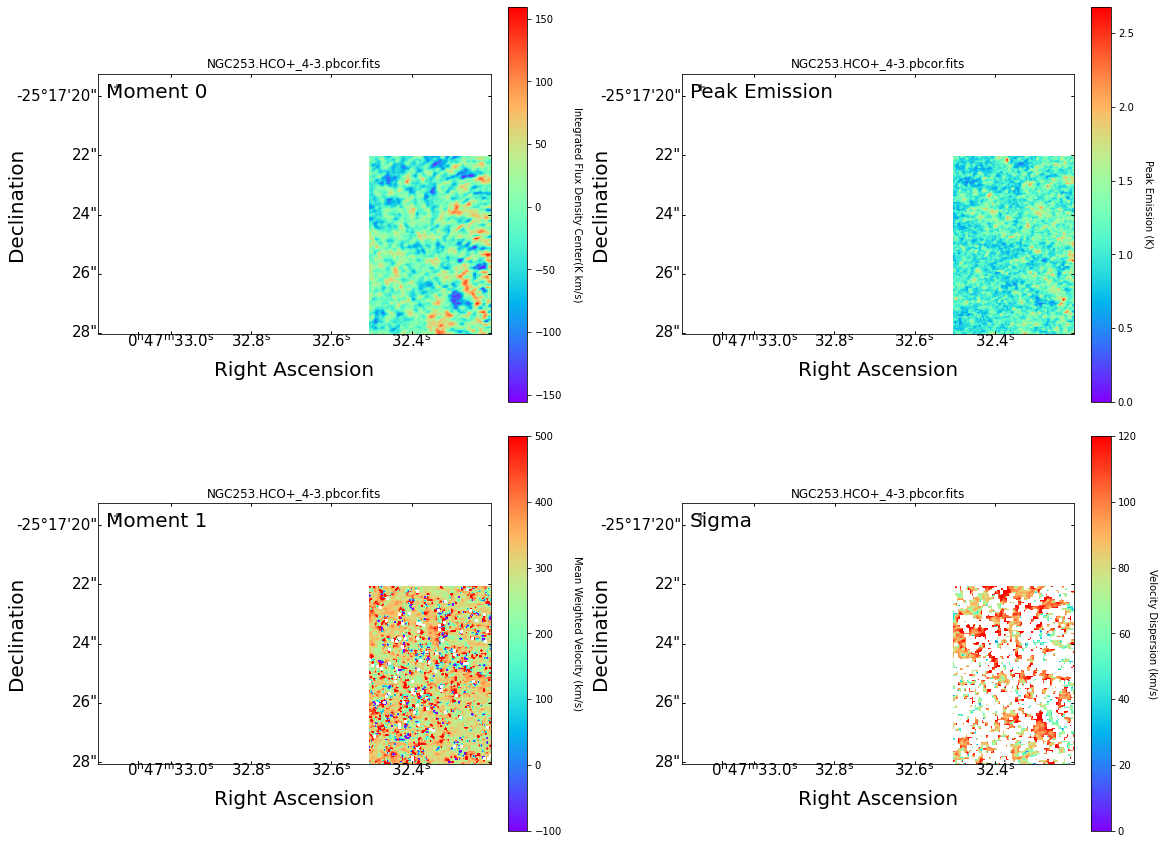

In [38]:
#HCO+ 4-3

path = 'NGC253.HCO+_4-3.pbcor.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True


#Remove Non-zoomed images !
#Remove vmin vmax !
#Make vmin vmax for moment 1, simga !
#Make spectral slab ~100-500 km/s !
#Try to show where the center is (find from a paper) !
#Fix padding ?
#Same raneg for each molecule !
#Mask ratios under a certain value (rainbow?) !
#Consistent vmin vmax for all channels (log scaling?) !
#More channels in the maps !
#Make HCN/H13CN !
#Fix Labels !
#REdefine velocity axis using spectral cube, based on rest frequency !


###### Make zoomed in images
# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
#Infrared Center: 00 47 33.134 -25 17 19.68 . Ref: http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NGC+++253


#cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
#cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')

cen_p1 = SkyCoord('00h47m32.5s', '-25d17m28s', frame='icrs')#These are away from the clusters
cen_p2 = SkyCoord('00h47m32.2s', '-25d17m22s', frame='icrs')
scP = SpectralCube.read(path)
scp2 = scP.with_spectral_unit(u.km/u.s,velocity_convention="radio")

scp2.allow_huge_operations=True   

sc = scp2.to(u.K)
scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube


subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 


#Find Noise 
Np1 = SkyCoord('00h47m32.5s', '-25d17m28s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m32.2s', '-25d17m22s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[:,NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.K

print(m1)

badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*1)                 # Get ready to mask the data based on moment map
moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(K km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(2,2,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow',vmin=0,vmax=m1*6)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (K)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


pylab.tight_layout(w_pad=10,h_pad=5)



#########Moment 1 and Sigma


ax7 = pylab.subplot(2,2,3,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=500)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(2,2,4, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow',vmin=0,vmax=120)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.tight_layout(w_pad=10,h_pad=-10)

ax3.set_title("NGC253.HCO+_4-3.pbcor.fits")
ax4.set_title("NGC253.HCO+_4-3.pbcor.fits")
ax7.set_title("NGC253.HCO+_4-3.pbcor.fits")
ax8.set_title("NGC253.HCO+_4-3.pbcor.fits")

fig1.savefig(bbox_inches='tight',fname="NGC253_HCO+_4-3_Integrated_Full_Note.jpeg")



In [ ]:
#HCN 4-3


path = 'NGC253.HCN_4-3.pbcor.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')


cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')

scP = SpectralCube.read(path)
sc = scP.with_spectral_unit(u.km/u.s,velocity_convention="radio")
scW = sc.wcs[:][:][0]


raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 


#Find Noise 
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[0:int(len(sc)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]].moment(order=0,how='slice') # Make a subcube away from the signals
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.K/u.km*u.s

print(m1)



badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*3)                 # Get ready to mask the data based on moment map

moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(K km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(2,2,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow',vmin=0,vmax=50)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (K)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


pylab.tight_layout(w_pad=10,h_pad=5)



#########Moment 1 and Sigma


ax7 = pylab.subplot(2,2,3,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=500)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(2,2,4, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow',vmin=0,vmax=120)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.tight_layout(w_pad=10,h_pad=-10)


ax3.set_title("NGC253.HCN_4-3.pbcor.fits")
ax4.set_title("NGC253.HCN_4-3.pbcor.fits")
ax7.set_title("NGC253.HCN_4-3.pbcor.fits")
ax8.set_title("NGC253.HCN_4-3.pbcor.fits")

fig1.savefig(bbox_inches='tight',fname="NGC253.HCN_4-3_Integrated_Full_Note.jpeg")




12.976071021114315


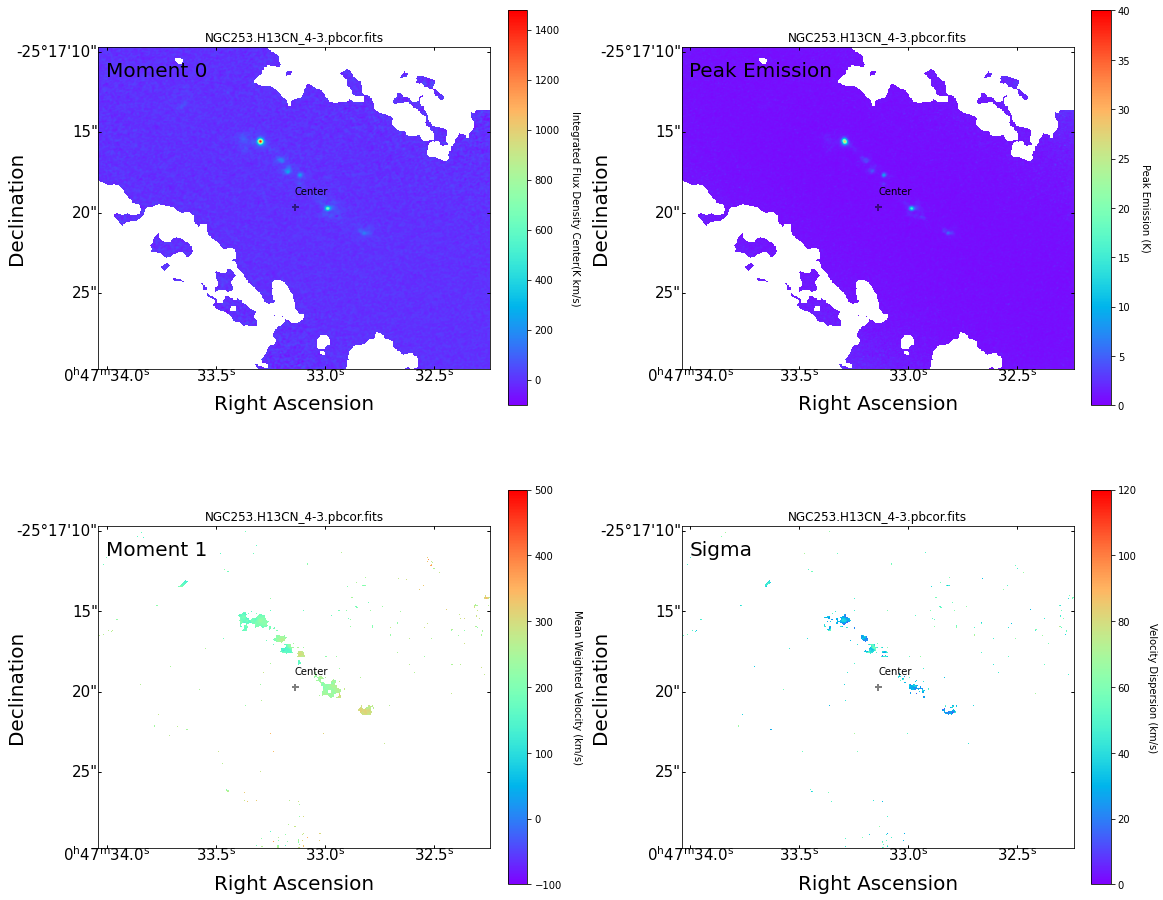

In [31]:
#H13CN 4-3




path = 'NGC253.H13CN_4-3.pbcor.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')


cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')

scP = SpectralCube.read(path)
sc = scP.with_spectral_unit(u.km/u.s,velocity_convention="radio")
scW = sc.wcs[:][:][0]


raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

#Find Noise 
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[0:int(len(sc)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]].moment(order=0,how='slice') # Make a subcube away from the signals
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.K/u.km*u.s

print(m1)



badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*2)                 # Get ready to mask the data based on moment map

moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(K km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(2,2,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow',vmin=0,vmax=40)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (K)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


pylab.tight_layout(w_pad=10,h_pad=5)



#########Moment 1 and Sigma


ax7 = pylab.subplot(2,2,3,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=500)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(2,2,4, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow',vmin=0,vmax=120)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.tight_layout(w_pad=10,h_pad=-10)


ax3.set_title("NGC253.H13CN_4-3.pbcor.fits")
ax4.set_title("NGC253.H13CN_4-3.pbcor.fits")
ax7.set_title("NGC253.H13CN_4-3.pbcor.fits")
ax8.set_title("NGC253.H13CN_4-3.pbcor.fits")

fig1.savefig(bbox_inches='tight',fname="NGC253.H13CN_4-3_Integrated_Full_Note.jpeg")

In [ ]:
#HCN_J1-0

path = 'HCN_J1-0.cube.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')


cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')

scP = SpectralCube.read(path)
sc = scP.with_spectral_unit(u.km/u.s,velocity_convention="radio")
scW = sc.wcs[:][:][0]


raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

#Find Noise 
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[0:int(len(sc)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]].moment(order=0,how='slice') # Make a subcube away from the signals
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.Jy/u.km*u.s*u.beam





badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*1)                 # Get ready to mask the data based on moment map

moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy km / (beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(2,2,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


pylab.tight_layout(w_pad=10,h_pad=5)



#########Moment 1 and Sigma


ax7 = pylab.subplot(2,2,3,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=500)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(2,2,4, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.tight_layout(w_pad=10,h_pad=-10)
ax3.set_title("HCN_J1-0.cube.fits")
ax4.set_title("HCN_J1-0.cube.fits")
ax7.set_title("HCN_J1-0.cube.fits")
ax8.set_title("HCN_J1-0.cube.fits")
fig1.savefig(bbox_inches='tight',fname="NGC253.HCN_J1-0_Integrated_Full_Note.jpeg")

In [15]:
#HCO+_J1-0

path = 'HCOp_J1-0.cube.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')


cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')

scP = SpectralCube.read(path)
sc = scP.with_spectral_unit(u.km/u.s,velocity_convention="radio")
scW = sc.wcs[:][:][0]


raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 
#Find Noise 
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[0:int(len(sc)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]].moment(order=0,how='slice') # Make a subcube away from the signals
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.Jy/u.km*u.s*u.beam

print(sc[0][0][0])
print(m1)

badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*3)                 # Get ready to mask the data based on moment map


moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy km / (beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(2,2,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (Jy/beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


pylab.tight_layout(w_pad=10,h_pad=5)



#########Moment 1 and Sigma


ax7 = pylab.subplot(2,2,3,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=500)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(2,2,4, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.tight_layout(w_pad=10,h_pad=-10)

ax3.set_title("HCOp_J1-0.cube.fits")
ax4.set_title("HCOp_J1-0.cube.fits")
ax7.set_title("HCOp_J1-0.cube.fits")
ax8.set_title("HCOp_J1-0.cube.fits")
fig1.savefig(bbox_inches='tight',fname="NGC253.HCO+_J1-0_Integrated_Full_Note.jpeg")


NameError: name 'SpectralCube' is not defined

0.003746827053257357
0.010120965755959332 Jy km / (beam s)


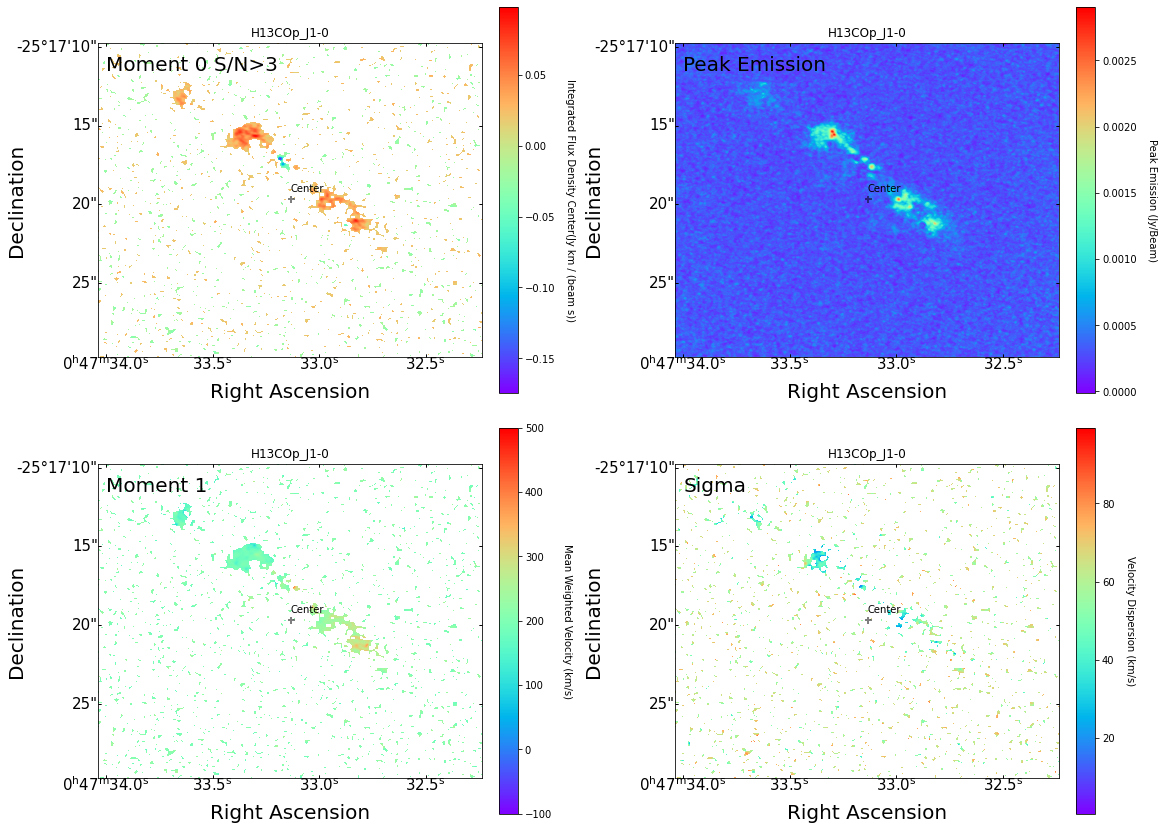

In [4]:
#H13CO+_J1-0, 86.75428840 GHz, ref: https://splatalogue.online//sp_basic.php?el1=el1&el2=el2&ls1=ls1&ls5=ls5&displayRecomb=displayRecomb&displayLovas=displayLovas&displaySLAIM=displaySLAIM&displayJPL=displayJPL&displayCDMS=displayCDMS&displayToyaMA=displayToyaMA&displayOSU=displayOSU&displayLisa=displayLisa&displayRFI=displayRFI&data_version=v3.0&no_atmospheric=no_atmospheric&no_potential=no_potential&no_probable=no_probable&include_only_nrao=include_only_nrao&show_orderedfreq_only=show_orderedfreq_only&sid%5B%5D=38&chemical_name=&band%5B%5D=any&redshift=&energy_range_from=&energy_range_to=&energy_range_type=el_cm1&frequency_units=GHz&from=&to=&submit=Search


#_and_SiO_J2-1 86.84696000 GHz

# Use this to find freq range: regpix.meta['restfreq'] = [100 * u.GHz] # rest frequency 


#Here we specify the frequency and range of velocities (up to 320 m/s) and make a cube with only the H13CO+ data

path = 'H13COp_J1-0_SiO_J2-1.cube.fits'

cubeB = SpectralCube.read(path)

cubeB.allow_huge_operations=True


######### Make the same thing but with zoomed in images


# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')


cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')


regpix = regions.RectanglePixelRegion(regions.PixCoord(int(cubeB.shape[1]/2), int(cubeB.shape[1]/2)), width=int(cubeB.shape[2]*3), height=int(cubeB.shape[1]*3))  
regpix.meta['range'] = [100 * u.km/u.s, 318 * u.km/u.s] # spectral range 
regpix.meta['restfreq'] = 86.75428840*u.GHz # rest frequency 
regpix.meta['veltype'] = 'OPTICAL' # velocity convention 
scb = cubeB.subcube_from_regions([regpix])  #Make the subcube with the specified frequency
sc = scb.with_spectral_unit(u.km/u.s,velocity_convention="radio",rest_value=86.75428840*u.GHz)

scW = sc.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

sc.write("H13CO_Plus_1_0.fits",overwrite=True)
subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position



subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

#Find Noise 
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[0:int(len(sc)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]].moment(order=0,how='slice') # Make a subcube away from the signals
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.Jy*u.beam/u.km*u.s

print(m1)
print(moment_0_sub[0][0])

badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*3)                 # Get ready to mask the data based on moment map
moment_0_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy km / (beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0 S/N>3',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(2,2,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (Jy/Beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


pylab.tight_layout(w_pad=10,h_pad=5)



#########Moment 1 and Sigma


ax7 = pylab.subplot(2,2,3,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=500)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(2,2,4, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.tight_layout(w_pad=10,h_pad=-10)
ax3.set_title("H13COp_J1-0")
ax4.set_title("H13COp_J1-0")
ax7.set_title("H13COp_J1-0")
ax8.set_title("H13COp_J1-0")

fig1.savefig(bbox_inches='tight',fname="NGC253_H13CO+_J1-0_Integrated_Full_Note.jpeg")


In [ ]:


#SiO_J2-1 86.84696000 GHz, ref: https://splatalogue.online//sp_basic.php?el1=el1&el2=el2&ls1=ls1&ls5=ls5&displayRecomb=displayRecomb&displayLovas=displayLovas&displaySLAIM=displaySLAIM&displayJPL=displayJPL&displayCDMS=displayCDMS&displayToyaMA=displayToyaMA&displayOSU=displayOSU&displayLisa=displayLisa&displayRFI=displayRFI&data_version=v3.0&no_atmospheric=no_atmospheric&no_potential=no_potential&no_probable=no_probable&include_only_nrao=include_only_nrao&show_orderedfreq_only=show_orderedfreq_only&sid%5B%5D=38&chemical_name=&band%5B%5D=any&redshift=&energy_range_from=&energy_range_to=&energy_range_type=el_cm1&frequency_units=GHz&from=&to=&submit=Search

#(and) H13CO+_J1-0, 86.75428840 GHz

# Use this to find freq range: regpix.meta['restfreq'] = [100 * u.GHz] # rest frequency 


#Here we specify the frequency and range of velocities (up to 320 m/s) and make a cube with only the H13CO+ data

path = 'H13COp_J1-0_SiO_J2-1.cube.fits'
cubeB = SpectralCube.read(path)
 
#print(cubeB.shape[1])

regpix = regions.RectanglePixelRegion(regions.PixCoord(int(cubeB.shape[1]/2), int(cubeB.shape[1]/2)), width=int(cubeB.shape[1]-1), height=int(cubeB.shape[2]-1))  
regpix.meta['range'] = [100 * u.km/u.s, 300 * u.km/u.s] # spectral range 
regpix.meta['restfreq'] = 86.84696000*u.GHz # rest frequency 
regpix.meta['veltype'] = 'OPTICAL' # velocity convention 
scb = cubeB.subcube_from_regions([regpix])  #Make the subcube with the specified frequency
sc = scb.with_spectral_unit(u.km/u.s,velocity_convention="radio",rest_value=86.84696000*u.GHz)

sc.write("SiO_2_1.fits",overwrite=True)
cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')

scW = sc.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position




subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

#Find Noise 
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[0:int(len(sc)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]].moment(order=0,how='slice') # Make a subcube away from the signals
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.Jy*u.beam/u.km*u.s

print(m1)
print(moment_0_sub[0][0])

badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*4)                 # Get ready to mask the data based on moment map
moment_0_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy km / (beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0 S/N>4',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(2,2,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (Jy/Beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


pylab.tight_layout(w_pad=10,h_pad=5)



#########Moment 1 and Sigma


ax7 = pylab.subplot(2,2,3,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=500)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(2,2,4, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.tight_layout(w_pad=10,h_pad=-10)
ax3.set_title("SiO_J2-1")
ax4.set_title("SiO_J2-1")
ax7.set_title("SiO_J2-1")
ax8.set_title("SiO_J2-1")

fig1.savefig(bbox_inches='tight',fname="NGC253_SiO_J2-1_Integrated_Full_Note.jpeg")


In [ ]:
#H13CN_J1-0


path = 'H13CN_J1-0.cube.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')


cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')

scP = SpectralCube.read(path)
sc = scP.with_spectral_unit(u.km/u.s,velocity_convention="radio")
scW = sc.wcs[:][:][0]


raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

#Find Noise 
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[0:int(len(sc)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]].moment(order=0,how='slice') # Make a subcube away from the signals
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.Jy*u.beam/u.km*u.s


badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*3)                 # Get ready to mask the data based on moment map
moment_0_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy km / (beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0 S/N>3',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(2,2,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (Jy/beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


pylab.tight_layout(w_pad=10,h_pad=5)



#########Moment 1 and Sigma


ax7 = pylab.subplot(2,2,3,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=500)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(2,2,4, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow',vmin=0,vmax=250)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.tight_layout(w_pad=10,h_pad=-10)

ax3.set_title("H13CN_J1-0.cube.fits")
ax4.set_title("H13CN_J1-0.cube.fits")
ax7.set_title("H13CN_J1-0.cube.fits")
ax8.set_title("H13CN_J1-0.cube.fits")


fig1.savefig(bbox_inches='tight',fname="NGC253.H13CN_J1-0_Integrated_Full_Note.jpeg")

(81, 29, 79)
1.606412701257537
69.1436340211074 km / s
-0.3028299437119787 K


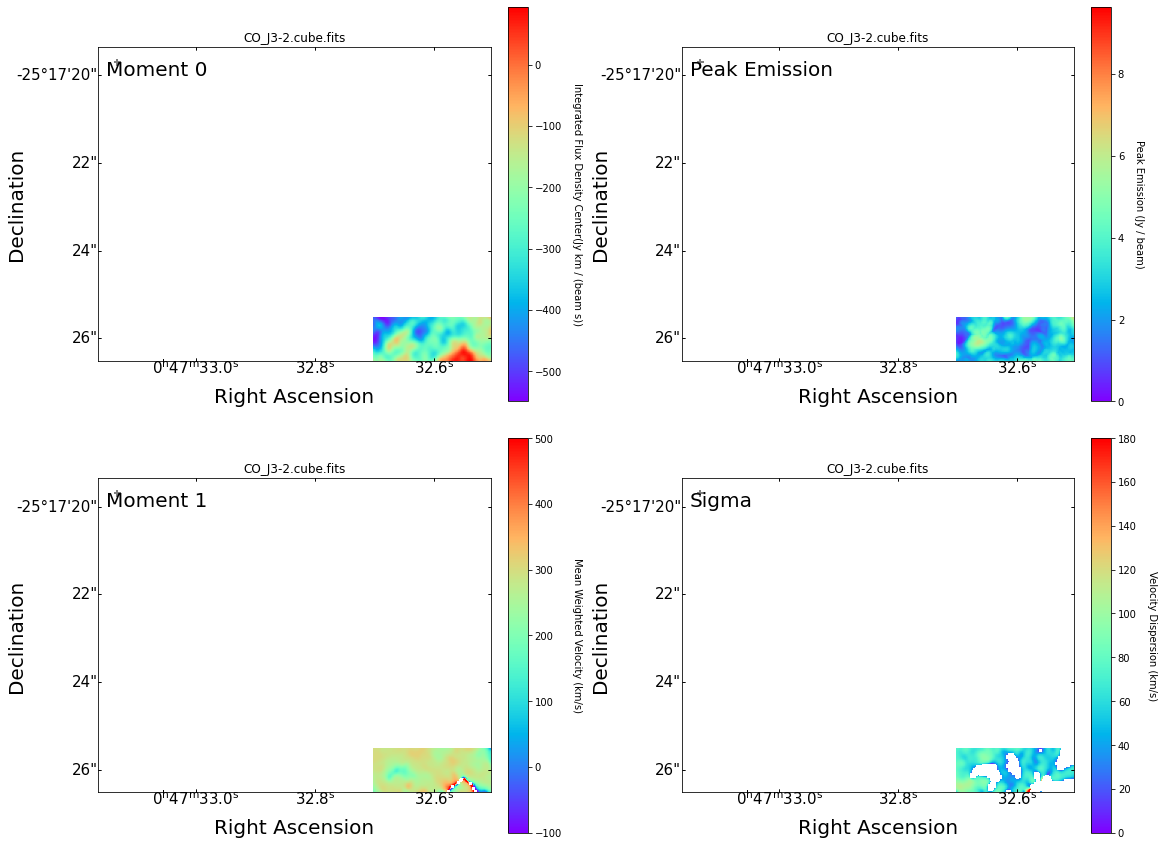

In [87]:
#CO_J3-2


path = 'ngc253_co32_hires_common.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')


cen_p1 = SkyCoord('00h47m32.7s', '-25d17m26.5s', frame='icrs')#These are away from the clusters
cen_p2 = SkyCoord('00h47m32.5s', '-25d17m25.5s', frame='icrs')
scP = SpectralCube.read(path)
scp2 = scP.with_spectral_unit(u.km/u.s,velocity_convention="radio")

scp2.allow_huge_operations=True   

sc = scp2.to(u.K)
scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube


subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 


#Find Noise 
Np1 = SkyCoord('00h47m32.7s', '-25d17m26.5s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m32.5s', '-25d17m25.5s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[:,NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
print(np.shape(Nsc1))
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.K

print(m1)
print(sigma_map_sub[0][0])

badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*4)                 # Get ready to mask the data based on moment map
moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy km / (beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(2,2,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow',vmin=0,vmax=m1*6)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


pylab.tight_layout(w_pad=10,h_pad=5)



#########Moment 1 and Sigma


ax7 = pylab.subplot(2,2,3,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=500)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(2,2,4, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow',vmin=0,vmax=180)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.tight_layout(w_pad=10,h_pad=-10)
print(subcube[0][0][0])
ax3.set_title("CO_J3-2.cube.fits")
ax4.set_title("CO_J3-2.cube.fits")
ax7.set_title("CO_J3-2.cube.fits")
ax8.set_title("CO_J3-2.cube.fits")
fig1.savefig(bbox_inches='tight',fname="NGC253.CO_J3-2_Integrated_Full_Note.jpeg")

In [ ]:
#CCH_N1-0.cube.fits


path = 'CCH_N1-0.cube.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')


cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')

scP = SpectralCube.read(path)
sc = scP.with_spectral_unit(u.km/u.s,velocity_convention="radio")
scW = sc.wcs[:][:][0]


raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

#Find Noise 
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[0:int(len(sc)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]].moment(order=0,how='slice') # Make a subcube away from the signals
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.Jy*u.beam/u.km*u.s

print(m1)
print(moment_0_sub[0][0])

badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*3)                 # Get ready to mask the data based on moment map
moment_0_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy km / (beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0 S/N>3',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(2,2,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
print(subcube[0][0][0])

pylab.tight_layout(w_pad=10,h_pad=5)



#########Moment 1 and Sigma


ax7 = pylab.subplot(2,2,3,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=500)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(2,2,4, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.tight_layout(w_pad=10,h_pad=-10)

ax3.set_title("CCH_N1-0.cube.fits")
ax4.set_title("CCH_N1-0.cube.fits")
ax7.set_title("CCH_N1-0.cube.fits")
ax8.set_title("CCH_N1-0.cube.fits")



fig1.savefig(bbox_inches='tight',fname="CCH_N1-0.cube_Integrated_Full_Note.jpeg")

In [ ]:
#HC3N_J11-10




#HC3N_J11-10, 100.07639200 GHz, ref: CDMS


#_and_SO_J45-44 100.02964000? GHz, SO 3Σ v = 0	Sulfur Monoxide	100.02964000, 100.02964000	4( 5)- 4( 4)	-4.22740	0.38m	23.4748	33.7748	JPL
#No overlap until -140km/s

# Use this to find freq range: regpix.meta['restfreq'] = [100 * u.GHz] # rest frequency 


#Here we specify the frequency and range of velocities (up to 320 m/s) and make a cube with only the H13CO+ data

path = 'HC3N_J11-10_SO_J45-44.cube.fits'

cubeB = SpectralCube.read(path)

cubeB.allow_huge_operations=True


######### Make the same thing but with zoomed in images


# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')


cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')


regpix = regions.RectanglePixelRegion(regions.PixCoord(int(cubeB.shape[1]/2), int(cubeB.shape[1]/2)), width=int(cubeB.shape[2]-1), height=int(cubeB.shape[1]-1))  
regpix.meta['range'] = [100 * u.km/u.s, 300 * u.km/u.s] # spectral range 
regpix.meta['restfreq'] = 100.07639200 *u.GHz # rest frequency 
regpix.meta['veltype'] = 'OPTICAL' # velocity convention 
scb = cubeB.subcube_from_regions([regpix])  #Make the subcube with the specified frequency
sc = scb.with_spectral_unit(u.km/u.s,velocity_convention="radio",rest_value=100.07639200*u.GHz)

scW = sc.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

sc.write("HC3N_11_10.fits",overwrite=True)
subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position


cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')


cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')

scP = SpectralCube.read(path)
sc = scP.with_spectral_unit(u.km/u.s,velocity_convention="radio")
scW = sc.wcs[:][:][0]


raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

#Find Noise 
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[0:int(len(sc)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]].moment(order=0,how='slice') # Make a subcube away from the signals
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.Jy*u.beam/u.km*u.s

print(m1)
print(moment_0_sub[0][0])

badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*3)                 # Get ready to mask the data based on moment map
moment_0_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy km / (beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0 S/N >3',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(2,2,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
print(subcube[0][0][0])

pylab.tight_layout(w_pad=10,h_pad=5)



#########Moment 1 and Sigma


ax7 = pylab.subplot(2,2,3,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=500)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(2,2,4, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.tight_layout(w_pad=10,h_pad=-10)

ax3.set_title("HC3N_J11-10_SO_J45-44.cube.fits")
ax4.set_title("HC3N_J11-10_SO_J45-44.cube.fits")
ax7.set_title("HC3N_J11-10_SO_J45-44.cube.fits")
ax8.set_title("HC3N_J11-10_SO_J45-44.cube.fits")



fig1.savefig(bbox_inches='tight',fname="HC3N_J11-10_SO_J45-44_Integrated_Full_Note.jpeg")

# Part 3: Image Ratios

In [ ]:

what = "H13CN/HCO+"
top = "H13CN"
bot="HCO+"
#####Zoom in

sc1B = SpectralCube.read('NGC253.HCO+_4-3.pbcor.fits')   
sc2B = SpectralCube.read('NGC253.H13CN_4-3.pbcor.fits')


cen_p1 = SkyCoord('00h47m33.8s', '-25d17m26s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.4s', '-25d17m11s', frame='icrs')
scW = sc1B.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
sc1 = sc1B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position

#Find Noise 1
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc1B[0:int(len(sc1B)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
#Find StandardDev of this noise cube
N1kms = Nsc1.with_spectral_unit(u.km/u.s,velocity_convention="radio")
N1kms.allow_huge_operations=True
N1Kkma = N1kms.to(u.K)
N1Mom  = N1Kkma.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
m1=N1Mom.std()

#    
scW = sc2B.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
sc2 = sc2B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position

#Find Noise 2
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc2 = sc2B[0:int(len(sc2B)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
#Find StandardDev of this noise cube
N2kms = Nsc2.with_spectral_unit(u.km/u.s,velocity_convention="radio")
N2kms.allow_huge_operations=True
N2Kkma = N2kms.to(u.K)
N2Mom  = N2Kkma.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
m2=N2Mom.std()

print(bot,"StandardDev: ",str(m1),top,"StandardDev: ",m2)
#####

sc1_kms = sc1.with_spectral_unit(u.km/u.s,velocity_convention="radio")
sc1_kms.allow_huge_operations=True
sc1_K_kms = sc1_kms.to(u.K)
sc2_kms = sc2.with_spectral_unit(u.km/u.s,velocity_convention="radio")
sc2_kms.allow_huge_operations=True
sc2_K_kms = sc2_kms.to(u.K)
sc1_moment0  = sc1_K_kms.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
sc2_moment0  = sc2_K_kms.moment(order=0,how='slice')    # Calculate the second Moment 0 map 



badpixS = pylab.where(abs(sc1_moment0)<m1*3)                 # Get ready to mask the data based on moment map
sc1_moment0.hdu.data[badpixS] = np.nan                          # Mask the moment 0 map under 3 sigma
badpixS = pylab.where(abs(sc2_moment0)<m2*3)                 # Get ready to mask the data based on moment map
sc2_moment0.hdu.data[badpixS] = np.nan                          # Mask the moment 0 map under 3 sigma
sc1_moment0_reproject, footprint = reproject_interp(sc1_moment0.hdu,sc2_moment0.header)
                                                        # Now that images are same size, compute ratio of moment maps
ratio = sc2_moment0.hdu.data/sc1_moment0_reproject

fig1 = pylab.figure(1,figsize=(22,7))
scWCS=sc2_moment0.wcs
ax1 = pylab.subplot(1,3,1,projection=scWCS)

im1 = pylab.imshow(ratio,cmap='copper')
RA = ax1.coords[0]                                                                  
Dec = ax1.coords[1] 
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True)
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1,fraction=0.035,pad=0.01)
cb.ax.tick_params(which = 'major', labelsize = 12)   
pylab.annotate(s=what,fontsize=15,xy=(.1,.05),xycoords="axes fraction",c="Blue");  
pylab.tight_layout(w_pad=10,h_pad=0)
######Moment 0 
scWCS=sc2_moment0.wcs
ax2 = pylab.subplot(1,3,2, projection=scWCS)
RA = ax2.coords[0]                                                                  # 
Dec = ax2.coords[1] 
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True)
im2=pylab.imshow(sc2_moment0.data,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2,fraction=0.035,pad=0.01)                                      
cb.set_label(label='Integrated Flux Density Targeted(K km / s)',fontsize=12,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 12)  
pylab.annotate(s='Moment 0 Comparison',fontsize=15,xy=(.1,.05),xycoords="axes fraction")  
pylab.tight_layout(w_pad=10,h_pad=0)
ax2.set_title(top)

scWCS=sc1_moment0.wcs
ax3 = pylab.subplot(1,3,3, projection=scWCS)
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1] 
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True) 
im3=pylab.imshow(sc1_moment0.data,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.035,pad=0.01)                                      
cb.set_label(label='Integrated Flux Density Targeted(K km / s)',fontsize=12,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 12)  
pylab.annotate(s='Moment 0 Comparison',fontsize=15,xy=(.1,.05),xycoords="axes fraction")  
pylab.tight_layout(w_pad=10,h_pad=0)
ax3.set_title(bot)


fig1.savefig(bbox_inches='tight',fname="H13CN_Over_HCO_Plus.jpeg")

In [ ]:

what = "HCN/HCO+"
top = "HCN"
bot="HCO+"
#####Zoom in

sc1B = SpectralCube.read('NGC253.HCO+_4-3.pbcor.fits')
sc2B = SpectralCube.read('NGC253.HCN_4-3.pbcor.fits') 


cen_p1 = SkyCoord('00h47m33.8s', '-25d17m26s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.4s', '-25d17m11s', frame='icrs')
scW = sc1B.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
sc1 = sc1B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position

#Find Noise 1
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc1B[0:int(len(sc1B)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
#Find StandardDev of this noise cube
N1kms = Nsc1.with_spectral_unit(u.km/u.s,velocity_convention="radio")
N1kms.allow_huge_operations=True
N1Kkma = N1kms.to(u.K)
N1Mom  = N1Kkma.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
m1=N1Mom.std()

#    
scW = sc2B.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
sc2 = sc2B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position

#Find Noise 2
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc2 = sc2B[0:int(len(sc2B)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
#Find StandardDev of this noise cube
N2kms = Nsc2.with_spectral_unit(u.km/u.s,velocity_convention="radio")
N2kms.allow_huge_operations=True
N2Kkma = N2kms.to(u.K)
N2Mom  = N2Kkma.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
m2=N2Mom.std()

print(bot,"StandardDev: ",str(m1),top,"StandardDev: ",m2)
#####

sc1_kms = sc1.with_spectral_unit(u.km/u.s,velocity_convention="radio")
sc1_kms.allow_huge_operations=True
sc1_K_kms = sc1_kms.to(u.K)
sc2_kms = sc2.with_spectral_unit(u.km/u.s,velocity_convention="radio")
sc2_kms.allow_huge_operations=True
sc2_K_kms = sc2_kms.to(u.K)
sc1_moment0  = sc1_K_kms.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
sc2_moment0  = sc2_K_kms.moment(order=0,how='slice')    # Calculate the second Moment 0 map 



badpixS = pylab.where(abs(sc1_moment0)<m1*3)                 # Get ready to mask the data based on moment map
sc1_moment0.hdu.data[badpixS] = np.nan                          # Mask the moment 0 map under 3 sigma
badpixS = pylab.where(abs(sc2_moment0)<m2*3)                 # Get ready to mask the data based on moment map
sc2_moment0.hdu.data[badpixS] = np.nan                          # Mask the moment 0 map under 3 sigma
sc1_moment0_reproject, footprint = reproject_interp(sc1_moment0.hdu,sc2_moment0.header)
                                                        # Now that images are same size, compute ratio of moment maps
ratio = sc2_moment0.hdu.data/sc1_moment0_reproject

fig1 = pylab.figure(1,figsize=(22,7))
scWCS=sc2_moment0.wcs
ax1 = pylab.subplot(1,3,1,projection=scWCS)

im1 = pylab.imshow(ratio,cmap='copper')
RA = ax1.coords[0]                                                                  
Dec = ax1.coords[1] 
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True)
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1,fraction=0.035,pad=0.01)
cb.ax.tick_params(which = 'major', labelsize = 12)   
pylab.annotate(s=what,fontsize=15,xy=(.1,.05),xycoords="axes fraction",c="Blue");  
pylab.tight_layout(w_pad=10,h_pad=0)
######Moment 0 
scWCS=sc2_moment0.wcs
ax2 = pylab.subplot(1,3,2, projection=scWCS)
RA = ax2.coords[0]                                                                  # 
Dec = ax2.coords[1] 
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True)
im2=pylab.imshow(sc2_moment0.data,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2,fraction=0.035,pad=0.01)                                      
cb.set_label(label='Integrated Flux Density Targeted(K km / s)',fontsize=12,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 12)  
pylab.annotate(s='Moment 0 Comparison',fontsize=15,xy=(.1,.05),xycoords="axes fraction")  
pylab.tight_layout(w_pad=10,h_pad=0)
ax2.set_title(top)

scWCS=sc1_moment0.wcs
ax3 = pylab.subplot(1,3,3, projection=scWCS)
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1] 
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True) 
im3=pylab.imshow(sc1_moment0.data,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.035,pad=0.01)                                      
cb.set_label(label='Integrated Flux Density Targeted(K km / s)',fontsize=12,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 12)  
pylab.annotate(s='Moment 0 Comparison',fontsize=15,xy=(.1,.05),xycoords="axes fraction")  
pylab.tight_layout(w_pad=10,h_pad=0)
ax3.set_title(bot)


fig1.savefig(bbox_inches='tight',fname="HCN_Over_HCO_Plus.jpeg")

In [ ]:


what = "HCO+_J1-0/HCN_J1"
top = "HCO+_J1-0"
bot="HCN_J1"
#####Zoom in

sc1B = SpectralCube.read('HCN_J1-0.cube.fits')    
sc2B = SpectralCube.read('HCOp_J1-0.cube.fits') 


cen_p1 = SkyCoord('00h47m33.8s', '-25d17m26s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.4s', '-25d17m11s', frame='icrs')
scW = sc1B.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
sc1 = sc1B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position

#Find Noise 1
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc1B[0:int(len(sc1B)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
#Find StandardDev of this noise cube
N1kms = Nsc1.with_spectral_unit(u.km/u.s,velocity_convention="radio")
N1kms.allow_huge_operations=True
N1Kkma = N1kms.to(u.K)
N1Mom  = N1Kkma.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
m1=N1Mom.std()

#    
scW = sc2B.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
sc2 = sc2B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position

#Find Noise 2
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc2 = sc2B[0:int(len(sc2B)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
#Find StandardDev of this noise cube
N2kms = Nsc2.with_spectral_unit(u.km/u.s,velocity_convention="radio")
N2kms.allow_huge_operations=True
N2Kkma = N2kms.to(u.K)
N2Mom  = N2Kkma.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
m2=N2Mom.std()

print(bot,"StandardDev: ",str(m1),top,"StandardDev: ",m2)
#####

sc1_kms = sc1.with_spectral_unit(u.km/u.s,velocity_convention="radio")
sc1_kms.allow_huge_operations=True
sc1_K_kms = sc1_kms.to(u.K)
sc2_kms = sc2.with_spectral_unit(u.km/u.s,velocity_convention="radio")
sc2_kms.allow_huge_operations=True
sc2_K_kms = sc2_kms.to(u.K)
sc1_moment0  = sc1_K_kms.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
sc2_moment0  = sc2_K_kms.moment(order=0,how='slice')    # Calculate the second Moment 0 map 



badpixS = pylab.where(abs(sc1_moment0)<m1*3)                 # Get ready to mask the data based on moment map
sc1_moment0.hdu.data[badpixS] = np.nan                          # Mask the moment 0 map under 3 sigma
badpixS = pylab.where(abs(sc2_moment0)<m2*3)                 # Get ready to mask the data based on moment map
sc2_moment0.hdu.data[badpixS] = np.nan                          # Mask the moment 0 map under 3 sigma
sc1_moment0_reproject, footprint = reproject_interp(sc1_moment0.hdu,sc2_moment0.header)
                                                        # Now that images are same size, compute ratio of moment maps
ratio = sc2_moment0.hdu.data/sc1_moment0_reproject

fig1 = pylab.figure(1,figsize=(22,7))
scWCS=sc2_moment0.wcs
ax1 = pylab.subplot(1,3,1,projection=scWCS)

im1 = pylab.imshow(ratio,cmap='copper')
RA = ax1.coords[0]                                                                  
Dec = ax1.coords[1] 
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True)
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1,fraction=0.035,pad=0.01)
cb.ax.tick_params(which = 'major', labelsize = 12)   
pylab.annotate(s=what,fontsize=15,xy=(.1,.05),xycoords="axes fraction",c="Blue");  
pylab.tight_layout(w_pad=10,h_pad=0)
######Moment 0 
scWCS=sc2_moment0.wcs
ax2 = pylab.subplot(1,3,2, projection=scWCS)
RA = ax2.coords[0]                                                                  # 
Dec = ax2.coords[1] 
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True)
im2=pylab.imshow(sc2_moment0.data,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2,fraction=0.035,pad=0.01)                                      
cb.set_label(label='Integrated Flux Density Targeted(K km / s)',fontsize=12,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 12)  
pylab.annotate(s='Moment 0 Comparison',fontsize=15,xy=(.1,.05),xycoords="axes fraction")  
pylab.tight_layout(w_pad=10,h_pad=0)
ax2.set_title(top)

scWCS=sc1_moment0.wcs
ax3 = pylab.subplot(1,3,3, projection=scWCS)
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1] 
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True) 
im3=pylab.imshow(sc1_moment0.data,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.035,pad=0.01)                                      
cb.set_label(label='Integrated Flux Density Targeted(K km / s)',fontsize=12,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 12)  
pylab.annotate(s='Moment 0 Comparison',fontsize=15,xy=(.1,.05),xycoords="axes fraction")  
pylab.tight_layout(w_pad=10,h_pad=0)
ax3.set_title(bot)


fig1.savefig(bbox_inches='tight',fname="HCO+J1_Over_HCNJ1.jpeg")

In [ ]:


what = "HCN_J1/H13CN_J1-0"
top = "HCN_J1"
bot="H13CN_J1-0"
#####Zoom in

sc2B = SpectralCube.read('HCN_J1-0.cube.fits')    #Top
sc1B = SpectralCube.read('H13CN_J1-0.cube.fits')  #Bot


cen_p1 = SkyCoord('00h47m33.8s', '-25d17m26s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.4s', '-25d17m11s', frame='icrs')
scW = sc1B.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
sc1 = sc1B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position

#Find Noise 1
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc1B[0:int(len(sc1B)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
#Find StandardDev of this noise cube
N1kms = Nsc1.with_spectral_unit(u.km/u.s,velocity_convention="radio")
N1kms.allow_huge_operations=True
N1Kkma = N1kms.to(u.K)
N1Mom  = N1Kkma.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
m1=N1Mom.std()

#    
scW = sc2B.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
sc2 = sc2B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position

#Find Noise 2
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc2 = sc2B[0:int(len(sc2B)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
#Find StandardDev of this noise cube
N2kms = Nsc2.with_spectral_unit(u.km/u.s,velocity_convention="radio")
N2kms.allow_huge_operations=True
N2Kkma = N2kms.to(u.K)
N2Mom  = N2Kkma.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
m2=N2Mom.std()

print(bot,"StandardDev: ",str(m1),top,"StandardDev: ",m2)
#####

sc1_kms = sc1.with_spectral_unit(u.km/u.s,velocity_convention="radio")
sc1_kms.allow_huge_operations=True
sc1_K_kms = sc1_kms.to(u.K)
sc2_kms = sc2.with_spectral_unit(u.km/u.s,velocity_convention="radio")
sc2_kms.allow_huge_operations=True
sc2_K_kms = sc2_kms.to(u.K)
sc1_moment0  = sc1_K_kms.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
sc2_moment0  = sc2_K_kms.moment(order=0,how='slice')    # Calculate the second Moment 0 map 



badpixS = pylab.where(abs(sc1_moment0)<m1*3)                 # Get ready to mask the data based on moment map
sc1_moment0.hdu.data[badpixS] = np.nan                          # Mask the moment 0 map under 3 sigma
badpixS = pylab.where(abs(sc2_moment0)<m2*3)                 # Get ready to mask the data based on moment map
sc2_moment0.hdu.data[badpixS] = np.nan                          # Mask the moment 0 map under 3 sigma
sc1_moment0_reproject, footprint = reproject_interp(sc1_moment0.hdu,sc2_moment0.header)
                                                        # Now that images are same size, compute ratio of moment maps
ratio = sc2_moment0.hdu.data/sc1_moment0_reproject

fig1 = pylab.figure(1,figsize=(22,7))
scWCS=sc2_moment0.wcs
ax1 = pylab.subplot(1,3,1,projection=scWCS)

im1 = pylab.imshow(ratio,cmap='copper')
RA = ax1.coords[0]                                                                  
Dec = ax1.coords[1] 
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True)
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1,fraction=0.035,pad=0.01)
cb.ax.tick_params(which = 'major', labelsize = 12)   
pylab.annotate(s=what,fontsize=15,xy=(.1,.05),xycoords="axes fraction",c="Blue");  
pylab.tight_layout(w_pad=10,h_pad=0)
######Moment 0 
scWCS=sc2_moment0.wcs
ax2 = pylab.subplot(1,3,2, projection=scWCS)
RA = ax2.coords[0]                                                                  # 
Dec = ax2.coords[1] 
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True)
im2=pylab.imshow(sc2_moment0.data,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2,fraction=0.035,pad=0.01)                                      
cb.set_label(label='Integrated Flux Density Targeted(K km / s)',fontsize=12,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 12)  
pylab.annotate(s='Moment 0 Comparison',fontsize=15,xy=(.1,.05),xycoords="axes fraction")  
pylab.tight_layout(w_pad=10,h_pad=0)
ax2.set_title(top)

scWCS=sc1_moment0.wcs
ax3 = pylab.subplot(1,3,3, projection=scWCS)
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1] 
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True) 
im3=pylab.imshow(sc1_moment0.data,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.035,pad=0.01)                                      
cb.set_label(label='Integrated Flux Density Targeted(K km / s)',fontsize=12,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 12)  
pylab.annotate(s='Moment 0 Comparison',fontsize=15,xy=(.1,.05),xycoords="axes fraction")  
pylab.tight_layout(w_pad=10,h_pad=0)
ax3.set_title(bot)


fig1.savefig(bbox_inches='tight',fname="HCN_J1_Over_H13CNJ1.jpeg")

In [ ]:


what = "HCN/H13CN"
top = "HCN"
bot="H13CN"
#####Zoom in

sc2B = SpectralCube.read('NGC253.HCN_4-3.pbcor.fits')    #Top
sc1B = SpectralCube.read('NGC253.H13CN_4-3.pbcor.fits')  #Bot



cen_p1 = SkyCoord('00h47m33.8s', '-25d17m26s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.4s', '-25d17m11s', frame='icrs')
scW = sc1B.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
sc1 = sc1B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position

#Find Noise 1
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc1B[0:int(len(sc1B)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
#Find StandardDev of this noise cube
N1kms = Nsc1.with_spectral_unit(u.km/u.s,velocity_convention="radio")
N1kms.allow_huge_operations=True
N1Kkma = N1kms.to(u.K)
N1Mom  = N1Kkma.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
m1=N1Mom.std()

#    
scW = sc2B.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
sc2 = sc2B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position

#Find Noise 2
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc2 = sc2B[0:int(len(sc2B)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
#Find StandardDev of this noise cube
N2kms = Nsc2.with_spectral_unit(u.km/u.s,velocity_convention="radio")
N2kms.allow_huge_operations=True
N2Kkma = N2kms.to(u.K)
N2Mom  = N2Kkma.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
m2=N2Mom.std()

print(bot,"StandardDev: ",str(m1),top,"StandardDev: ",m2)
#####

sc1_kms = sc1.with_spectral_unit(u.km/u.s,velocity_convention="radio")
sc1_kms.allow_huge_operations=True
sc1_K_kms = sc1_kms.to(u.K)
sc2_kms = sc2.with_spectral_unit(u.km/u.s,velocity_convention="radio")
sc2_kms.allow_huge_operations=True
sc2_K_kms = sc2_kms.to(u.K)
sc1_moment0  = sc1_K_kms.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
sc2_moment0  = sc2_K_kms.moment(order=0,how='slice')    # Calculate the second Moment 0 map 



badpixS = pylab.where(abs(sc1_moment0)<m1*3)                 # Get ready to mask the data based on moment map
sc1_moment0.hdu.data[badpixS] = np.nan                          # Mask the moment 0 map under 3 sigma
badpixS = pylab.where(abs(sc2_moment0)<m2*3)                 # Get ready to mask the data based on moment map
sc2_moment0.hdu.data[badpixS] = np.nan                          # Mask the moment 0 map under 3 sigma
sc1_moment0_reproject, footprint = reproject_interp(sc1_moment0.hdu,sc2_moment0.header)
                                                        # Now that images are same size, compute ratio of moment maps
ratio = sc2_moment0.hdu.data/sc1_moment0_reproject

fig1 = pylab.figure(1,figsize=(22,7))
scWCS=sc2_moment0.wcs
ax1 = pylab.subplot(1,3,1,projection=scWCS)

im1 = pylab.imshow(ratio,cmap='copper')
RA = ax1.coords[0]                                                                  
Dec = ax1.coords[1] 
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True)
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1,fraction=0.035,pad=0.01)
cb.ax.tick_params(which = 'major', labelsize = 12)   
pylab.annotate(s=what,fontsize=15,xy=(.1,.05),xycoords="axes fraction",c="Blue");  
pylab.tight_layout(w_pad=10,h_pad=0)
######Moment 0 
scWCS=sc2_moment0.wcs
ax2 = pylab.subplot(1,3,2, projection=scWCS)
RA = ax2.coords[0]                                                                  # 
Dec = ax2.coords[1] 
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True)
im2=pylab.imshow(sc2_moment0.data,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2,fraction=0.035,pad=0.01)                                      
cb.set_label(label='Integrated Flux Density Targeted(K km / s)',fontsize=12,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 12)  
pylab.annotate(s='Moment 0 Comparison',fontsize=15,xy=(.1,.05),xycoords="axes fraction")  
pylab.tight_layout(w_pad=10,h_pad=0)
ax2.set_title(top)

scWCS=sc1_moment0.wcs
ax3 = pylab.subplot(1,3,3, projection=scWCS)
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1] 
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True) 
im3=pylab.imshow(sc1_moment0.data,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.035,pad=0.01)                                      
cb.set_label(label='Integrated Flux Density Targeted(K km / s)',fontsize=12,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 12)  
pylab.annotate(s='Moment 0 Comparison',fontsize=15,xy=(.1,.05),xycoords="axes fraction")  
pylab.tight_layout(w_pad=10,h_pad=0)
ax3.set_title(bot)


fig1.savefig(bbox_inches='tight',fname="HCN_Over_H13CN.jpeg")

In [ ]:


what = "HCN/HC3N"
top = "HCN"
bot="HC3N"
#####Zoom in

sc2B = SpectralCube.read('NGC253.HCN_4-3.pbcor.fits')    #Top
sc1B = SpectralCube.read("HC3N_11_10.fits")  #Bot



cen_p1 = SkyCoord('00h47m33.8s', '-25d17m26s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.4s', '-25d17m11s', frame='icrs')
scW = sc1B.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
sc1 = sc1B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position

#Find Noise 1
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc1B[0:int(len(sc1B)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
#Find StandardDev of this noise cube
N1kms = Nsc1.with_spectral_unit(u.km/u.s,velocity_convention="radio")
N1kms.allow_huge_operations=True
N1Kkma = N1kms.to(u.K)
N1Mom  = N1Kkma.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
m1=N1Mom.std()

#    
scW = sc2B.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
sc2 = sc2B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position

#Find Noise 2
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc2 = sc2B[0:int(len(sc2B)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
#Find StandardDev of this noise cube
N2kms = Nsc2.with_spectral_unit(u.km/u.s,velocity_convention="radio")
N2kms.allow_huge_operations=True
N2Kkma = N2kms.to(u.K)
N2Mom  = N2Kkma.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
m2=N2Mom.std()

print(bot,"StandardDev: ",str(m1),top,"StandardDev: ",m2)
#####

sc1_kms = sc1.with_spectral_unit(u.km/u.s,velocity_convention="radio")
sc1_kms.allow_huge_operations=True
sc1_K_kms = sc1_kms.to(u.K)
sc2_kms = sc2.with_spectral_unit(u.km/u.s,velocity_convention="radio")
sc2_kms.allow_huge_operations=True
sc2_K_kms = sc2_kms.to(u.K)
sc1_moment0  = sc1_K_kms.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
sc2_moment0  = sc2_K_kms.moment(order=0,how='slice')    # Calculate the second Moment 0 map 



badpixS = pylab.where(abs(sc1_moment0)<m1*3)                 # Get ready to mask the data based on moment map
sc1_moment0.hdu.data[badpixS] = np.nan                          # Mask the moment 0 map under 3 sigma
badpixS = pylab.where(abs(sc2_moment0)<m2*3)                 # Get ready to mask the data based on moment map
sc2_moment0.hdu.data[badpixS] = np.nan                          # Mask the moment 0 map under 3 sigma
sc1_moment0_reproject, footprint = reproject_interp(sc1_moment0.hdu,sc2_moment0.header)
                                                        # Now that images are same size, compute ratio of moment maps
ratio = sc2_moment0.hdu.data/sc1_moment0_reproject

fig1 = pylab.figure(1,figsize=(22,7))
scWCS=sc2_moment0.wcs
ax1 = pylab.subplot(1,3,1,projection=scWCS)

im1 = pylab.imshow(ratio,cmap='copper')
RA = ax1.coords[0]                                                                  
Dec = ax1.coords[1] 
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True)
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1,fraction=0.035,pad=0.01)
cb.ax.tick_params(which = 'major', labelsize = 12)   
pylab.annotate(s=what,fontsize=15,xy=(.1,.05),xycoords="axes fraction",c="Blue");  
pylab.tight_layout(w_pad=10,h_pad=0)
######Moment 0 
scWCS=sc2_moment0.wcs
ax2 = pylab.subplot(1,3,2, projection=scWCS)
RA = ax2.coords[0]                                                                  # 
Dec = ax2.coords[1] 
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True)
im2=pylab.imshow(sc2_moment0.data,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2,fraction=0.035,pad=0.01)                                      
cb.set_label(label='Integrated Flux Density Targeted(K km / s)',fontsize=12,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 12)  
pylab.annotate(s='Moment 0 Comparison',fontsize=15,xy=(.1,.05),xycoords="axes fraction")  
pylab.tight_layout(w_pad=10,h_pad=0)
ax2.set_title(top)

scWCS=sc1_moment0.wcs
ax3 = pylab.subplot(1,3,3, projection=scWCS)
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1] 
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True) 
im3=pylab.imshow(sc1_moment0.data,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.035,pad=0.01)                                      
cb.set_label(label='Integrated Flux Density Targeted(K km / s)',fontsize=12,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 12)  
pylab.annotate(s='Moment 0 Comparison',fontsize=15,xy=(.1,.05),xycoords="axes fraction")  
pylab.tight_layout(w_pad=10,h_pad=0)
ax3.set_title(bot)


fig1.savefig(bbox_inches='tight',fname="HCN_Over_HC3N.jpeg")

In [ ]:


what = "HC3N/H13CN"
bot = "H13CN"
top="HC3N"
#####Zoom in

sc1B = SpectralCube.read('H13CN_J1-0.cube.fits')    #Top
sc2B = SpectralCube.read("HC3N_11_10.fits")  #Bot



cen_p1 = SkyCoord('00h47m33.8s', '-25d17m26s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.4s', '-25d17m11s', frame='icrs')
scW = sc1B.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
sc1 = sc1B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position

#Find Noise 1
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc1B[0:int(len(sc1B)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
#Find StandardDev of this noise cube
N1kms = Nsc1.with_spectral_unit(u.km/u.s,velocity_convention="radio")
N1kms.allow_huge_operations=True
N1Kkma = N1kms.to(u.K)
N1Mom  = N1Kkma.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
m1=N1Mom.std()

#    
scW = sc2B.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
sc2 = sc2B[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position

#Find Noise 2
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc2 = sc2B[0:int(len(sc2B)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
#Find StandardDev of this noise cube
N2kms = Nsc2.with_spectral_unit(u.km/u.s,velocity_convention="radio")
N2kms.allow_huge_operations=True
N2Kkma = N2kms.to(u.K)
N2Mom  = N2Kkma.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
m2=N2Mom.std()

print(bot,"StandardDev: ",str(m1),top,"StandardDev: ",m2)
#####

sc1_kms = sc1.with_spectral_unit(u.km/u.s,velocity_convention="radio")
sc1_kms.allow_huge_operations=True
sc1_K_kms = sc1_kms.to(u.K)
sc2_kms = sc2.with_spectral_unit(u.km/u.s,velocity_convention="radio")
sc2_kms.allow_huge_operations=True
sc2_K_kms = sc2_kms.to(u.K)
sc1_moment0  = sc1_K_kms.moment(order=0,how='slice')    # Calculate the first Moment 0 map 
sc2_moment0  = sc2_K_kms.moment(order=0,how='slice')    # Calculate the second Moment 0 map 



badpixS = pylab.where(abs(sc1_moment0)<m1*3)                 # Get ready to mask the data based on moment map
sc1_moment0.hdu.data[badpixS] = np.nan                          # Mask the moment 0 map under 3 sigma
badpixS = pylab.where(abs(sc2_moment0)<m2*3)                 # Get ready to mask the data based on moment map
sc2_moment0.hdu.data[badpixS] = np.nan                          # Mask the moment 0 map under 3 sigma
sc1_moment0_reproject, footprint = reproject_interp(sc1_moment0.hdu,sc2_moment0.header)
                                                        # Now that images are same size, compute ratio of moment maps
ratio = sc2_moment0.hdu.data/sc1_moment0_reproject

fig1 = pylab.figure(1,figsize=(22,7))
scWCS=sc2_moment0.wcs
ax1 = pylab.subplot(1,3,1,projection=scWCS)

im1 = pylab.imshow(ratio,cmap='copper')
RA = ax1.coords[0]                                                                  
Dec = ax1.coords[1] 
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True)
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1,fraction=0.035,pad=0.01)
cb.ax.tick_params(which = 'major', labelsize = 12)   
pylab.annotate(s=what,fontsize=15,xy=(.1,.05),xycoords="axes fraction",c="Blue");  
pylab.tight_layout(w_pad=10,h_pad=0)
######Moment 0 
scWCS=sc2_moment0.wcs
ax2 = pylab.subplot(1,3,2, projection=scWCS)
RA = ax2.coords[0]                                                                  # 
Dec = ax2.coords[1] 
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True)
im2=pylab.imshow(sc2_moment0.data,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2,fraction=0.035,pad=0.01)                                      
cb.set_label(label='Integrated Flux Density Targeted(K km / s)',fontsize=12,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 12)  
pylab.annotate(s='Moment 0 Comparison',fontsize=15,xy=(.1,.05),xycoords="axes fraction")  
pylab.tight_layout(w_pad=10,h_pad=0)
ax2.set_title(top)

scWCS=sc1_moment0.wcs
ax3 = pylab.subplot(1,3,3, projection=scWCS)
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1] 
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True) 
im3=pylab.imshow(sc1_moment0.data,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.035,pad=0.01)                                      
cb.set_label(label='Integrated Flux Density Targeted(K km / s)',fontsize=12,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 12)  
pylab.annotate(s='Moment 0 Comparison',fontsize=15,xy=(.1,.05),xycoords="axes fraction")  
pylab.tight_layout(w_pad=10,h_pad=0)
ax3.set_title(bot)


fig1.savefig(bbox_inches='tight',fname="HC3N_Over_H13CN.jpeg")

# Part 4: Channel Maps

In [ ]:


#####Zoom in

sc = SpectralCube.read('NGC253.HCO+_4-3.pbcor.fits') 




cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

scN = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-0. *u.km / u.s, 400. *u.km / u.s)  # Extract a subset of the velocities
SC_Bin = SC_K_KMS_slab.downsample_axis(8,axis=0) # Here we use downsampling to bin (average)the data 


                                                # into coarse bins (broad channels) with width ~ 11 km/s    

vel, dec, ra = SC_Bin.world[:,0,0]           # For plotting purposes, I want to know the average velocity
                                                # for each of these new averaged channels

fig1 = pylab.figure(1,figsize=(15,15))

                                            
for i in np.arange(0,len(SC_Bin.hdu.data)):                       # Now we loop through each slice (averaged channels) 
    ax = pylab.subplot(10,5,i+1,projection=scW) # We plot them in a grid
    #Create e^intesity plots
    
    
    
    im = pylab.imshow((SC_Bin.hdu.data[i]),cmap='rainbow',norm=colors.SymLogNorm(linthresh=.05))
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(10,25,s="%i km/s"%(vel.value[i]),fontsize=10) # Print the velocity of each averaged channel
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01,ticks=[-1,-.5,0,.5,1]) 
    if i==len(SC_Bin.hdu.data)-1:
        pylab.xlabel("Right Ascension")
        pylab.ylabel("Declination",labelpad=-2)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=5,h_pad=1)




fig1.savefig(bbox_inches='tight',fname="NGC253.HCO+_4-3_CM.jpeg")

In [ ]:


#####Zoom in

sc = SpectralCube.read('NGC253.HCN_4-3.pbcor.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')
scW = sc.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

scN = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-50. *u.km / u.s, 450. *u.km / u.s)  # Extract a subset of the velocities
SC_Bin = SC_K_KMS_slab.downsample_axis(8,axis=0) # Here we use downsampling to bin (average)the data 
                                                # into coarse bins (broad channels) with width ~ 11 km/s    

vel, dec, ra = SC_Bin.world[:,0,0]           # For plotting purposes, I want to know the average velocity
                                                # for each of these new averaged channels

fig1 = pylab.figure(1,figsize=(15,15))

                                            
for i in np.arange(0,len(SC_Bin.hdu.data)):                       # Now we loop through each slice (averaged channels) 
    ax = pylab.subplot(8,5,i+1,projection=scW) # We plot them in a grid
    #Create e^intesity plots
    
    
    im = pylab.imshow(SC_Bin.hdu.data[i],cmap='rainbow',norm=colors.SymLogNorm(linthresh=.05))
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(10,25,s="%i km/s"%(vel.value[i]),fontsize=10) # Print the velocity of each averaged channel
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01,ticks=[-1,-.5,0,.5,1]) 
    if i==len(SC_Bin.hdu.data)-1:
        pylab.xlabel("Right Ascension")
        pylab.ylabel("Declination",labelpad=-2)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=5,h_pad=1)



fig1.savefig(bbox_inches='tight',fname="NGC253.HCN_4-3_CM.jpeg")

In [ ]:


#####Zoom in

sc = SpectralCube.read('NGC253.H13CN_4-3.pbcor.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

scN = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities
SC_Bin = SC_K_KMS_slab.downsample_axis(8,axis=0) # Here we use downsampling to bin (average)the data 
                                                # into coarse bins (broad channels) with width ~ 11 km/s    

vel, dec, ra = SC_Bin.world[:,0,0]           # For plotting purposes, I want to know the average velocity
                                                # for each of these new averaged channels

fig1 = pylab.figure(1,figsize=(15,15))

                                            
for i in np.arange(0,len(SC_Bin.hdu.data)):                       # Now we loop through each slice (averaged channels) 
    ax = pylab.subplot(10,5,i+1,projection=scW) # We plot them in a grid
    #Create e^intesity plots
    
    
    im = pylab.imshow((SC_Bin.hdu.data[i]),cmap='rainbow',norm=colors.SymLogNorm(linthresh=.05))
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(10,25,s="%i km/s"%(vel.value[i]),fontsize=10) # Print the velocity of each averaged channel
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01,ticks=[-1,-.5,0,.5,1]) 
    if i==len(SC_Bin.hdu.data)-1:
        pylab.xlabel("Right Ascension")
        pylab.ylabel("Declination",labelpad=-2)
        
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=5.2,h_pad=1)



fig1.savefig(bbox_inches='tight',fname="NGC253.H13CN_4-3_CM.jpeg")

In [ ]:


#####Zoom in

sc = SpectralCube.read('HCN_J1-0.cube.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

scN = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities
SC_Bin = SC_K_KMS_slab.downsample_axis(8,axis=0) # Here we use downsampling to bin (average)the data 
                                                # into coarse bins (broad channels) with width ~ 11 km/s    

vel, dec, ra = SC_Bin.world[:,0,0]           # For plotting purposes, I want to know the average velocity
                                                # for each of these new averaged channels

fig1 = pylab.figure(1,figsize=(15,15))

                                            
for i in np.arange(0,len(SC_Bin.hdu.data)):                       # Now we loop through each slice (averaged channels) 
    ax = pylab.subplot(10,5,i+1,projection=scW) # We plot them in a grid
    #Create e^intesity plots
    
    
    im = pylab.imshow((SC_Bin.hdu.data[i]),cmap='rainbow',norm=colors.SymLogNorm(linthresh=.05))
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(10,25,s="%i km/s"%(vel.value[i]),fontsize=10) # Print the velocity of each averaged channel
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01,ticks=[-1,-.5,0,.5,1]) 
    if i==len(SC_Bin.hdu.data)-1:
        pylab.xlabel("Right Ascension")
        pylab.ylabel("Declination",labelpad=-2)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=5,h_pad=1)



fig1.savefig(bbox_inches='tight',fname="NGC253.HCN_J1_CM.jpeg")

In [ ]:


#####Zoom in

sc = SpectralCube.read('HCOp_J1-0.cube.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')
scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

scN = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities
SC_Bin = SC_K_KMS_slab.downsample_axis(4,axis=0) # Here we use downsampling to bin (average)the data 
                                                # into coarse bins (broad channels) with width ~ 11 km/s    

vel, dec, ra = SC_Bin.world[:,0,0]           # For plotting purposes, I want to know the average velocity
                                                # for each of these new averaged channels

fig1 = pylab.figure(1,figsize=(15,15))

                                            
for i in np.arange(0,len(SC_Bin.hdu.data)):                       # Now we loop through each slice (averaged channels) 
    ax = pylab.subplot(10,5,i+1,projection=scW) # We plot them in a grid
    #Create e^intesity plots
    
    
    im = pylab.imshow((SC_Bin.hdu.data[i]),cmap='rainbow',norm=colors.SymLogNorm(linthresh=.05))
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(10,25,s="%i km/s"%(vel.value[i]),fontsize=10) # Print the velocity of each averaged channel
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01,ticks=[-1,-.5,0,.5,1]) 
    if i==len(SC_Bin.hdu.data)-1:
        pylab.xlabel("Right Ascension")
        pylab.ylabel("Declination",labelpad=-2)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=5,h_pad=1)



fig1.savefig(bbox_inches='tight',fname="NGC253.HCO+_1-0_CM.jpeg")

In [ ]:




#H13CO+_J1-0, 86.75428840 GHz, ref: https://splatalogue.online//sp_basic.php?el1=el1&el2=el2&ls1=ls1&ls5=ls5&displayRecomb=displayRecomb&displayLovas=displayLovas&displaySLAIM=displaySLAIM&displayJPL=displayJPL&displayCDMS=displayCDMS&displayToyaMA=displayToyaMA&displayOSU=displayOSU&displayLisa=displayLisa&displayRFI=displayRFI&data_version=v3.0&no_atmospheric=no_atmospheric&no_potential=no_potential&no_probable=no_probable&include_only_nrao=include_only_nrao&show_orderedfreq_only=show_orderedfreq_only&sid%5B%5D=38&chemical_name=&band%5B%5D=any&redshift=&energy_range_from=&energy_range_to=&energy_range_type=el_cm1&frequency_units=GHz&from=&to=&submit=Search


#_and_SiO_J2-1 86.84696000 GHz

# Use this to find freq range: regpix.meta['restfreq'] = [100 * u.GHz] # rest frequency 


#Here we specify the frequency and range of velocities (up to 320 m/s) and make a cube with only the H13CO+ data

path = 'H13COp_J1-0_SiO_J2-1.cube.fits'

cubeB = SpectralCube.read(path)


regpix = regions.RectanglePixelRegion(regions.PixCoord(int(cubeB.shape[1]/2), int(cubeB.shape[1]/2)), width=int(cubeB.shape[1]-1), height=int(cubeB.shape[1]-1))  
regpix.meta['range'] = [100 * u.km/u.s, 300 * u.km/u.s] # spectral range 
regpix.meta['restfreq'] = 86.75428840*u.GHz # rest frequency of H13CO+ J1-0
#print(type(regpix.meta['restfreq']))
regpix.meta['veltype'] = 'OPTICAL' # velocity convention 
scb = cubeB.subcube_from_regions([regpix])  #Make the subcube with the specified frequency

sc = scb.with_spectral_unit(u.km/u.s,velocity_convention="radio",rest_value=86.75428840*u.GHz)
cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')
scW = sc.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


scN = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position

scW = scN.wcs[:][:][0]

#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities
SC_Bin = SC_K_KMS_slab.downsample_axis(3,axis=0) # Here we use downsampling to bin (average)the data 
                                                # into coarse bins (broad channels) with width ~ 11 km/s    

vel, dec, ra = SC_Bin.world[:,0,0]           # For plotting purposes, I want to know the average velocity
                                                # for each of these new averaged channels
fig1 = pylab.figure(1,figsize=(15,15))
for i in np.arange(0,len(SC_Bin.hdu.data)):                       # Now we loop through each slice (averaged channels) 
    ax = pylab.subplot(10,5,i+1,projection=scW) # We plot them in a grid
    #Create e^intesity plots
    
    
    im = pylab.imshow(SC_Bin.hdu.data[i],cmap='rainbow',norm=colors.SymLogNorm(linthresh=.05))
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(10,25,s="%i km/s"%(vel.value[i]),fontsize=10) # Print the velocity of each averaged channel
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01,ticks=[-1,-.5,0,.5,1]) 
    if i==len(SC_Bin.hdu.data)-1:
        pylab.xlabel("Right Ascension")
        pylab.ylabel("Declination",labelpad=-2)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=5,h_pad=1)



fig1.savefig(bbox_inches='tight',fname="NGC253.H13CO+_J1-0_CM.jpeg")

In [ ]:
#H13CO+_J1-0, 86.75428840 GHz, ref: https://splatalogue.online//sp_basic.php?el1=el1&el2=el2&ls1=ls1&ls5=ls5&displayRecomb=displayRecomb&displayLovas=displayLovas&displaySLAIM=displaySLAIM&displayJPL=displayJPL&displayCDMS=displayCDMS&displayToyaMA=displayToyaMA&displayOSU=displayOSU&displayLisa=displayLisa&displayRFI=displayRFI&data_version=v3.0&no_atmospheric=no_atmospheric&no_potential=no_potential&no_probable=no_probable&include_only_nrao=include_only_nrao&show_orderedfreq_only=show_orderedfreq_only&sid%5B%5D=38&chemical_name=&band%5B%5D=any&redshift=&energy_range_from=&energy_range_to=&energy_range_type=el_cm1&frequency_units=GHz&from=&to=&submit=Search


#_and_SiO_J2-1 86.84696000 GHz

# Use this to find freq range: regpix.meta['restfreq'] = [100 * u.GHz] # rest frequency 


#Here we specify the frequency and range of velocities (up to 320 m/s) and make a cube with only the H13CO+ data

path = 'H13COp_J1-0_SiO_J2-1.cube.fits'

cubeB = SpectralCube.read(path)


regpix = regions.RectanglePixelRegion(regions.PixCoord(int(cubeB.shape[1]/2), int(cubeB.shape[1]/2)), width=int(cubeB.shape[1]-1), height=int(cubeB.shape[1]-1))  
regpix.meta['range'] = [100 * u.km/u.s, 300 * u.km/u.s] # spectral range 
regpix.meta['restfreq'] = 86.84696000*u.GHz # rest frequency of SiOJ2-1
#print(type(regpix.meta['restfreq']))
regpix.meta['veltype'] = 'OPTICAL' # velocity convention 
scb = cubeB.subcube_from_regions([regpix])  #Make the subcube with the specified frequency

sc = scb.with_spectral_unit(u.km/u.s,velocity_convention="radio",rest_value=86.84696000*u.GHz)
cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')
scW = sc.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


scN = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position


scW = scN.wcs[:][:][0]

#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-300. *u.km / u.s, 400. *u.km / u.s)  # Extract a subset of the velocities
SC_Bin = SC_K_KMS_slab.downsample_axis(4,axis=0) # Here we use downsampling to bin (average)the data 
                                                # into coarse bins (broad channels) with width ~ 11 km/s    

vel, dec, ra = SC_Bin.world[:,0,0]           # For plotting purposes, I want to know the average velocity
                                                # for each of these new averaged channels
fig1 = pylab.figure(1,figsize=(15,15))
for i in np.arange(0,len(SC_Bin.hdu.data)):                       # Now we loop through each slice (averaged channels) 
    ax = pylab.subplot(10,5,i+1,projection=scW) # We plot them in a grid
    #Create e^intesity plots
    
    
    im = pylab.imshow(SC_Bin.hdu.data[i],cmap='rainbow',norm=colors.SymLogNorm(linthresh=.05))
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(10,25,s="%i km/s"%(vel.value[i]),fontsize=10) # Print the velocity of each averaged channel
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01,ticks=[-1,-.5,0,.5,1]) 
    if i==len(SC_Bin.hdu.data)-1:
        pylab.xlabel("Right Ascension")
        pylab.ylabel("Declination",labelpad=-2)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=5,h_pad=1)



fig1.savefig(bbox_inches='tight',fname="NGC253.SiO_J2-1_CM.jpeg")

In [ ]:


#####Zoom in

sc = SpectralCube.read('H13CN_J1-0.cube.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

scN = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities
SC_Bin = SC_K_KMS_slab.downsample_axis(8,axis=0) # Here we use downsampling to bin (average)the data 
                                                # into coarse bins (broad channels) with width ~ 11 km/s    

vel, dec, ra = SC_Bin.world[:,0,0]           # For plotting purposes, I want to know the average velocity
                                                # for each of these new averaged channels
fig1 = pylab.figure(1,figsize=(15,15))
for i in np.arange(0,len(SC_Bin.hdu.data)):                       # Now we loop through each slice (averaged channels) 
    ax = pylab.subplot(10,5,i+1,projection=scW) # We plot them in a grid
    #Create e^intesity plots
    
    
    im = pylab.imshow(SC_Bin.hdu.data[i],cmap='rainbow',norm=colors.SymLogNorm(linthresh=.05))
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(10,25,s="%i km/s"%(vel.value[i]),fontsize=10) # Print the velocity of each averaged channel
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01,ticks=[-1,-.5,0,.5,1]) 
    if i==len(SC_Bin.hdu.data)-1:
        pylab.xlabel("Right Ascension")
        pylab.ylabel("Declination",labelpad=-2)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=5.3,h_pad=1)



fig1.savefig(bbox_inches='tight',fname="NGC253.H13CN_1-0_CM.jpeg")

In [ ]:


#####Zoom in

sc = SpectralCube.read('ngc253_co32_hires_common.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')
scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

scN = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)  # Extract a subset of the velocities
SC_Bin = SC_K_KMS_slab.downsample_axis(3,axis=0) # Here we use downsampling to bin (average)the data 
                                                # into coarse bins (broad channels) with width ~ 11 km/s    

vel, dec, ra = SC_Bin.world[:,0,0]           # For plotting purposes, I want to know the average velocity
                                                # for each of these new averaged channels
fig1 = pylab.figure(1,figsize=(15,15))
for i in np.arange(0,len(SC_Bin.hdu.data)):                       # Now we loop through each slice (averaged channels) 
    ax = pylab.subplot(10,5,i+1,projection=scW) # We plot them in a grid
    #Create e^intesity plots
    
    
    im = pylab.imshow(SC_Bin.hdu.data[i],cmap='rainbow',norm=colors.SymLogNorm(linthresh=.05))
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(10,25,s="%i km/s"%(vel.value[i]),fontsize=10) # Print the velocity of each averaged channel
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01,ticks=[-1,-.5,0,.5,1]) 
    if i==len(SC_Bin.hdu.data)-1:
        pylab.xlabel("Right Ascension")
        pylab.ylabel("Declination",labelpad=-2)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=5,h_pad=1)



fig1.savefig(bbox_inches='tight',fname="NGC253.CO_3-2_CM.jpeg")

In [ ]:


#####Zoom in

sc = SpectralCube.read('CCH_N1-0.cube.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')
scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

scN = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities
SC_Bin = SC_K_KMS_slab.downsample_axis(8,axis=0) # Here we use downsampling to bin (average)the data 
                                                # into coarse bins (broad channels) with width ~ 11 km/s    

vel, dec, ra = SC_Bin.world[:,0,0]           # For plotting purposes, I want to know the average velocity
                                                # for each of these new averaged channels
fig1 = pylab.figure(1,figsize=(15,15))
for i in np.arange(0,len(SC_Bin.hdu.data)):                       # Now we loop through each slice (averaged channels) 
    ax = pylab.subplot(10,5,i+1,projection=scW) # We plot them in a grid
    #Create e^intesity plots
    
    
    im = pylab.imshow((SC_Bin.hdu.data[i]),cmap='rainbow',norm=colors.SymLogNorm(linthresh=.05))
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(10,25,s="%i km/s"%(vel.value[i]),fontsize=10) # Print the velocity of each averaged channel
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01,ticks=[-1,-.5,0,.5,1]) 
    if i==len(SC_Bin.hdu.data)-1:
        pylab.xlabel("Right Ascension")
        pylab.ylabel("Declination",labelpad=-2)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=5,h_pad=1)



fig1.savefig(bbox_inches='tight',fname="NGC253_CCH_N1-0_CM.jpeg")

In [ ]:


#####Zoom in

sc = SpectralCube.read("HC3N_11_10.fits") 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')
scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

scN = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities
SC_Bin = SC_K_KMS_slab.downsample_axis(4,axis=0) # Here we use downsampling to bin (average)the data 
                                                # into coarse bins (broad channels) with width ~ 11 km/s    

vel, dec, ra = SC_Bin.world[:,0,0]           # For plotting purposes, I want to know the average velocity
                                                # for each of these new averaged channels
fig1 = pylab.figure(1,figsize=(15,15))
for i in np.arange(0,len(SC_Bin.hdu.data)):                       # Now we loop through each slice (averaged channels) 
    ax = pylab.subplot(10,5,i+1,projection=scW) # We plot them in a grid
    #Create e^intesity plots
    
    
    im = pylab.imshow((SC_Bin.hdu.data[i]),cmap='rainbow',norm=colors.SymLogNorm(linthresh=.05))
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(10,25,s="%i km/s"%(vel.value[i]),fontsize=10) # Print the velocity of each averaged channel
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01,ticks=[-1,-.5,0,.5,1]) 
    if i==len(SC_Bin.hdu.data)-1:
        pylab.xlabel("Right Ascension")
        pylab.ylabel("Declination",labelpad=-2)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=5,h_pad=1)



fig1.savefig(bbox_inches='tight',fname="HC3N_11_10_CM.jpeg")

# Part 5: PV Plots

In [ ]:
sc = SpectralCube.read('NGC253.HCO+_4-3.pbcor.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

Dec_slice = int((raDP2[1]+raDP1[1])/2)                                    
    
scN = sc[:,:,raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(100 *u.km / u.s, 400. *u.km / u.s)  # Extract a subset of the velocities

    
    
    
    
fig = pylab.figure(1,figsize=(10, 10))         # Initiate a figure and axis object with WCS projection information



# Here we have specified to plot the longitude along the x axis
                                            # We also plot only the Declination slice we have chosen, 
                                            # and plot the velocity along the y axis
ax = fig.add_subplot(111, projection=SC_K_KMS_slab.wcs, slices=('x', Dec_slice, 'y'))
RA = ax.coords[0]
Dec = ax.coords[1]
velo = ax.coords[2]

im = ax.imshow(SC_K_KMS_slab[:,Dec_slice,:].data)  # Display the image slice 
ax.set_aspect(aspect=2)

                                            # Add axes labels
ax.set_ylabel("LSR Velocity (m/s)", fontsize=16)
ax.set_xlabel("Right Ascension", fontsize=8)
velo.set_ticks(size=-2)                                                                                      
RA.set_ticks(size=-2)
                            
Dec.set_ticks_visible(False)                # Don't show a "Declination" axis because we have eliminated it
Dec.set_ticklabel_visible(False) 

                                            # Do add a colorbar
cbar = pylab.colorbar(im, pad=.07, orientation='horizontal')
cbar.set_label('Brightness Temperature (K)', size=16)

ax.set_title("NGC253.HCO+_4-3.pbcor.fits")
fig.savefig(bbox_inches='tight',fname="NGC253.HCO+_4-3_PV.jpeg")

In [ ]:
sc = SpectralCube.read('NGC253.HCN_4-3.pbcor.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

Dec_slice = int((raDP2[1]+raDP1[1])/2)                                    
    
scN = sc[:,:,raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(100 *u.km / u.s, 400. *u.km / u.s)  # Extract a subset of the velocities

    
    
    
    
fig = pylab.figure(1,figsize=(10, 10))         # Initiate a figure and axis object with WCS projection information



# Here we have specified to plot the longitude along the x axis
                                            # We also plot only the Declination slice we have chosen, 
                                            # and plot the velocity along the y axis
ax = fig.add_subplot(111, projection=SC_K_KMS_slab.wcs, slices=('x', Dec_slice, 'y'))
RA = ax.coords[0]
Dec = ax.coords[1]
velo = ax.coords[2]

im = ax.imshow(SC_K_KMS_slab[:,Dec_slice,:].data)  # Display the image slice 
ax.set_aspect(aspect=2)

                                            # Add axes labels
ax.set_ylabel("LSR Velocity (m/s)", fontsize=16)
ax.set_xlabel("Right Ascension", fontsize=8)
velo.set_ticks(size=-2)                                                                                      
RA.set_ticks(size=-2)
                            
Dec.set_ticks_visible(False)                # Don't show a "Declination" axis because we have eliminated it
Dec.set_ticklabel_visible(False) 

                                            # Do add a colorbar
cbar = pylab.colorbar(im, pad=.07, orientation='horizontal')
cbar.set_label('Brightness Temperature (K)', size=16)

ax.set_title("NGC253.HCN_4-3.pbcor.fits")
fig.savefig(bbox_inches='tight',fname="NGC253.HCN_4-3_PV.jpeg")

In [ ]:
sc = SpectralCube.read('NGC253.H13CN_4-3.pbcor.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

Dec_slice = int((raDP2[1]+raDP1[1])/2)                                    
    
scN = sc[:,:,raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(100 *u.km / u.s, 400. *u.km / u.s)  # Extract a subset of the velocities

    
    
    
    
fig = pylab.figure(1,figsize=(10, 10))         # Initiate a figure and axis object with WCS projection information



# Here we have specified to plot the longitude along the x axis
                                            # We also plot only the Declination slice we have chosen, 
                                            # and plot the velocity along the y axis
ax = fig.add_subplot(111, projection=SC_K_KMS_slab.wcs, slices=('x', Dec_slice, 'y'))
RA = ax.coords[0]
Dec = ax.coords[1]
velo = ax.coords[2]

im = ax.imshow(SC_K_KMS_slab[:,Dec_slice,:].data)  # Display the image slice 
ax.set_aspect(aspect=2)

                                            # Add axes labels
ax.set_ylabel("LSR Velocity (m/s)", fontsize=16)
ax.set_xlabel("Right Ascension", fontsize=8)
velo.set_ticks(size=-2)                                                                                      
RA.set_ticks(size=-2)
                            
Dec.set_ticks_visible(False)                # Don't show a "Declination" axis because we have eliminated it
Dec.set_ticklabel_visible(False) 

                                            # Do add a colorbar
cbar = pylab.colorbar(im, pad=.07, orientation='horizontal')
cbar.set_label('Brightness Temperature (K)', size=16)

ax.set_title("NGC253.H13CN_4-3.pbcor.fits")
fig.savefig(bbox_inches='tight',fname="NGC253.H13CN_4-3_PV.jpeg")

In [ ]:
sc = SpectralCube.read('HCN_J1-0.cube.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

Dec_slice = int((raDP2[1]+raDP1[1])/2)                                    
    
scN = sc[:,:,raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)

SC_K_KMS_slab = SC_K_KMS.spectral_slab(100 *u.km / u.s, 400. *u.km / u.s)  # Extract a subset of the velocities

    
    
    
    
fig = pylab.figure(1,figsize=(10, 10))         # Initiate a figure and axis object with WCS projection information



# Here we have specified to plot the longitude along the x axis
                                            # We also plot only the Declination slice we have chosen, 
                                            # and plot the velocity along the y axis
ax = fig.add_subplot(111, projection=SC_K_KMS_slab.wcs, slices=('x', Dec_slice, 'y'))
RA = ax.coords[0]
Dec = ax.coords[1]
velo = ax.coords[2]

im = ax.imshow(SC_K_KMS_slab[:,Dec_slice,:].data)  # Display the image slice 
ax.set_aspect(aspect=3)

                                            # Add axes labels
ax.set_ylabel("LSR Velocity (m/s)", fontsize=16)
ax.set_xlabel("Right Ascension", fontsize=8)
velo.set_ticks(size=-2)                                                                                      
RA.set_ticks(size=-2)
                            
Dec.set_ticks_visible(False)                # Don't show a "Declination" axis because we have eliminated it
Dec.set_ticklabel_visible(False) 

                                            # Do add a colorbar
cbar = pylab.colorbar(im, pad=.07, orientation='horizontal')
cbar.set_label('Brightness Temperature (K)', size=16)

ax.set_title("NGC253.HCN_1-0.pbcor.fits")
fig.savefig(bbox_inches='tight',fname="NGC253.HCN_1-0_PV.jpeg")

In [ ]:
#H13CO+_J1-0, 86.75428840 GHz, ref: https://splatalogue.online//sp_basic.php?el1=el1&el2=el2&ls1=ls1&ls5=ls5&displayRecomb=displayRecomb&displayLovas=displayLovas&displaySLAIM=displaySLAIM&displayJPL=displayJPL&displayCDMS=displayCDMS&displayToyaMA=displayToyaMA&displayOSU=displayOSU&displayLisa=displayLisa&displayRFI=displayRFI&data_version=v3.0&no_atmospheric=no_atmospheric&no_potential=no_potential&no_probable=no_probable&include_only_nrao=include_only_nrao&show_orderedfreq_only=show_orderedfreq_only&sid%5B%5D=38&chemical_name=&band%5B%5D=any&redshift=&energy_range_from=&energy_range_to=&energy_range_type=el_cm1&frequency_units=GHz&from=&to=&submit=Search


#_and_SiO_J2-1 86.84696000 GHz

# Use this to find freq range: regpix.meta['restfreq'] = [100 * u.GHz] # rest frequency 


#Here we specify the frequency and range of velocities (up to 320 m/s) and make a cube with only the H13CO+ data

path = 'H13COp_J1-0_SiO_J2-1.cube.fits'

cubeB = SpectralCube.read(path)


regpix = regions.RectanglePixelRegion(regions.PixCoord(int(cubeB.shape[1]/2), int(cubeB.shape[1]/2)), width=int(cubeB.shape[1]-1), height=int(cubeB.shape[1]-1))  
regpix.meta['range'] = [100 * u.km/u.s, 300 * u.km/u.s] # spectral range 
regpix.meta['restfreq'] = 86.75428840*u.GHz # rest frequency of H13CO+
#print(type(regpix.meta['restfreq']))
regpix.meta['veltype'] = 'OPTICAL' # velocity convention 
scb = cubeB.subcube_from_regions([regpix])  #Make the subcube with the specified frequency
cube = scb.with_spectral_unit(u.km/u.s,velocity_convention="radio",rest_value=86.75428840*u.GHz)
cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')
scW = cube.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

Dec_slice = int((raDP2[1]+raDP1[1])/2)   

scN = cube[:,raDP1[1]:raDP2[1],:] # Make a subcube based on position

#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(100 *u.km / u.s, 400. *u.km / u.s)  # Extract a subset of the velocities

    
    
    
    
fig = pylab.figure(1,figsize=(10, 10))         # Initiate a figure and axis object with WCS projection information



# Here we have specified to plot the longitude along the x axis
                                            # We also plot only the Declination slice we have chosen, 
                                            # and plot the velocity along the y axis
ax = fig.add_subplot(111, projection=SC_K_KMS_slab.wcs, slices=('x', Dec_slice, 'y'))
RA = ax.coords[0]
Dec = ax.coords[1]
velo = ax.coords[2]

im = ax.imshow(SC_K_KMS_slab[:,Dec_slice,:].data)  # Display the image slice 
ax.set_aspect(aspect=4)

                                            # Add axes labels
ax.set_ylabel("LSR Velocity (m/s)", fontsize=16)
ax.set_xlabel("Right Ascension", fontsize=8)
velo.set_ticks(size=-2)                                                                                      
RA.set_ticks(size=-2)
                            
Dec.set_ticks_visible(False)                # Don't show a "Declination" axis because we have eliminated it
Dec.set_ticklabel_visible(False) 

                                            # Do add a colorbar
cbar = pylab.colorbar(im, pad=.07, orientation='horizontal')
cbar.set_label('Brightness Temperature (K)', size=16)

ax.set_title("H13COp_J1-0_SiO_J2-1.cube.fits (H13CO+)")
fig.savefig(bbox_inches='tight',fname="NGC253.H13CO+_1-0_PV.jpeg")

In [ ]:
#H13CO+_J1-0, 86.75428840 86.75428840 GHz, ref: https://splatalogue.online//sp_basic.php?el1=el1&el2=el2&ls1=ls1&ls5=ls5&displayRecomb=displayRecomb&displayLovas=displayLovas&displaySLAIM=displaySLAIM&displayJPL=displayJPL&displayCDMS=displayCDMS&displayToyaMA=displayToyaMA&displayOSU=displayOSU&displayLisa=displayLisa&displayRFI=displayRFI&data_version=v3.0&no_atmospheric=no_atmospheric&no_potential=no_potential&no_probable=no_probable&include_only_nrao=include_only_nrao&show_orderedfreq_only=show_orderedfreq_only&sid%5B%5D=38&chemical_name=&band%5B%5D=any&redshift=&energy_range_from=&energy_range_to=&energy_range_type=el_cm1&frequency_units=GHz&from=&to=&submit=Search


#_and_SiO_J2-1 86.84696000 86.84696000 GHz ref:  https://splatalogue.online//sp_basic.php?el1=el1&el2=el2&ls1=ls1&ls5=ls5&displayRecomb=displayRecomb&displayLovas=displayLovas&displaySLAIM=displaySLAIM&displayJPL=displayJPL&displayCDMS=displayCDMS&displayToyaMA=displayToyaMA&displayOSU=displayOSU&displayLisa=displayLisa&displayRFI=displayRFI&data_version=v3.0&no_atmospheric=no_atmospheric&no_potential=no_potential&no_probable=no_probable&include_only_nrao=include_only_nrao&show_orderedfreq_only=show_orderedfreq_only&sid%5B%5D=20&chemical_name=&band%5B%5D=any&redshift=&energy_range_from=&energy_range_to=&energy_range_type=el_cm1&frequency_units=GHz&from=&to=&submit=Search

# Use this to find freq range: regpix.meta['restfreq'] = [100 * u.GHz] # rest frequency 


#Here we specify the frequency and range of velocities (up to 320 m/s) and make a cube with only the H13CO+ data

path = 'H13COp_J1-0_SiO_J2-1.cube.fits'

cubeB = SpectralCube.read(path)


regpix = regions.RectanglePixelRegion(regions.PixCoord(int(cubeB.shape[1]/2), int(cubeB.shape[1]/2)), width=int(cubeB.shape[1]-1), height=int(cubeB.shape[1]-1))  
regpix.meta['range'] = [100 * u.km/u.s, 300 * u.km/u.s] # spectral range 
regpix.meta['restfreq'] = 86.84696000*u.GHz # rest frequency of SiOJ2-1
#print(type(regpix.meta['restfreq']))
regpix.meta['veltype'] = 'OPTICAL' # velocity convention 
scb = cubeB.subcube_from_regions([regpix])  #Make the subcube with the specified frequency
cube = scb.with_spectral_unit(u.km/u.s,velocity_convention="radio",rest_value=86.84696000*u.GHz)
cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')
scW = cube.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

Dec_slice = int((raDP2[1]+raDP1[1])/2)   

scN = cube[:,raDP1[1]:raDP2[1],:] # Make a subcube based on position

#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities


fig = pylab.figure(1,figsize=(10, 10))         # Initiate a figure and axis object with WCS projection information



# Here we have specified to plot the longitude along the x axis
                                            # We also plot only the Declination slice we have chosen, 
                                            # and plot the velocity along the y axis
ax = fig.add_subplot(111, projection=SC_K_KMS_slab.wcs, slices=('x', Dec_slice, 'y'))
RA = ax.coords[0]
Dec = ax.coords[1]
velo = ax.coords[2]

im = ax.imshow(SC_K_KMS_slab[:,Dec_slice,:].data)  # Display the image slice 
ax.set_aspect(aspect=8)

                                            # Add axes labels
ax.set_ylabel("LSR Velocity (m/s)", fontsize=16)
ax.set_xlabel("Right Ascension", fontsize=8)
velo.set_ticks(size=-2)                                                                                      
RA.set_ticks(size=-2)
                            
Dec.set_ticks_visible(False)                # Don't show a "Declination" axis because we have eliminated it
Dec.set_ticklabel_visible(False) 

                                            # Do add a colorbar
cbar = pylab.colorbar(im, pad=.07, orientation='horizontal')
cbar.set_label('Brightness Temperature (K)', size=16)

ax.set_title("H13COp_J1-0_SiO_J2-1.cube.fits (SiO)")
fig.savefig(bbox_inches='tight',fname="NGC253.SiO_2-1_PV.jpeg")

In [ ]:
sc = SpectralCube.read('H13CN_J1-0.cube.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

Dec_slice = int((raDP2[1]+raDP1[1])/2)                                    
    
scN = sc[:,:,raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities

    
    
    
    
fig = pylab.figure(1,figsize=(10, 10))         # Initiate a figure and axis object with WCS projection information



# Here we have specified to plot the longitude along the x axis
                                            # We also plot only the Declination slice we have chosen, 
                                            # and plot the velocity along the y axis
ax = fig.add_subplot(111, projection=SC_K_KMS_slab.wcs, slices=('x', Dec_slice, 'y'))
RA = ax.coords[0]
Dec = ax.coords[1]
velo = ax.coords[2]

im = ax.imshow(SC_K_KMS_slab[:,Dec_slice,:].data)  # Display the image slice 
ax.set_aspect(aspect=2)

                                            # Add axes labels
ax.set_ylabel("LSR Velocity (m/s)", fontsize=16)
ax.set_xlabel("Right Ascension", fontsize=8)
velo.set_ticks(size=-2)                                                                                      
RA.set_ticks(size=-2)
                            
Dec.set_ticks_visible(False)                # Don't show a "Declination" axis because we have eliminated it
Dec.set_ticklabel_visible(False) 

                                            # Do add a colorbar
cbar = pylab.colorbar(im, pad=.07, orientation='horizontal')
cbar.set_label('Brightness Temperature (K)', size=16)

ax.set_title("NGC253.H13CN_1-0.pbcor.fits")
fig.savefig(bbox_inches='tight',fname="NGC253.H13CN_1-0_PV.jpeg")

In [ ]:
sc = SpectralCube.read('ngc253_co32_hires_common.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

Dec_slice = int((raDP2[1]+raDP1[1])/2)                                    
    
scN = sc[:,:,raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities

    
    
    
    
fig = pylab.figure(1,figsize=(10, 10))         # Initiate a figure and axis object with WCS projection information



# Here we have specified to plot the longitude along the x axis
                                            # We also plot only the Declination slice we have chosen, 
                                            # and plot the velocity along the y axis
ax = fig.add_subplot(111, projection=SC_K_KMS_slab.wcs, slices=('x', Dec_slice, 'y'))
RA = ax.coords[0]
Dec = ax.coords[1]
velo = ax.coords[2]

im = ax.imshow(SC_K_KMS_slab[:,Dec_slice,:].data)  # Display the image slice 
ax.set_aspect(aspect=3)

                                            # Add axes labels
ax.set_ylabel("LSR Velocity (m/s)", fontsize=16)
ax.set_xlabel("Right Ascension", fontsize=8)
velo.set_ticks(size=-2)                                                                                      
RA.set_ticks(size=-2)
                            
Dec.set_ticks_visible(False)                # Don't show a "Declination" axis because we have eliminated it
Dec.set_ticklabel_visible(False) 

                                            # Do add a colorbar
cbar = pylab.colorbar(im, pad=.07, orientation='horizontal')
cbar.set_label('Brightness Temperature (K)', size=16)

ax.set_title("NGC253.CO_3-2.pbcor.fits")
fig.savefig(bbox_inches='tight',fname="NGC253.CO_3-2_PV.jpeg")

In [ ]:
sc = SpectralCube.read('CCH_N1-0.cube.fits') 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

Dec_slice = int((raDP2[1]+raDP1[1])/2)                                    
    
scN = sc[:,:,raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities

    
    
    
    
fig = pylab.figure(1,figsize=(10, 10))         # Initiate a figure and axis object with WCS projection information



# Here we have specified to plot the longitude along the x axis
                                            # We also plot only the Declination slice we have chosen, 
                                            # and plot the velocity along the y axis
ax = fig.add_subplot(111, projection=SC_K_KMS_slab.wcs, slices=('x', Dec_slice, 'y'))
RA = ax.coords[0]
Dec = ax.coords[1]
velo = ax.coords[2]

im = ax.imshow(SC_K_KMS_slab[:,Dec_slice,:].data)  # Display the image slice 
ax.set_aspect(aspect=3)

                                            # Add axes labels
ax.set_ylabel("LSR Velocity (m/s)", fontsize=16)
ax.set_xlabel("Right Ascension", fontsize=8)
velo.set_ticks(size=-2)                                                                                      
RA.set_ticks(size=-2)
                            
Dec.set_ticks_visible(False)                # Don't show a "Declination" axis because we have eliminated it
Dec.set_ticklabel_visible(False) 

                                            # Do add a colorbar
cbar = pylab.colorbar(im, pad=.07, orientation='horizontal')
cbar.set_label('Brightness Temperature (K)', size=16)

ax.set_title("NGC253CCH_N1-0.cube.fits")
fig.savefig(bbox_inches='tight',fname="NGC253CCH_N1-0.cube.fits_PV.jpeg")

In [ ]:
sc = SpectralCube.read("HC3N_11_10.fits") 


cen_p1 = SkyCoord('00h47m34.2s', '-25d17m31s', frame='icrs')
cen_p2 = SkyCoord('00h47m31.8s', '-25d17m07s', frame='icrs')

scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

Dec_slice = int((raDP2[1]+raDP1[1])/2)                                    
    
scN = sc[:,:,raDP1[0]:raDP2[0]] # Make a subcube based on position
scW = scN.wcs[:][:][0]
#####

SC_KMS = scN.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMS.allow_huge_operations=True
SC_K_KMS = SC_KMS.to(u.K)


SC_K_KMS_slab = SC_K_KMS.spectral_slab(-100. *u.km / u.s, 500. *u.km / u.s)  # Extract a subset of the velocities

    
    
    
    
fig = pylab.figure(1,figsize=(10, 10))         # Initiate a figure and axis object with WCS projection information



# Here we have specified to plot the longitude along the x axis
                                            # We also plot only the Declination slice we have chosen, 
                                            # and plot the velocity along the y axis
ax = fig.add_subplot(111, projection=SC_K_KMS_slab.wcs, slices=('x', Dec_slice, 'y'))
RA = ax.coords[0]
Dec = ax.coords[1]
velo = ax.coords[2]

im = ax.imshow(SC_K_KMS_slab[:,Dec_slice,:].data)  # Display the image slice 
ax.set_aspect(aspect=3)

                                            # Add axes labels
ax.set_ylabel("LSR Velocity (m/s)", fontsize=16)
ax.set_xlabel("Right Ascension", fontsize=8)
velo.set_ticks(size=-2)                                                                                      
RA.set_ticks(size=-2)
                            
Dec.set_ticks_visible(False)                # Don't show a "Declination" axis because we have eliminated it
Dec.set_ticklabel_visible(False) 

                                            # Do add a colorbar
cbar = pylab.colorbar(im, pad=.07, orientation='horizontal')
cbar.set_label('Brightness Temperature (K)', size=16)

ax.set_title("NGC253.HC3N_11_10.fits.pbcor.fits")
fig.savefig(bbox_inches='tight',fname="NGC253_HC3N_11_10.fits_PV.jpeg")

# Part 6: Reporojection

In [ ]:
#Use NGC253 Repojection to do this

In [ ]:
'''
files = pylab.array(['NGC253.HCO+_4-3.pbcor.fits','NGC253.HCN_4-3.pbcor.fits','NGC253.H13CN_4-3.pbcor.fits','HCN_J1-0.cube.fits','HCOp_J1-0.cube.fits','H13CN_J1-0.cube.fits','ngc253_co32_hires_common.fits', 'CCH_N1-0.cube.fits','HC3N_J11-10_SO_J45-44.cube.fits'])
      
dub='H13COp_J1-0_SiO_J2-1.cube.fits'    


for i,file in enumerate(files):
    
    sc = SpectralCube.read(file)    
    if i==0:                                # Find location of brightest emission
        z,xp,yp = pylab.where(sc.hdu.data==np.nanmax(sc.hdu.data)) 
        yRaxDec = sc.wcs[:][:][0].pixel_to_world(yp,xp)
    y, x = sc.wcs[:][:][0].world_to_pixel(yRaxDec)# Gets the pixel for the same Ra/dec of each cube
    #Need to reduce cube size, but it won't work if theyre all the same size sometimes?
    if i ==0:
        subcube = sc[:,int(x)-50:int(x)+50,int(y)-50:int(y)+50] # Make a subcube
    if i ==1:
        subcube = sc[:,int(x)-51:int(x)+51,int(y)-51:int(y)+51] # Make a subcube
    if i ==2:
        subcube = sc[:,int(x)-52:int(x)+52,int(y)-52:int(y)+52] # Make a subcube
    if i ==3:
        subcube = sc[:,int(x)-52:int(x)+52,int(y)-52:int(y)+52] # Make a subcube
    if i ==4:
        subcube = sc[:,int(x)-52:int(x)+52,int(y)-52:int(y)+52] # Make a subcube
    if i ==5:
        subcube = sc[:,int(x)-52:int(x)+52,int(y)-52:int(y)+52] # Make a subcube        
    if i ==6:
        subcube = sc[:,int(x)-52:int(x)+52,int(y)-52:int(y)+52] # Make a subcube
    if i ==7:
        subcube = sc[:,int(x)-52:int(x)+52,int(y)-52:int(y)+52] # Make a subcube
    if i ==8:
        subcube = sc[:,int(x)-52:int(x)+52,int(y)-52:int(y)+52] # Make a subcube

        
    
    sc_kms = subcube.with_spectral_unit(u.km/u.s,velocity_convention="radio") # Change units from Hz to km/s
    sc_slab = sc_kms.spectral_slab(-500. *u.km / u.s, 5000. *u.km / u.s)  # Crop out velocities we don't care about    
    sc_slab.allow_huge_operations=True    
    sc_K_kms = sc_slab.to(u.K)
    
    
    
    if i==0:
        vel, dec, ra = sc_K_kms.world[:,0,0]            # Grab the velocity axis to use for rebinning
        NGC_HCO_Plus = sc_K_kms.unmasked_copy()
        NGC_HCO_Plus.write('NGC_HCO_Plus.cube.K-kms.pbcor.fits',overwrite=True)        
    if i==1:
        NGC_HCN = sc_K_kms.unmasked_copy()
        NGC_HCN.write('NGC253_HCN.cube.reproject.K-kms.pbcor.fits',overwrite=True)
    if i==2:
        NGC_H13CN = sc_K_kms.unmasked_copy()#This one needs reprojection
    if i==3:
        veln, decn, ran = sc_K_kms.world[:,0,0]            # Need new vel axis because vrad!=2vrad
        NGC_HCN_J1 = sc_K_kms.unmasked_copy()
    if i==4:
        NGC_HCOP_J1 = sc_K_kms.unmasked_copy()
    if i==5:
        NGC_H13CN_J1 = sc_K_kms.unmasked_copy()
    if i==6:
        NGC_CO_J3_2 = sc_K_kms.unmasked_copy()
    if i==7:
        CCH_N1 = sc_K_kms.unmasked_copy()
    if i==8:
        HC3N_J11 = sc_K_kms.unmasked_copy()
#Make cubes out of the double fits

sc = SpectralCube.read(dub)
regpix = regions.RectanglePixelRegion(regions.PixCoord(int(sc.shape[1]/2), int(sc.shape[1]/2)), width=int(sc.shape[1]-1), height=int(sc.shape[1]-1))  
regpix.meta['range'] = [100 * u.km/u.s, 300 * u.km/u.s] # spectral range 
regpix.meta['restfreq'] = 86.84696000*u.GHz # rest frequency of SiJ2-1
regpix.meta['veltype'] = 'OPTICAL' # velocity convention 
scb = sc.subcube_from_regions([regpix])  #Make the subcube with the specified frequency
cubeSi = scb.with_spectral_unit(u.km/u.s,velocity_convention="radio",rest_value=86.84696000*u.GHz)


scW = cubeSi.wcs[:][:][0]
y, x = cubeSi.wcs[:][:][0].world_to_pixel(yRaxDec)# Gets the pixel for the same Ra/dec of each cube
subcubeSi = cubeSi[:,int(x)-50:int(x)+50,int(y)-50:int(y)+50]



sc_kms = subcubeSi.with_spectral_unit(u.km/u.s,velocity_convention="radio") # Change units from Hz to km/s
sc_slab = sc_kms.spectral_slab(-50000. *u.km / u.s, 500000. *u.km / u.s)  # Crop out velocities we don't care about
sc_slab.allow_huge_operations=True
sc_K_kms = sc_slab.to(u.K)
SiJ2_1 = sc_K_kms.unmasked_copy()

#Make H13CoP cube
regpix = regions.RectanglePixelRegion(regions.PixCoord(int(sc.shape[1]/2), int(sc.shape[1]/2)), width=int(sc.shape[1]-1), height=int(sc.shape[1]-1))  
regpix.meta['range'] = [100 * u.km/u.s, 300 * u.km/u.s] # spectral range 
regpix.meta['restfreq'] = 86.75428840*u.GHz # rest frequency of H13CO+_J1-0, 86.75428840 GHz
regpix.meta['veltype'] = 'OPTICAL' # velocity convention 
scb = sc.subcube_from_regions([regpix])  #Make the subcube with the specified frequency
cubeH13CoP = scb.with_spectral_unit(u.km/u.s,velocity_convention="radio",rest_value=86.75428840*u.GHz)
scW = cubeH13CoP.wcs[:][:][0]


y, x = cubeH13CoP.wcs[:][:][0].world_to_pixel(yRaxDec)# Gets the pixel for the same Ra/dec of each cube
subcubeH13CoP = cubeH13CoP[:,int(x)-50:int(x)+50,int(y)-50:int(y)+50]

sc_kms = subcubeH13CoP.with_spectral_unit(u.km/u.s,velocity_convention="radio") # Change units from Hz to km/s
sc_slab = sc_kms.spectral_slab(-50000. *u.km / u.s, 500000. *u.km / u.s)  # Crop out velocities we don't care about
sc_slab.allow_huge_operations=True
sc_K_kms = sc_slab.to(u.K)
H13CoPJ1_0 = sc_K_kms.unmasked_copy()

print("done")'''

In [ ]:
#Must use new veln axis now
NGC_HCOP_J1.allow_huge_operations=True
HCNH = NGC_HCN_J1.header
NGC_HCOP_J1_reproject = NGC_HCOP_J1.reproject(HCNH,use_memmap=True)         
NGC_HCOP_J1_reproject_interp = NGC_HCOP_J1_reproject.spectral_interpolate(spectral_grid=veln) # Match velocities too         
NGC_HCOP_J1_reproject_interp.write('NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits',overwrite=True)      
        
print("YESA")

In [ ]:

SiJ2_1.allow_huge_operations=True
HCNH = NGC_HCN_J1.header
SiJ2_1_reproject = SiJ2_1.reproject(HCNH,use_memmap=True)         
SiJ2_1_reproject_interp = SiJ2_1_reproject.spectral_interpolate(spectral_grid=veln) # Match velocities too 

SiJ2_1_reproject_interp.write('SiJ2_1.cube.reproject.K-kms.pbcor.fits',overwrite=True)         
print("YESA")


In [ ]:


H13CoPJ1_0.allow_huge_operations=True
HCNH = NGC_HCN_J1.header
H13CoPJ1_0_reproject = H13CoPJ1_0.reproject(HCNH,use_memmap=True)         
H13CoPJ1_0_reproject_interp = H13CoPJ1_0_reproject.spectral_interpolate(spectral_grid=veln) # Match velocities too         
H13CoPJ1_0_reproject_interp.write('H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits',overwrite=True)      
        
print("YESA")


#H13CoPJ1_0.write('H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits',overwrite=True)

In [ ]:
NGC_H13CN_J1.allow_huge_operations=True
HCNH = NGC_HCN_J1.header
NGC_H13CN_J1_reproject = NGC_H13CN_J1.reproject(HCNH,use_memmap=True)         
NGC_H13CN_J1_reproject_interp = NGC_H13CN_J1_reproject.spectral_interpolate(spectral_grid=veln) # Match velocities too         
NGC_H13CN_J1_reproject_interp.write('NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits',overwrite=True)      
        
print("YESA")

In [ ]:
NGC_CO_J3_2.allow_huge_operations=True
HCNH = NGC_HCN_J1.header
NGC_CO_J3_2_reproject = NGC_CO_J3_2.reproject(HCNH,use_memmap=True)         
NGC_CO_J3_2_reproject_interp = NGC_CO_J3_2_reproject.spectral_interpolate(spectral_grid=veln) # Match velocities too         
NGC_CO_J3_2_reproject_interp.write('NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits',overwrite=True)      
        
print("YESA")

In [ ]:
CCH_N1.allow_huge_operations=True
HCNH = NGC_HCN_J1.header
CCH_N1_reproject = CCH_N1.reproject(HCNH,use_memmap=True)         
CCH_N1_reproject_interp = CCH_N1_reproject.spectral_interpolate(spectral_grid=veln) # Match velocities too         
CCH_N1_reproject_interp.write('CCH_N1.cube.reproject.K-kms.pbcor.fits',overwrite=True)      
        
print("YESA")

In [ ]:
HC3N_J11.allow_huge_operations=True
HCNH = NGC_HCN_J1.header
HC3N_J11_reproject = HC3N_J11.reproject(HCNH,use_memmap=True)         
HC3N_J11_reproject_interp = HC3N_J11_reproject.spectral_interpolate(spectral_grid=veln) # Match velocities too         
HC3N_J11_reproject_interp.write('HC3N_J11.cube.reproject.K-kms.pbcor.fits',overwrite=True)      
        
print("YESA")

In [ ]:
#All the cubes have been reprojected

# Part 7: Spectra

In [ ]:
#Plot the first 3 spectra
#NGC_HCO_Plus
#NGC_HCN
#NGC_H13CN
paths = pylab.array(['NGC_HCO_Plus.cube.K-kms.pbcor.fits',
                     'NGC253_HCN.cube.reproject.K-kms.pbcor.fits',
                     'NGC_H13CN.cube.reproject.K-kms.pbcor.fits'])

                                            # Image-dependent plotting variables
scale = pylab.array([1,1,1,1])             # This is a factor for multiplying fainter spectra
colors = pylab.array(['OrangeRed','GoldenRod','DarkOliveGreen','SteelBlue'])
mols = pylab.array(['HCO+','HCN','H13CN','$^{12}$C$^{17}$O']) #labels

                                            # Define the figure outside of loop b/c we don't need to do this 4x!
fig6 = pylab.figure(6,figsize=(15,5))
ax6=pylab.subplot() 
    
                                            # Loop through all 4 images
for i, path in enumerate(paths):
     
    
    sc = SpectralCube.read(path)
    vel, dec, ra = sc.world[:,0,0]          # For plotting purposes, I want to know the velocity for each channel
    if i==0:                                # Find location of brightest 13CO emission
        z,xp,yp = pylab.where(sc.hdu.data==np.nanmax(sc.hdu.data)) 
        yRaxDec = sc.wcs[:][:][0].pixel_to_world(yp,xp)
    y, x = sc.wcs[:][:][0].world_to_pixel(yRaxDec)# Gets the pixel for the same Ra/dec of each cube
    
                                            # Extract an average spectrum in a 20x20 pixel box
    
    subcube = sc.hdu.data[:,int(x)-1:int(x)+1,int(y)-1:int(y)+1] # Make a 20x20xN subcube
    spectrum = np.average(subcube,axis=(1,2))                        # Average in RA and Dec to get 1D spectrum


    if i==0:
        spectrum_13 = spectrum.copy()       # save this to calculate a ratio later
    if i==1:
        spectrum_12 = spectrum.copy()       # save this to calculate a ratio later
    if i==2:
        spectrum_18 = spectrum.copy()       # save this to calculate a ratio later
    if i==3:
        spectrum_17 = spectrum.copy()       # save this to calculate a ratio later
                
        
                                            # plot all spectra    
    ax6.plot(vel,spectrum*scale[i]+i*50,lw=1,drawstyle='steps-mid',color=colors[i])
    pylab.xlabel('Velocity (km/s)',fontsize=20)
    pylab.ylabel('Brightness Temperature (K)',fontsize=20)
    pylab.ylim(0,150)
    pylab.xlim(100,300)
    pylab.axhline(i*50,color='black',ls=':',lw=0.5)
    pylab.text(110,i*50+5,mols[i],color=colors[i],fontsize=20)
    if scale[i]!=1:
        pylab.text(-98,i*50+2,"x %i"%scale[i],color=colors[i],fontsize=20)
    ax6.tick_params(axis = 'both', which = 'major', labelsize = 15)


                                            # Plot a figure showing the line ratio
                                            # If we hadn't forced all the images to have the same velocity axis
                                            # using spectral_interpolate this would throw a big error!!
                
badchan13 = pylab.where(abs(spectrum_13) < 0.1)
badchan18 = pylab.where(abs(spectrum_18) < 0.1)


spectrum_13T=spectrum_13.copy()
spectrum_12T=spectrum_12.copy()
spectrum_18T=spectrum_18.copy()



spectrum_13T[badchan13] = np.nan
spectrum_18T[badchan18] = np.nan

badchan12 = pylab.where(spectrum_12 < 0.1)
spectrum_12T[badchan12] = np.nan

fig7 = pylab.figure(7,figsize=(15,5))
ax7=pylab.subplot() 
ax7.plot(vel,spectrum_12T/spectrum_13T,drawstyle='steps-mid',color="Green")
ax7.plot(vel,spectrum_13T/spectrum_18T,drawstyle='steps-mid',color="Red")
ax7.plot(vel,spectrum_12T/spectrum_18T,drawstyle='steps-mid',color="Blue")
pylab.xlim(100,300)
pylab.ylim(-1,8)
pylab.xlabel('Velocity (km/s)',fontsize=20)
pylab.ylabel('Ratio',fontsize=20)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)
pylab.text(109,4,"HCN/HCO+ Line Ratio",color="Green",fontsize=15)

pylab.text(109,5,"HCO+/H13CN Line Ratio",color="Red",fontsize=15)
pylab.text(109,6,"HCN/H13CN Line Ratio",color="Blue",fontsize=15)
fig6.savefig(bbox_inches='tight',fname="NGC_253_Spectra.png")
fig7.savefig(bbox_inches='tight',fname="NGC_253_Spectra_Ratio.png")


In [ ]:
#Plot the other 4 single spectra
#NGC_HCOP_J1
#NGC_HCN_J1
#H13CN_J1-0
#CO_3-2
#And the double spectra
#SiO
#H13CO+
# 'CCH_N1-0.cube.'
# HC3N
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J_1_0.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits'])

                                            # Image-dependent plotting variables
scale = pylab.array([.1,.2,1,.1,1.5,1.5,.5,.5])             # This is a factor for multiplying fainter spectra
colors = pylab.array(['OrangeRed','GoldenRod','DarkOliveGreen','SteelBlue','Black','Blue',"Purple","Cyan"])
mols = pylab.array(['HCO+J1_0','HCN_J1_0','H13CN_J1-0',"CO_3-2",'Si_J2_1','H13CO+_J1_0',"CCH_N1-0","HC3N_J11-10_SO_J45-44"]) #labels ,'Si_J2_1','H13CO+_J1_0', removed

fig6 = pylab.figure(6,figsize=(15,20))
ax6=pylab.subplot() 
    
                                            # Loop through all 4 images
for i, path in enumerate(paths):
    sc = SpectralCube.read(path)
    vel, dec, ra = sc.world[:,0,0]          # For plotting purposes, I want to know the velocity for each channel   
    if i==0:                                # Find location of brightest 13CO emission
        z,xp,yp = pylab.where(sc.hdu.data==np.nanmax(sc.hdu.data)) 
        yRaxDec2 = sc.wcs[:][:][0].pixel_to_world(yp,xp)
    y, x = sc.wcs[:][:][0].world_to_pixel(yRaxDec2)# Gets the pixel for the same Ra/dec of each cube
                                            # Extract an average spectrum in a 20x20 pixel box
    subcube = sc.hdu.data[:,int(x)-5:int(x)+5,int(y)-5:int(y)+5] # Make a 20x20xN subcube
    #print(subcube.shape)
    #print(subcube[0])
    spectrum = np.average(subcube,axis=(1,2))                        # Average in RA and Dec to get 1D spectrum
    #print(spectrum)

    if i==0:
        spectrum_13 = spectrum.copy()       # save this to calculate a ratio later
    if i==1:
        spectrum_12 = spectrum.copy()       # save this to calculate a ratio later
    if i==2:
        spectrum_18 = spectrum.copy()       # save this to calculate a ratio later
    if i==3:
        spectrum_17 = spectrum.copy()       # save this to calculate a ratio later
                
        
                                            # plot all spectra    
    ax6.plot(vel,spectrum*scale[i]+i*10,lw=1,drawstyle='steps-mid',color=colors[i])
    pylab.xlabel('Velocity (km/s)',fontsize=20)
    pylab.ylabel('Brightness Temperature (K)',fontsize=20)
    pylab.ylim(-1,10*8+4)
    pylab.xlim(100,300)
    pylab.axhline(i*10,color='black',ls=':',lw=0.5)
    pylab.text(105,i*10+3,mols[i],color=colors[i],fontsize=20)
    if scale[i]!=1:
        pylab.text(105,i*10+1,("x"+str(scale[i])),color=colors[i],fontsize=20)
    ax6.tick_params(axis = 'both', which = 'major', labelsize = 15)


                                            # Plot a figure showing the line ratio
                                            # If we hadn't forced all the images to have the same velocity axis
                                            # using spectral_interpolate this would throw a big error!!
                
badchan13 = pylab.where(abs(spectrum_13) < 0.01)
badchan18 = pylab.where(abs(spectrum_18) < 0.01)
badchan12 = pylab.where(abs(spectrum_12) < 0.01)
spectrum_12T=spectrum_12.copy()
spectrum_13T=spectrum_13.copy()
spectrum_18T=spectrum_18.copy()
spectrum_13T[badchan13] = np.nan
spectrum_18T[badchan18] = np.nan
spectrum_12T[badchan12] = np.nan

fig7 = pylab.figure(7,figsize=(15,5))
ax7=pylab.subplot() 
ax7.plot(vel,spectrum_12T/spectrum_18T,drawstyle='steps-mid',color="Green")
pylab.xlim(100,300)
pylab.ylim(-10,60)
pylab.xlabel('Velocity (km/s)',fontsize=20)
pylab.ylabel('Ratio',fontsize=20)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)
pylab.text(105,50,"HCN/H13CN",color="Green",fontsize=15)

fig6.savefig(bbox_inches='tight',fname="NGC_253__More_Spectra.png")
fig7.savefig(bbox_inches='tight',fname="NGC_253__More_Spectra_Ratio.png")


In [16]:
#Spectra's Region, HCOP, HCN, H13CN J4-3


                                            # Define the figure outside of loop b/c we don't need to do this 4x!
fig1 = pylab.figure(figsize=(15,7.5))




new_path = 'NGC_HCO_Plus.cube.K-kms.pbcor.fits' 
subcubeN = SpectralCube.read(new_path)#Get iamge #[:,int(x)-50:int(x)+50,int(y)-50:int(y)+50] #Create zoomed cube

mom_0_Sub = subcubeN.moment(order=0,how='slice')

scWCS = mom_0_Sub.wcs

y, x = subcubeN.wcs[:][:][0].world_to_pixel(yRaxDec)# Gets the pixel for the same Ra/dec of each cube

ax2 = pylab.subplot(1,2,1,projection=subcubeN.wcs[0]) 

mom_0_Sub = np.nansum(subcubeN,axis=0) 
RA = ax2.coords[0]                                                                  # hi
Dec = ax2.coords[1]
im2 = pylab.imshow(mom_0_Sub,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)    
pylab.plot(y,x,'+',ms=10,mec='black',mfc='black',mew=3.5,alpha=.5)
pylab.annotate("Spectral Subcube location (2x2)",(y,x+5))
pylab.xlabel('Right Ascension',fontsize=10,labelpad=1)                               
pylab.ylabel('Declination',fontsize=10,labelpad=0)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density (K km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10 )   
pylab.annotate(s='Integrated Flux Density (K km/s)',fontsize=10,xy=(0.02,0.91),xycoords="axes fraction")  
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True)
ax2.set_title("NGC253.HCO+_4-3.pbcor.fits")
pylab.tight_layout(w_pad=13,h_pad=1)


#Spectra's Region, other lines





new_path = 'NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits' 
subcubeN = SpectralCube.read(new_path)#Get iamge #[:,int(x)-50:int(x)+50,int(y)-50:int(y)+50] #Create zoomed cube

mom_0_Sub = subcubeN.moment(order=0,how='slice')

scWCS = mom_0_Sub.wcs

y, x = subcubeN.wcs[:][:][0].world_to_pixel(yRaxDec2)# Gets the pixel for the same Ra/dec of each cube

ax3 = pylab.subplot(1,2,2,projection=subcubeN.wcs[0]) 

mom_0_Sub = np.nansum(subcubeN,axis=0) 
RA = ax3.coords[0]                                                                  # hi
Dec = ax3.coords[1]
im3 = pylab.imshow(mom_0_Sub,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)   
pylab.plot(y,x,'+',ms=10,mec='black',mfc='black',mew=2.5,alpha=.5)
pylab.annotate("Spectral Subcube location (10x10)",(y,x+5))
pylab.xlabel('Right Ascension',fontsize=10,labelpad=1)                               
pylab.ylabel('Declination',fontsize=10,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density (K km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Integrated Flux Density (K km/s)',fontsize=10,xy=(0.02,0.91),xycoords="axes fraction")  
RA.set_ticklabel(exclude_overlapping=True)
Dec.set_ticklabel(exclude_overlapping=True)
pylab.tight_layout(w_pad=13,h_pad=1)

ax3.set_title('NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits' )


fig1.savefig(bbox_inches='tight',fname="NGC253_Lines_Pos_Integrated.jpeg")



NameError: name 'pylab' is not defined

# Part 8: Dendograms

noise: 0.5348225671631859 0.5348225671631859 nan NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits
() 0.5348225671631859 0.2648844753917301 K (252, 20, 54)
noise: 0.5650960658161722 0.5650960658161722 nan NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits
() 0.5650960658161722 -0.4995279051950448 K (252, 20, 54)
noise: 0.5160375977471915 0.5160375977471915 nan NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits
() 0.5160375977471915 -0.34680769880466195 K (252, 20, 54)
noise: 1.5826240018585152 1.5826240018585152 nan NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits
() 1.5826240018585152 nan K (252, 20, 54)
noise: 0.3442171888560948 0.3442171888560948 nan SiJ2_1.cube.reproject.K-kms.pbcor.fits
() 0.3442171888560948 nan K (252, 20, 54)
noise: 0.3410655694178077 0.3410655694178077 nan H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits
() 0.3410655694178077 nan K (252, 20, 54)
noise: 0.3523014893995535 0.3523014893995535 nan CCH_N1.cube.reproject.K-kms.pbcor.fits
() 0.3523014893995535 -0.3882154932169901 K (252, 20, 54

IndexError: list index out of range

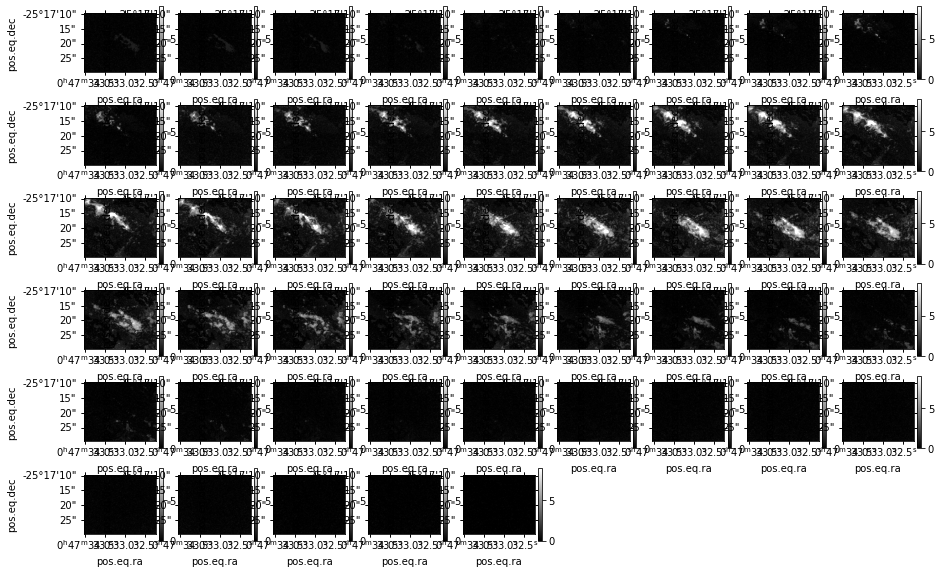

In [4]:
#Create a mask for all the cubes. 

###################No #If there is another cube that shares at least 67% of the structure, a structure is not to be masked.

#If there are two pixels that have greater than (some) sigma emission we will keep them (at most  (1-P)**2 chance of incorrect label)

#Assign greater confidence to more overlaps


paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
FP = pylab.array(['HCOp_J1-0.cube.fits','HCN_J1-0.cube.fits','H13CN_J1-0.cube.fits','ngc253_co32_hires_common.fits',"SiO_2_1.fits",  "H13CO_Plus_1_0.fits",'CCH_N1-0.cube.fits',"HC3N_11_10.fits",'NGC253.H13CN_4-3.pbcor.fits','NGC253.HCO+_4-3.pbcor.fits','NGC253.HCN_4-3.pbcor.fits'])





SCWs=[]
cds=[]
Ns = [] #get sigmas for all cubes
#Absorbtion_mask="Yes"
Absorbtion_mask="No"

#Find noises for first cubes
for i in range(len(FP)):
    sc = SpectralCube.read(paths[i])#FP[i])  
    
    sc_kms = sc.with_spectral_unit(u.km/u.s,velocity_convention="radio") # Change units from Hz to km/s
    
    sc_slab = sc_kms.spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)  # Crop out velocities we don't care about    
    sc_slab.allow_huge_operations=True    
    
    sc_K_kms = sc_slab.to(u.K)
    
    scW = sc_K_kms.wcs[:][:][0]

    #Find Noise 
    Np1 = SkyCoord('00h47m32.7s', '-25d17m26.5s', frame='icrs')#These are away from the clusters
    Np2 = SkyCoord('00h47m32.5s', '-25d17m25.5s', frame='icrs')
    NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
    NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
    
        
    
    no = 3
    m=0
    while(True):

        #For finding noise at far end velocity:
        
        #Q = sc_K_kms[int(len(sc_K_kms)-no):len(sc_K_kms),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]]#NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
        
        #For noise at all velocities
        Q = sc_K_kms[:,NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]]#NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
        Nsc1 = Q.unmasked_copy()

        if(Absorbtion_mask=="Yes"):
            bp = np.where(Nsc1.hdu.data<0)
            Nsc1.hdu.data[bp]=np.nan
        
            
        #Find StandardDev of this noise cube
        #m=Nsc1.std(axis=0)/u.K
        m=Nsc1.std()/u.K
        
        no+=1
        if(float(np.nanmax(m))!=0.0 and str(float(np.nanmax(m))) != str(np.nan)):
            print('noise:',float(np.nanmax(m)),str(float(np.nanmax(m))), str(np.nan),paths[i])
            break
            
    print(np.shape(m),m,Nsc1[0][0][0],np.shape(Nsc1))
    
    Ns.append(m)
    
#Find noises for pre-masked cubes

'''
for i in range(len(FP)-3,len(FP)):
    sc = SpectralCube.read(FP[i])  
    
    sc_kms = sc.with_spectral_unit(u.km/u.s,velocity_convention="radio") # Change units from Hz to km/s
    
    sc_slab = sc_kms.spectral_slab(-500. *u.km / u.s, 1000. *u.km / u.s)  # Crop out velocities we don't care about    
    sc_slab.allow_huge_operations=True    
    
    sc_K_kms = sc_slab.to(u.K)
    
    scW = sc_K_kms.wcs[:][:][0]

    #Find Noise. Should be the minimum value since it must be at least 3 sigma to be unmasked
    
    Nsc1 = sc_K_kms.unmasked_copy()
    
    
    bp = np.where(Nsc1.hdu.data<=0)
    
    Nsc1.hdu.data[bp]=np.nan
    m=np.nanmin(Nsc1)/u.K
    print(m,np.shape(Nsc1))
    Ns.append(m)
'''  
    
#print(Ns)

for i in range(1):
    cube=SpectralCube.read(paths[i])
    #print(cube.max(axis=0)[0][0]/u.K,Ns[i][0][0])
    #spatial_mask = cube.max(axis=0)/u.K > 3*Ns[i]        
    
    #cubeM = cube.with_mask(spatial_mask)
    #print(np.shape(cube),np.shape(cubeM))
    cd = cube.hdu.data
    #cds.append(cd)
    #print(len(cds))
    #SCWs.append(cube.wcs[:][:][0])

Confidences=cd

pix = np.where(Confidences != 0)
Confidences[pix] = 0 
Abs_Mask=np.copy(Confidences)
H13CN_MASK = np.copy(Confidences) 
H13COP_MASK = np.copy(Confidences) 
#print(Confidences.shape)
print(len(paths),len(FP),len(cds),len(Ns))

for i in range(len(paths)):
    cube=SpectralCube.read(paths[i])
    
    cd = cube.hdu.data
    if(Absorbtion_mask=="No"):
        GP = np.where(abs(cd)>Ns[i]*2)#No abs for only emission
    if(Absorbtion_mask=="Yes"):
        GP = np.where(cd>Ns[i]*2)#No abs for only emission
    NP = np.where(cd<0) 
    if(i ==0):
        GPX = np.where(abs(cd)>Ns[i]*1)
        H13COP_MASK[GPX] = 1#Mask for H13CO, only using HCO as a mask
        np.save('H13COP_MASK_NGC',H13COP_MASK)
    if(i ==1):
        GPX = np.where(abs(cd)>Ns[i]*1)
        H13CN_MASK[GPX] = 1#Mask for H13CN, only using HCN as a mask
        np.save('H13CN_MASK_NGC',H13CN_MASK)
    print(np.shape(GP))
    print(len(Confidences))
    Confidences[GP]+=1
    
    Abs_Mask[NP]+=1
np.save('Confidence_data',Confidences)
np.save('Noises_K',Ns)
print(Confidences.shape)


   
print(Confidences.shape)

#Create a plot of all the confidence values

fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map
#print(SCWs[0])
#print(Confidences.shape)0
for n in np.arange(0,int(len(Confidences)/5)):   
    
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(9,9,n+1,projection=scW) # We plot them in a grid    
    #im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*8)
    RA = ax.coords[0]                                                                  # 
    Dec = ax.coords[1]
    im = pylab.imshow(np.nanmean(Confidences[n*5:5*n+5],axis=0),cmap='gray',vmin=0,vmax=9)
    cb=pylab.colorbar(im,fraction=0.046,pad=0.04)  
    
'''
ax = pylab.subplot(1,1,1,projection=SCWs[0]) 
RA = ax.coords[0]                                                                  # 
Dec = ax.coords[1]
im = pylab.imshow(Confidences[int(len(Confidences)*.5)],cmap='rainbow')
'''
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(SCWs[0].world_to_pixel(center)[0]),int(scW.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Number of overlaps',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Confidence',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


np.save('Confidence_data',Confidences)
np.save('Noises_K',Ns)
np.save("Abs_Pix_NGC",Abs_Mask)
#Define common structures

#for i in range(len(paths)):


In [ ]:
#np.save('Confidence_data',Confidences)
#np.save('Noises_K',Ns)
#Confidences_L = np.load('Confidence_data.npy')


#print(np.shape(Cs),np.shape(Confidences))

'''
import os
fd = os.open("Confidences.txt",os.O_RDWR|os.O_CREAT)
open i in range(len(Confidences)):
    for h in range(len(Confidences[i])):
        os.write(fd,Confidences[i][h])
    

fd = os.open("Noises.txt",os.O_RDWR|os.O_CREAT)

for i in range(len(Confidences)):
    os.write(fd,Ns[i])
    
'''

In [4]:
RNames=[1,2,3,4,5,6,7,8,9,10,11]
SNames=[1,2,3,4,5,6,7,8,9,10,11]

Bars = np.load("CZM_Beam_Area_Ratios.npy")
NBars = np.load("NGC_Beam_Area_Ratios.npy")

SpecRes = np.load("CZM_Sres.npy")
NSpecRes = np.load("NGC_Sres.npy")

HCOp-J4-3_Dend_AbsSigmas
NGC_HCO_Plus.cube.K-kms.pbcor.fits
[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 0. 1. 0.]] (252, 400, 488) (252, 400, 488)
[nan nan nan ... nan nan nan]
(252, 400, 488) (252, 400, 488)
0.12999999999999598 arcsec 0.169999999999992 arcsec
8.839999999997895 pix2
(657,)


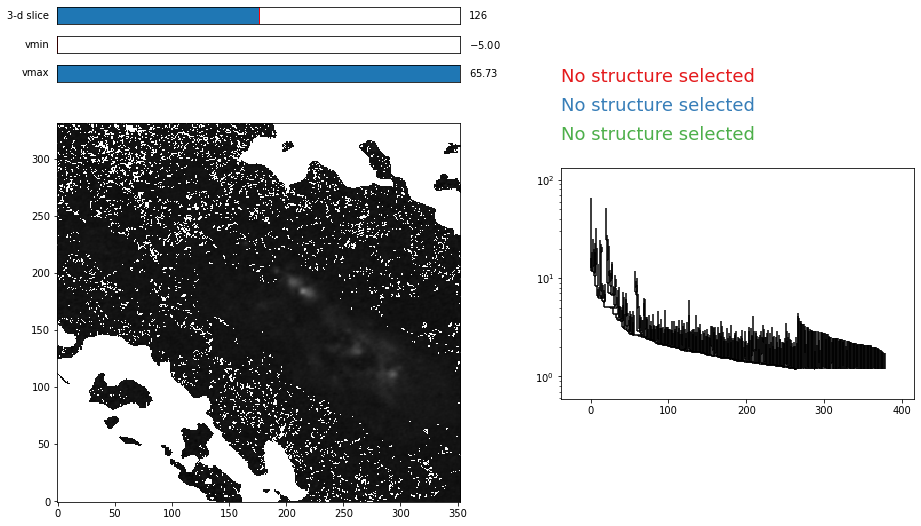

nan nan leaves:
Not Enough Well-Defined Structures


<Figure size 2160x2160 with 0 Axes>

In [15]:
#HCO+ 4-3

Num=9
Overlaps=1#6
Ram_Limiter=1#What percent of the cube my ram can handle
Name = "HCOp-J4-3_Dend_Abs"
name = "HCOp_j_4_3_CM_Abs.jpeg"


NameS = (Name+"Sigmas")
NameR = (Name+"Radii")

RNames=np.load('RNames.npy')
SNames=np.load('SNames.npy')

RNames[Num] = NameR
SNames[Num] = NameS
np.save("RNames",RNames)
np.save("SNames",SNames)
print(NameS)
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
path = paths[Num]
print(path)
Confidences = np.load('Confidence_data.npy')

Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True

Q = Qp.to(u.K).spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)



sc = Q.unmasked_copy()
scQ = Q
scW = sc.wcs[:][:][0]
print(Confidences[0],Confidences.shape,sc.hdu.data.shape)
BP = np.where(Confidences<Overlaps)#Overlaps)
del Confidences
sc.hdu.data[BP]=np.nan
print(sc.hdu.data[BP])
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc))
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

#cen_p1 = SkyCoord('00h47m33.6s', '-25d17m16.8s', frame='icrs')
#cen_p2 = SkyCoord('00h47m33.3s', '-25d17m14.2s', frame='icrs')

scW = scn.wcs[:][:][0]
scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
raQDP1 = [int(scQW.world_to_pixel(cen_p1)[0]),int(scQW.world_to_pixel(cen_p1)[1])]
raQDP2 = [int(scQW.world_to_pixel(cen_p2)[0]),int(scQW.world_to_pixel(cen_p2)[1])]
scQF = scQn[:,raQDP1[1]:raQDP2[1],raQDP1[0]:raQDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]
wcs = scF.wcs[:][:][0]
wcsQ = scQF.wcs[:][:][0]

#Unload all the unimportant vars

del BP
del paths


header = fits.getheader(path)

#make metadata for the dendrogram
metadata = {}
metadata['wavelength'] = header["RESTFRQ"]*u.Hz#
metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc

d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*5,min_npix=50) #The main culprit



vel,NA,na = sc.world[:,0,0]

##Analyze dendograms
print(np.shape(d))

v = d.viewer()
v.show()
p=d.plotter()
fig = plt.figure(1,figsize=(30,30))

scU = SpectralCube.read(path)  
scWU = scU.wcs[:][:][0]
raDP1U = [int(scWU.world_to_pixel(cen_p1)[0]),int(scWU.world_to_pixel(cen_p1)[1])]
raDP2U = [int(scWU.world_to_pixel(cen_p2)[0]),int(scWU.world_to_pixel(cen_p2)[1])]
scNU = scU[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),raDP1U[1]:raDP2U[1],raDP1U[0]:raDP2U[0]] # Make a subcube based on position
scWU = scNU.wcs[:][:][0]
#####
SC_KMSU = scNU.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMSU.allow_huge_operations=True
SC_K_KMSU = SC_KMSU.to(u.K)
SC_K_KMS_slabU = SC_K_KMSU.spectral_slab(-888. *u.km / u.s, 888. *u.km / u.s)  # Extract a subset of the velocities
ds=20
SC_CM = SC_K_KMS_slabU.downsample_axis(ds,axis=0) # Here we use downsampling to bin (average)the data # into coarse bins (broad channels) with width ~ 11 km/s    
vel, dec, ra = SC_CM.world[:,0,0]           # For plotting purposes, I want to know the average velocity
wcsU = SC_CM.wcs[:][:][0]
#Done making unmasked CM

noplot=True #produce plot of channel maps and contours? y/n

for n in np.arange(0,len(SC_CM.hdu.data)):   
    if(noplot):
        break
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(5,5,n+1,projection=sc.wcs[:][:][0]) # We plot them in a grid    
    im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*8)
    #print(np.shape(datn),np.shape(np.nanmean(datn[n:n+9],axis=0)))
    #im = pylab.imshow(np.nanmean(datn[n*ds:ds*n+ds-1],axis=0),cmap='gray',vmin=0,vmax=m*8)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(0,0,s="%i km/s"%(vel.value[n]),fontsize=30,c="Red") # Print the velocity of each averaged channel
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if n==len(SC_CM.hdu.data)-1:
        pylab.xlabel("Right Ascension",fontsize=30)
        pylab.ylabel("Declination",labelpad=-13,fontsize=30,rotation=90)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=6,h_pad=-0)
    
    for t in d.all_structures:
        
        I = t.indices()
        s = PPVStatistic(t,metadata=metadata)
        if(s.v_rms>1*u.pix and s.radius>1*u.pix and  s.radius<24*2*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
            k=0
            for ll in range(len(I[0])):
                if(I[0][ll] - int((n+.5)*ds) ==0):
                    k=int((n+.5)*ds)
                    break
            for ll in range(len(I[0])):
                if(k==int((n+.5)*ds)  and n!= 0):
                    break
                miN=3
                if(abs(I[0][ll] - int((n+.5)*ds)) <miN):
                    k=I[0][ll]
                    break
            if(k!=0):
                p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1,slice = k)
                ellipse = s.to_mpl_ellipse(edgecolor='pink', facecolor='pink',alpha=.1)
                ax.add_patch(ellipse)
            #print(t.indices())
            #break
if (noplot==False):
    fig.savefig(bbox_inches='tight',fname=name)



pc_per_pixel = metadata['arc_per_pix']/3600/180*np.pi/u.arcsec*metadata['distance']/u.Mpc
sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
radsL=np.array([])
radsB=np.array([])
sigmasL=np.array([])
sigmasB=np.array([])

for t in d.all_structures: 
    
    I = t.indices()
    s = PPVStatistic(t,metadata=metadata)
        
    if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>4.8*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
        
        
        
        
        
        
        
        if(t.is_leaf):
            radsL=np.append(radsL,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
            sigmasL=np.append(sigmasL,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)
        if(t.is_branch	):
            radsB=np.append(radsB,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
            sigmasB=np.append(sigmasB,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)



from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, radsL*10**6, sigmasL)
except:
    popt, pcov = np.nan,np.nan
poptB, pcovB = curve_fit(func, radsB*10**6, sigmasB)

Rcon = np.concatenate((radsL,radsB))
Scon = np.concatenate((sigmasL,sigmasB))

poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)
try:
    print(popt,pcov,"leaves:")
    print("a = ",popt[0],"+-",np.sqrt(pcov[0][0]))
    print("b = ",popt[1],"+-",np.sqrt(pcov[1][1]))
    print(poptB,pcovB,"branches:")
    print("a = ",poptB[0],"+-",np.sqrt(pcovB[0][0]))
    print("b = ",poptB[1],"+-",np.sqrt(pcovB[1][1]))
    print(poptCon,pcovCon,"All_structures:")
    print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
    print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))

    fig = plt.figure()
    ax = pylab.subplot(2, 1, 1)
    xpL,xpB = ax.scatter(radsL*10**6,sigmasL),ax.scatter(radsB*10**6,sigmasB)
    xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
    ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])
    xpa1,xpa2,xpaTot = ax.plot(xs,ysL),ax.plot(xs,ysB),ax.plot(xs,ysCon)
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()
    ax2 = pylab.subplot(2, 1, 2)
    xpL,xpB = ax2.scatter(radsL*10**6,sigmasL),ax2.scatter(radsB*10**6,sigmasB)
    p,p2,p3 = ax2.plot(xs,ysL),ax2.plot(xs,ysB),ax2.plot(xs,ysCon)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()

except:
    
    print("Not Enough Well-Defined Structures")
NameSL = (NameS+"_Leaves")
NameSB = (NameS+"_Branches")
NameRL = (NameR+"_Leaves")
NameRB = (NameR+"_Branches")

np.save(NameSL,sigmasL)
np.save(NameSB,sigmasB)
np.save(NameRL,radsL)
np.save(NameRB,radsB)

NGC253_HCN.cube.reproject.K-kms.pbcor.fits
[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 0. 1. 0.]] (252, 400, 488) (252, 400, 488)
[nan nan nan ... nan nan nan]
(252, 400, 488) (252, 400, 488)
0.12999999999999598 arcsec 0.169999999999992 arcsec
8.839999999997895 pix2
(8812,)


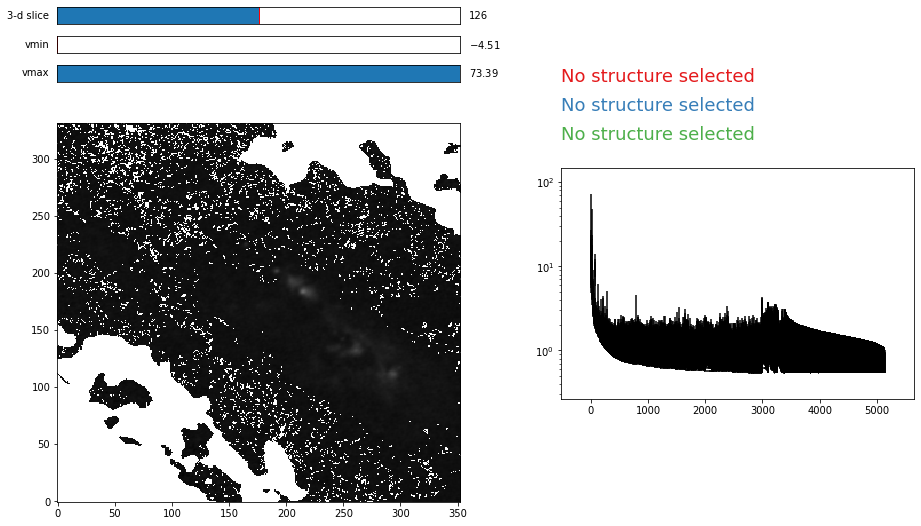

[8.14931183 0.04115283] [[inf inf]
 [inf inf]] leaves:
a =  8.149311827275785 +- inf
b =  0.04115283265542409 +- inf
[12.63400984  0.4320528 ] [[ 1.23511452e-01 -2.87187442e-03]
 [-2.87187442e-03  6.90136473e-05]] branches:
a =  12.63400983825368 +- 0.35144196066756106
b =  0.4320527979284707 +- 0.008307445295210008
[12.59403617  0.43295766] [[ 1.22926249e-01 -2.86722164e-03]
 [-2.86722164e-03  6.91180129e-05]] All_structures:
a =  12.594036165323427 +- 0.35060839764978796
b =  0.43295766100460165 +- 0.00831372436782962


<Figure size 2160x2160 with 0 Axes>

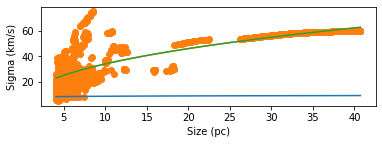

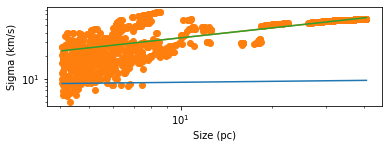

In [16]:
#HCN 4-3


Num = 10
Overlaps=1#4
Ram_Limiter = 1
Name = "HCN4-3_Abs"
name = "HCN4_3_CM_Contours_DS_10_Abs.jpeg"
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")
RNames=np.load('RNames.npy')
SNames=np.load('SNames.npy')

RNames[Num] = NameR
SNames[Num] = NameS
np.save("RNames",RNames)
np.save("SNames",SNames)
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
path = paths[Num]
print(path)
Confidences = np.load('Confidence_data.npy')

Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
#Make subcube
Q = SpectralCube.read(path)  
sc = Q.unmasked_copy()
scQ = Q
scW = sc.wcs[:][:][0]
print(Confidences[0],Confidences.shape,sc.hdu.data.shape)
BP = np.where(Confidences<Overlaps)#Overlaps)
del Confidences
sc.hdu.data[BP]=np.nan
print(sc.hdu.data[BP])
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc))
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

#cen_p1 = SkyCoord('00h47m33.6s', '-25d17m16.8s', frame='icrs')
#cen_p2 = SkyCoord('00h47m33.3s', '-25d17m14.2s', frame='icrs')

scW = scn.wcs[:][:][0]
scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
raQDP1 = [int(scQW.world_to_pixel(cen_p1)[0]),int(scQW.world_to_pixel(cen_p1)[1])]
raQDP2 = [int(scQW.world_to_pixel(cen_p2)[0]),int(scQW.world_to_pixel(cen_p2)[1])]
scQF = scQn[:,raQDP1[1]:raQDP2[1],raQDP1[0]:raQDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]
wcs = scF.wcs[:][:][0]
wcsQ = scQF.wcs[:][:][0]

#Unload all the unimportant vars

del BP
del paths

#make metadata for the dendrogram
metadata = {}
metadata['wavelength'] = header["RESTFRQ"]*u.Hz#
metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc

d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*5,min_npix=50) #The main culprit



header = fits.getheader(path)


vel,NA,na = sc.world[:,0,0]

##Analyze dendograms
print(np.shape(d))

v = d.viewer()
v.show()
p=d.plotter()
fig = plt.figure(1,figsize=(30,30))

scU = SpectralCube.read(path)  
scWU = scU.wcs[:][:][0]
raDP1U = [int(scWU.world_to_pixel(cen_p1)[0]),int(scWU.world_to_pixel(cen_p1)[1])]
raDP2U = [int(scWU.world_to_pixel(cen_p2)[0]),int(scWU.world_to_pixel(cen_p2)[1])]
scNU = scU[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),raDP1U[1]:raDP2U[1],raDP1U[0]:raDP2U[0]] # Make a subcube based on position
scWU = scNU.wcs[:][:][0]
#####
SC_KMSU = scNU.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMSU.allow_huge_operations=True
SC_K_KMSU = SC_KMSU.to(u.K)
SC_K_KMS_slabU = SC_K_KMSU.spectral_slab(-888. *u.km / u.s, 888. *u.km / u.s)  # Extract a subset of the velocities
ds=20
SC_CM = SC_K_KMS_slabU.downsample_axis(ds,axis=0) # Here we use downsampling to bin (average)the data # into coarse bins (broad channels) with width ~ 11 km/s    
vel, dec, ra = SC_CM.world[:,0,0]           # For plotting purposes, I want to know the average velocity
wcsU = SC_CM.wcs[:][:][0]
#Done making unmasked CM

noplot=True #produce plot of channel maps and contours? y/n

for n in np.arange(0,len(SC_CM.hdu.data)):   
    if(noplot):
        break
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(5,5,n+1,projection=sc.wcs[:][:][0]) # We plot them in a grid    
    im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*8)
    #print(np.shape(datn),np.shape(np.nanmean(datn[n:n+9],axis=0)))
    #im = pylab.imshow(np.nanmean(datn[n*ds:ds*n+ds-1],axis=0),cmap='gray',vmin=0,vmax=m*8)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(0,0,s="%i km/s"%(vel.value[n]),fontsize=30,c="Red") # Print the velocity of each averaged channel
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if n==len(SC_CM.hdu.data)-1:
        pylab.xlabel("Right Ascension",fontsize=30)
        pylab.ylabel("Declination",labelpad=-13,fontsize=30,rotation=90)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=6,h_pad=-0)
    
    for t in d.all_structures:
        
        I = t.indices()
        s = PPVStatistic(t,metadata=metadata)
        if(s.v_rms>1*u.pix and s.radius>1*u.pix and  s.radius<24*2*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
            k=0
            for ll in range(len(I[0])):
                if(I[0][ll] - int((n+.5)*ds) ==0):
                    k=int((n+.5)*ds)
                    break
            for ll in range(len(I[0])):
                if(k==int((n+.5)*ds)  and n!= 0):
                    break
                miN=3
                if(abs(I[0][ll] - int((n+.5)*ds)) <miN):
                    k=I[0][ll]
                    break
            if(k!=0):
                p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1,slice = k)
                ellipse = s.to_mpl_ellipse(edgecolor='pink', facecolor='pink',alpha=.1)
                ax.add_patch(ellipse)
            #print(t.indices())
            #break
if (noplot==False):
    fig.savefig(bbox_inches='tight',fname=name)


pc_per_pixel = metadata['arc_per_pix']/3600/180*np.pi/u.arcsec*metadata['distance']/u.Mpc
sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
radsL=np.array([])
radsB=np.array([])
sigmasL=np.array([])
sigmasB=np.array([])

for t in d.all_structures: 
    
    I = t.indices()
    s = PPVStatistic(t,metadata=metadata)
        
    if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>4.8*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
        
        
        
        
        
        
        
        if(t.is_leaf):
            radsL=np.append(radsL,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
            sigmasL=np.append(sigmasL,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)
        if(t.is_branch	):
            radsB=np.append(radsB,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
            sigmasB=np.append(sigmasB,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)



from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, radsL*10**6, sigmasL) 
except:
    popt, pcov = np.nan,np.nan
poptB, pcovB = curve_fit(func, radsB*10**6, sigmasB)

Rcon = np.concatenate((radsL,radsB))
Scon = np.concatenate((sigmasL,sigmasB))

poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)

try:
    print(popt,pcov,"leaves:")
    print("a = ",popt[0],"+-",np.sqrt(pcov[0][0]))
    print("b = ",popt[1],"+-",np.sqrt(pcov[1][1]))
    print(poptB,pcovB,"branches:")
    print("a = ",poptB[0],"+-",np.sqrt(pcovB[0][0]))
    print("b = ",poptB[1],"+-",np.sqrt(pcovB[1][1]))
    print(poptCon,pcovCon,"All_structures:")
    print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
    print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))

    fig = plt.figure()
    ax = pylab.subplot(2, 1, 1)
    xpL,xpB = ax.scatter(radsL*10**6,sigmasL),ax.scatter(radsB*10**6,sigmasB)
    xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
    ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])
    xpa1,xpa2,xpaTot = ax.plot(xs,ysL),ax.plot(xs,ysB),ax.plot(xs,ysCon)
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()
    ax2 = pylab.subplot(2, 1, 2)
    xpL,xpB = ax2.scatter(radsL*10**6,sigmasL),ax2.scatter(radsB*10**6,sigmasB)
    p,p2,p3 = ax2.plot(xs,ysL),ax2.plot(xs,ysB),ax2.plot(xs,ysCon)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()

except:
    
    print("Not Enough Well-Defined Structures")
NameSL = (NameS+"_Leaves")
NameSB = (NameS+"_Branches")
NameRL = (NameR+"_Leaves")
NameRB = (NameR+"_Branches")

np.save(NameSL,sigmasL)
np.save(NameSB,sigmasB)
np.save(NameRL,radsL)
np.save(NameRB,radsB)

['HCOp-J1_Dend_AbsRadii' 'HCN-J1_Dend_AbsRadii' 'H13CN-J1_AbsRadii'
 'CO 3-2_AbsRadii' '5' 'H13COp_1_0_AbsRadii' '7' '8' 'H13CN4_3_AbsRadii'
 'HCOp-J4-3_Dend_AbsRadii' 'HCN4-3_AbsRadii'] ['HCOp-J1_Dend_AbsSigmas' 'HCN-J1_Dend_AbsSigmas' 'H13CN-J1_AbsSigmas'
 'CO 3-2_AbsSigmas' '5' 'H13COp_1_0_AbsSigmas' '7' '8'
 'H13CN4_3_AbsSigmas' 'HCOp-J4-3_Dend_AbsSigmas' 'HCN4-3_AbsSigmas'] H13CN4_3_AbsRadii H13CN4_3_AbsSigmas
H13CN4_3_AbsSigmas
NGC_H13CN.cube.reproject.K-kms.pbcor.fits
[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 0. 1. 0.]] (252, 400, 488) (252, 400, 488)
[nan nan nan ... nan nan nan]
(252, 400, 488) (252, 400, 488)
0.12999999999999598 arcsec 0.169999999999992 arcsec
8.839999999997895 pix2
(168,)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
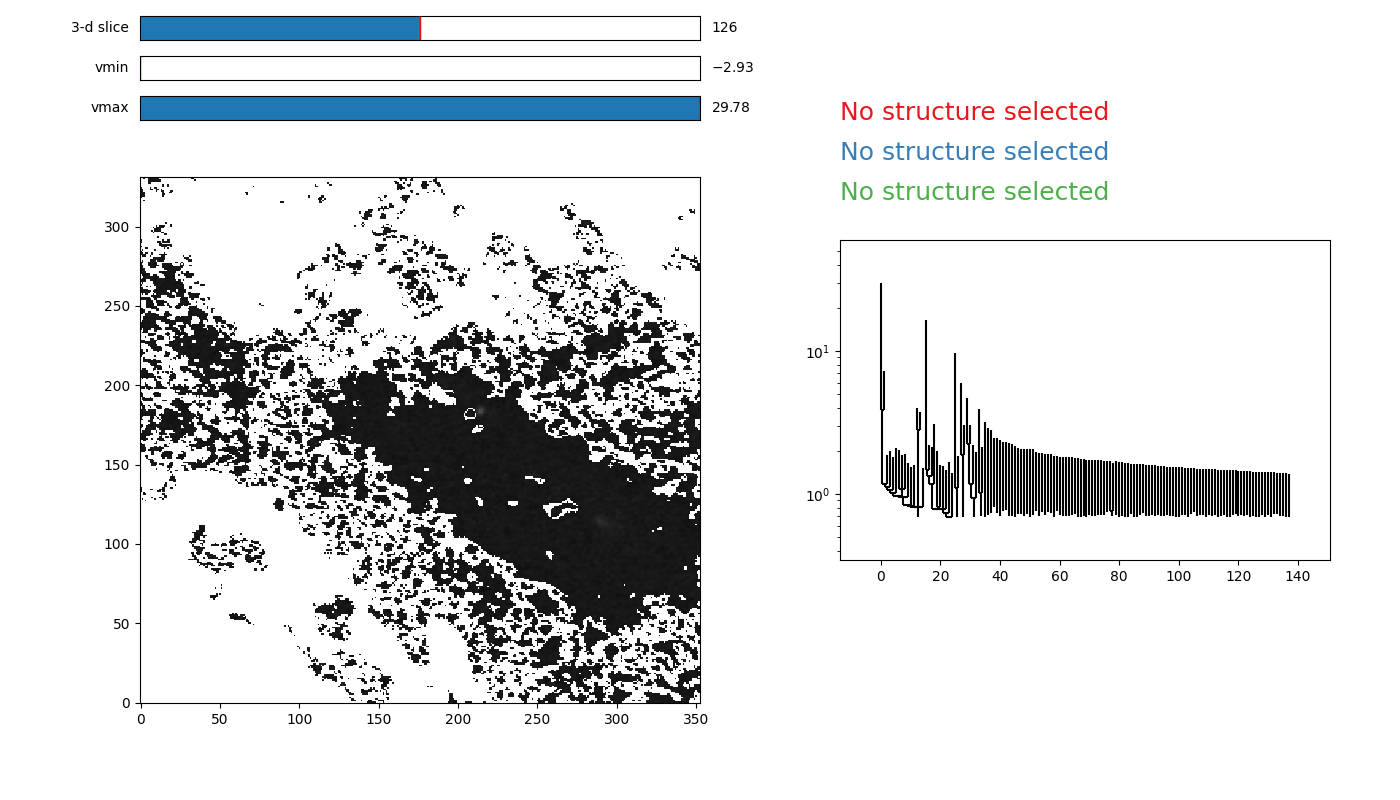

(8,)
nan nan leaves:
Not Enough Well-Defined Structures


In [3]:
#H13CN 4-3


Num = 8
Overlaps=1#5
Ram_Limiter = 1
Name = "H13CN4_3_Abs"
name = "H13CN4_3_CM_Contours_DS_10_Abs.jpeg"
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")
RNames=np.load('RNames.npy')
SNames=np.load('SNames.npy')

RNames[Num] = NameR
SNames[Num] = NameS
print(RNames,SNames,NameR,NameS)
np.save("RNames",RNames)
np.save("SNames",SNames)

print(NameS)
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
path = paths[Num]
print(path)
Confidences = np.load('Confidence_data.npy')
H13CN_MASK = np.load('H13CN_MASK_NGC.npy')
Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
#Make subcube
Q = SpectralCube.read(path)  
sc = Q.unmasked_copy()
scQ = Q
scW = sc.wcs[:][:][0]
print(Confidences[0],Confidences.shape,sc.hdu.data.shape)
#BP = np.where(Confidences<Overlaps)#Overlaps)
BP = np.where(H13CN_MASK<1) #Mask where HCN is not found >1 sigma
del Confidences
sc.hdu.data[BP]=np.nan
print(sc.hdu.data[BP])
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc))
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

#cen_p1 = SkyCoord('00h47m33.6s', '-25d17m16.8s', frame='icrs')
#cen_p2 = SkyCoord('00h47m33.3s', '-25d17m14.2s', frame='icrs')

scW = scn.wcs[:][:][0]
scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
raQDP1 = [int(scQW.world_to_pixel(cen_p1)[0]),int(scQW.world_to_pixel(cen_p1)[1])]
raQDP2 = [int(scQW.world_to_pixel(cen_p2)[0]),int(scQW.world_to_pixel(cen_p2)[1])]
scQF = scQn[:,raQDP1[1]:raQDP2[1],raQDP1[0]:raQDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]
wcs = scF.wcs[:][:][0]
wcsQ = scQF.wcs[:][:][0]

#Unload all the unimportant vars

del BP
del paths
#make metadata for the dendrogram
header = fits.getheader(path)
metadata = {}
metadata['wavelength'] = header["RESTFRQ"]*u.Hz#
metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc

d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*1,min_npix=15) #The main culprit




##Analyze dendograms
print(np.shape(d))

v = d.viewer()
v.show()
p=d.plotter()
fig = plt.figure(1,figsize=(30,30))

scU = SpectralCube.read(path)  
scWU = scU.wcs[:][:][0]
raDP1U = [int(scWU.world_to_pixel(cen_p1)[0]),int(scWU.world_to_pixel(cen_p1)[1])]
raDP2U = [int(scWU.world_to_pixel(cen_p2)[0]),int(scWU.world_to_pixel(cen_p2)[1])]
scNU = scU[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),raDP1U[1]:raDP2U[1],raDP1U[0]:raDP2U[0]] # Make a subcube based on position
scWU = scNU.wcs[:][:][0]
#####
SC_KMSU = scNU.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMSU.allow_huge_operations=True
SC_K_KMSU = SC_KMSU.to(u.K)
SC_K_KMS_slabU = SC_K_KMSU.spectral_slab(-888. *u.km / u.s, 888. *u.km / u.s)  # Extract a subset of the velocities
ds=20
SC_CM = SC_K_KMS_slabU.downsample_axis(ds,axis=0) # Here we use downsampling to bin (average)the data # into coarse bins (broad channels) with width ~ 11 km/s    
vel, dec, ra = SC_CM.world[:,0,0]           # For plotting purposes, I want to know the average velocity
wcsU = SC_CM.wcs[:][:][0]
#Done making unmasked CM

noplot=True #produce plot of channel maps and contours? y/n

for n in np.arange(0,len(SC_CM.hdu.data)):   
    if(noplot):
        break
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(5,5,n+1,projection=sc.wcs[:][:][0]) # We plot them in a grid    
    im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*8)
    #print(np.shape(datn),np.shape(np.nanmean(datn[n:n+9],axis=0)))
    #im = pylab.imshow(np.nanmean(datn[n*ds:ds*n+ds-1],axis=0),cmap='gray',vmin=0,vmax=m*8)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(0,0,s="%i km/s"%(vel.value[n]),fontsize=30,c="Red") # Print the velocity of each averaged channel
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if n==len(SC_CM.hdu.data)-1:
        pylab.xlabel("Right Ascension",fontsize=30)
        pylab.ylabel("Declination",labelpad=-13,fontsize=30,rotation=90)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=6,h_pad=-0)
    
    for t in d.all_structures:
        
        I = t.indices()
        s = PPVStatistic(t,metadata=metadata)
        if(s.v_rms>1*u.pix and s.radius>1*u.pix and  s.radius<24*2*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
            k=0
            for ll in range(len(I[0])):
                if(I[0][ll] - int((n+.5)*ds) ==0):
                    k=int((n+.5)*ds)
                    break
            for ll in range(len(I[0])):
                if(k==int((n+.5)*ds)  and n!= 0):
                    break
                miN=3
                if(abs(I[0][ll] - int((n+.5)*ds)) <miN):
                    k=I[0][ll]
                    break
            if(k!=0):
                p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1,slice = k)
                ellipse = s.to_mpl_ellipse(edgecolor='pink', facecolor='pink',alpha=.1)
                ax.add_patch(ellipse)
            #print(t.indices())
            #break
if (noplot==False):
    fig.savefig(bbox_inches='tight',fname=name)

pc_per_pixel = metadata['arc_per_pix']/3600/180*np.pi/u.arcsec*metadata['distance']/u.Mpc
sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
radsL=np.array([])
radsB=np.array([])
sigmasL=np.array([])
sigmasB=np.array([])

for t in d.all_structures: 
    
    I = t.indices()
    s = PPVStatistic(t,metadata=metadata)
        
    if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>4.8*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
        
        
        
        
        
        
        
        if(t.is_leaf):
            radsL=np.append(radsL,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
            sigmasL=np.append(sigmasL,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)
        if(t.is_branch	):
            radsB=np.append(radsB,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
            sigmasB=np.append(sigmasB,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)



from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)
try:     
    popt, pcov = curve_fit(func, radsL*10**6, sigmasL) 
except:     
    popt, pcov = np.nan,np.nan
poptB, pcovB = curve_fit(func, radsB*10**6, sigmasB)

Rcon = np.concatenate((radsL,radsB))
Scon = np.concatenate((sigmasL,sigmasB))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)

try:
    print(popt,pcov,"leaves:")
    print("a = ",popt[0],"+-",np.sqrt(pcov[0][0]))
    print("b = ",popt[1],"+-",np.sqrt(pcov[1][1]))
    print(poptB,pcovB,"branches:")
    print("a = ",poptB[0],"+-",np.sqrt(pcovB[0][0]))
    print("b = ",poptB[1],"+-",np.sqrt(pcovB[1][1]))
    print(poptCon,pcovCon,"All_structures:")
    print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
    print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))

    fig = plt.figure()
    ax = pylab.subplot(2, 1, 1)
    xpL,xpB = ax.scatter(radsL*10**6,sigmasL),ax.scatter(radsB*10**6,sigmasB)
    xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
    ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])
    xpa1,xpa2,xpaTot = ax.plot(xs,ysL),ax.plot(xs,ysB),ax.plot(xs,ysCon)
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()
    ax2 = pylab.subplot(2, 1, 2)
    xpL,xpB = ax2.scatter(radsL*10**6,sigmasL),ax2.scatter(radsB*10**6,sigmasB)
    p,p2,p3 = ax2.plot(xs,ysL),ax2.plot(xs,ysB),ax2.plot(xs,ysCon)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()

except:
    
    print("Not Enough Well-Defined Structures")
NameSL = (NameS+"_Leaves")
NameSB = (NameS+"_Branches")
NameRL = (NameR+"_Leaves")
NameRB = (NameR+"_Branches")

np.save(NameSL,sigmasL)
np.save(NameSB,sigmasB)
np.save(NameRL,radsL)
np.save(NameRB,radsB)

['HCOp-J1_Dend_AbsRadii' 'HCN-J1_Dend_AbsRadii' 'H13CN-J1_AbsRadii'
 'CO 3-2_AbsRadii' '5' 'H13COp_1_0_AbsRadii' '7' '8' '9' '10' '11'] ['HCOp-J1_Dend_AbsSigmas' 'HCN-J1_Dend_AbsSigmas' 'H13CN-J1_AbsSigmas'
 'CO 3-2_AbsSigmas' '5' 'H13COp_1_0_AbsSigmas' '7' '8' '9' '10' '11'] H13COp_1_0_AbsRadii H13COp_1_0_AbsSigmas
H13COp_1_0_AbsSigmas
H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits
[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]] (252, 400, 488) (252, 400, 488)
[nan nan nan ... nan nan nan]
(252, 400, 488) (252, 400, 488)
0.20722991228103602 arcsec 0.28256428241730003 arcsec
23.422308583632642 pix2
(13,)


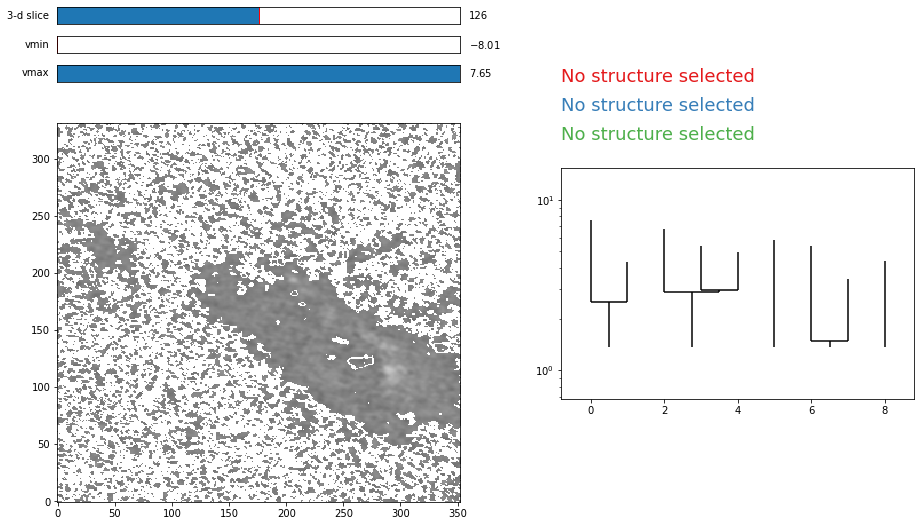

(13,)
[4.63417537 0.7274359 ] [[ 0.97927366 -0.16032303]
 [-0.16032303  0.02938902]] leaves:
a =  4.634175371324563 +- 0.989582566904077
b =  0.7274359016270574 +- 0.17143225100135484
[1.3025251  1.34404365] [[ 0.41233305 -0.16000165]
 [-0.16000165  0.06266247]] branches:
a =  1.302525099590032 +- 0.6421316453360171
b =  1.344043651556748 +- 0.2503247346620545
[4.4107282  0.72808909] [[ 0.63551572 -0.08213365]
 [-0.08213365  0.01150999]] All_structures:
a =  4.410728197147834 +- 0.7971923955564599
b =  0.7280890918461969 +- 0.1072845998506391


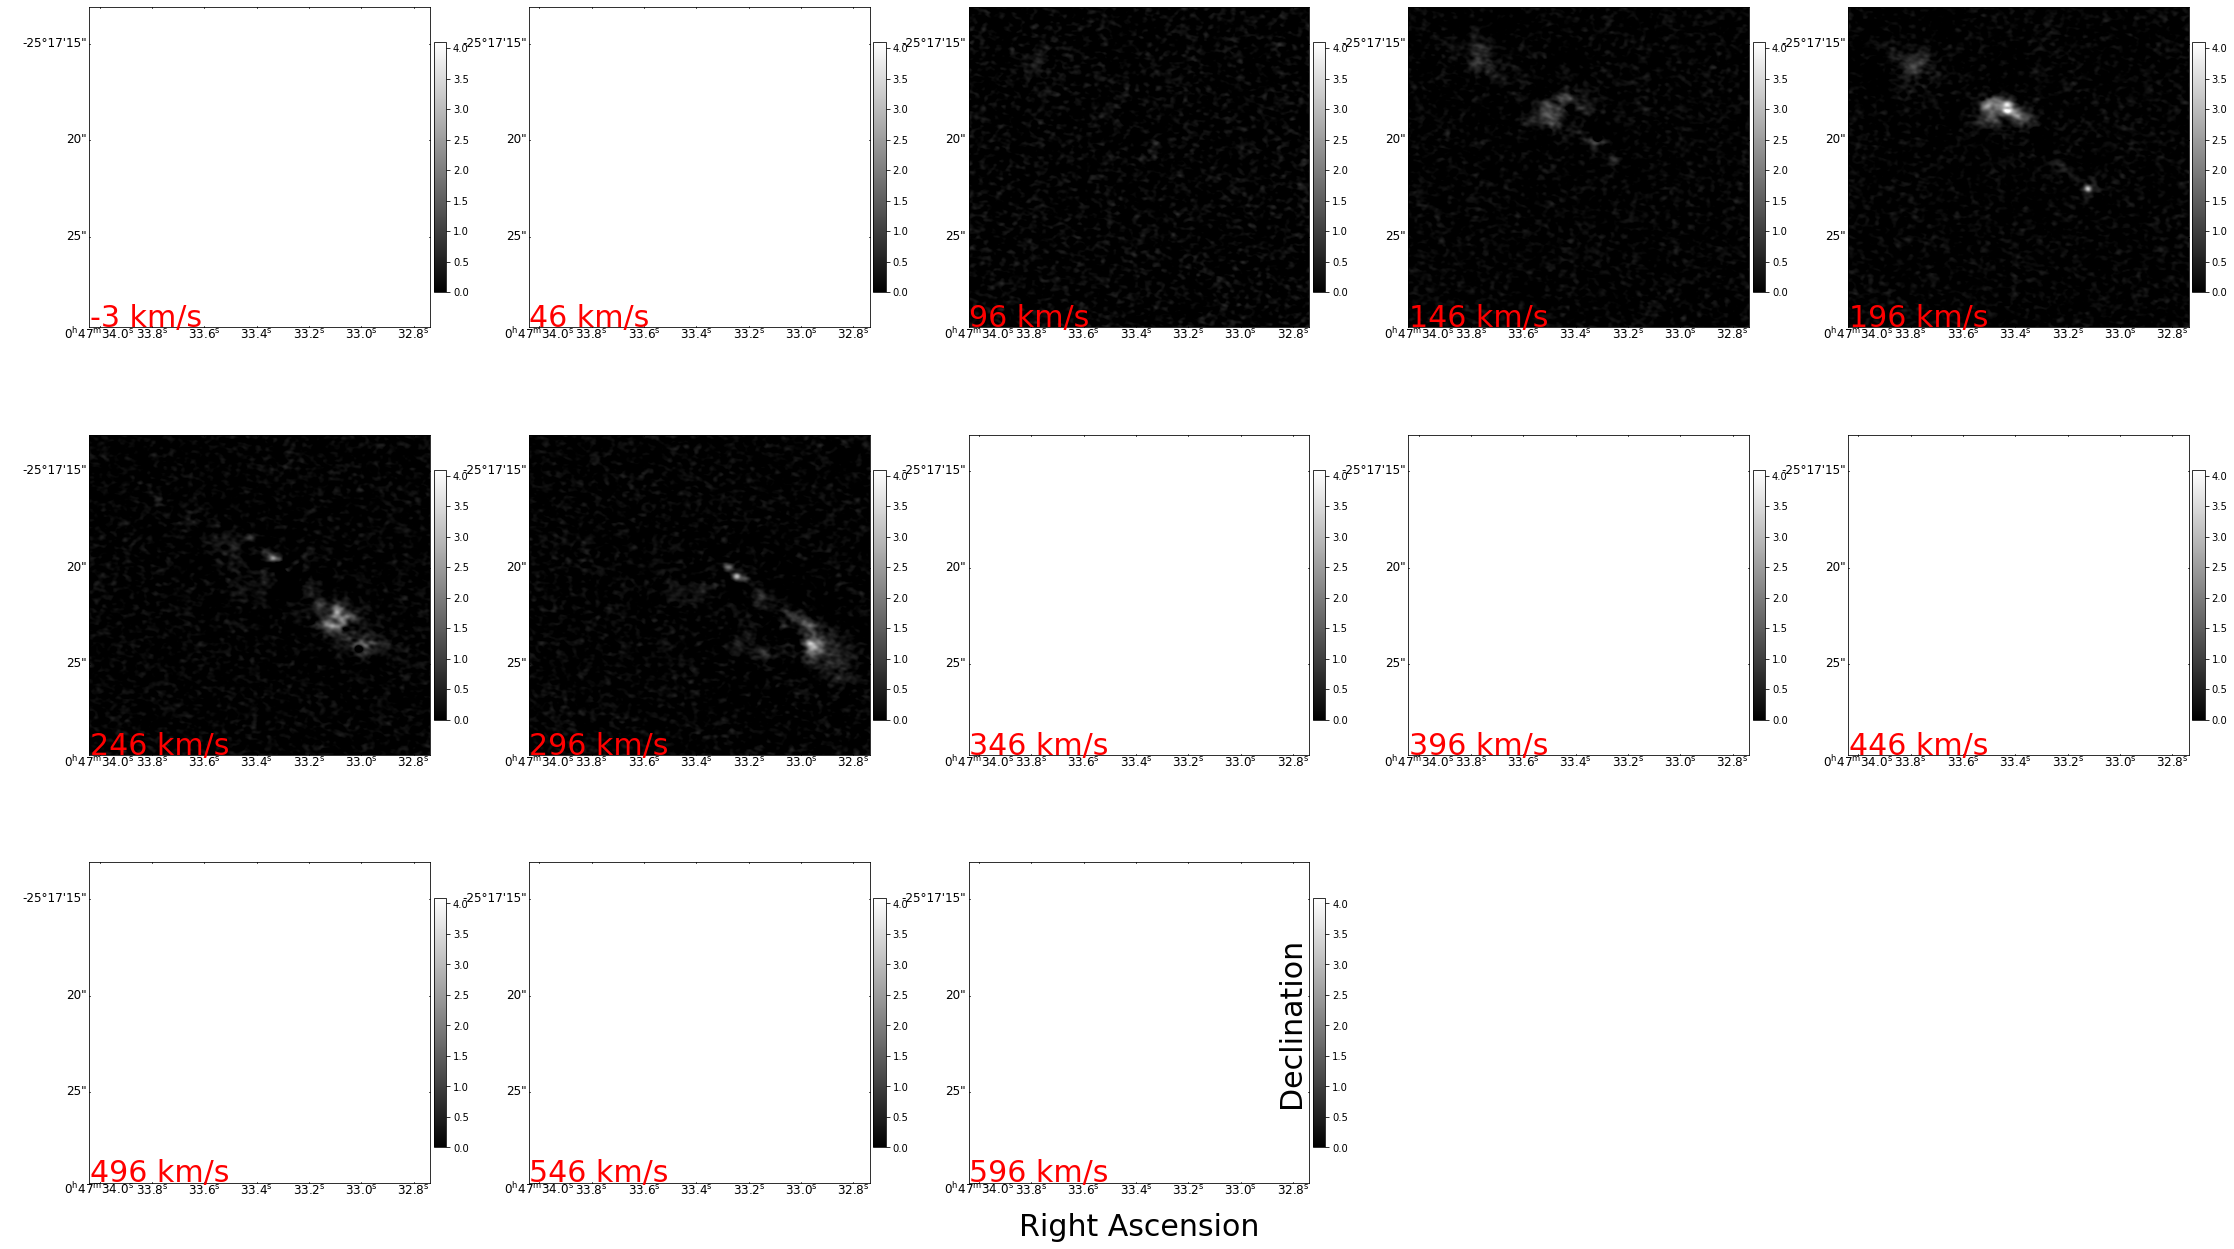

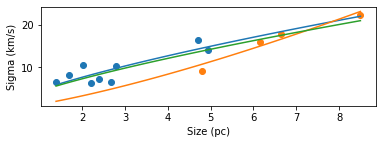

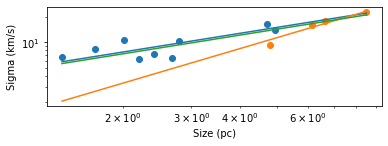

In [98]:
#H13CO 1-0


Num = 5
Overlaps=1#5
Ram_Limiter = 1
Name = "H13COp_1_0_Abs"
name = "H13COp1_0_CM_Contours_DS_10_Abs.jpeg"
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")
RNames=np.load('RNames.npy')
SNames=np.load('SNames.npy')

RNames[Num] = NameR
SNames[Num] = NameS
print(RNames,SNames,NameR,NameS)
np.save("RNames",RNames)
np.save("SNames",SNames)

print(NameS)
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
path = paths[Num]
print(path)
Confidences = np.load('Confidence_data.npy')
H13COP_MASK = np.load('H13COP_MASK_NGC.npy')
Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True

Q = Qp.to(u.K).spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)


sc = Q.unmasked_copy()
scQ = Q
scW = sc.wcs[:][:][0]
print(Confidences[0],Confidences.shape,sc.hdu.data.shape)
#BP = np.where(Confidences<Overlaps)#Overlaps)
BP = np.where(H13COP_MASK<1) #Mask where HCO is not found >1 sigma
del Confidences
sc.hdu.data[BP]=np.nan
print(sc.hdu.data[BP])
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc))
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

#cen_p1 = SkyCoord('00h47m33.6s', '-25d17m16.8s', frame='icrs')
#cen_p2 = SkyCoord('00h47m33.3s', '-25d17m14.2s', frame='icrs')

scW = scn.wcs[:][:][0]
scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
raQDP1 = [int(scQW.world_to_pixel(cen_p1)[0]),int(scQW.world_to_pixel(cen_p1)[1])]
raQDP2 = [int(scQW.world_to_pixel(cen_p2)[0]),int(scQW.world_to_pixel(cen_p2)[1])]
scQF = scQn[:,raQDP1[1]:raQDP2[1],raQDP1[0]:raQDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]
wcs = scF.wcs[:][:][0]
wcsQ = scQF.wcs[:][:][0]

#Unload all the unimportant vars

del BP
del paths
#make metadata for the dendrogram
header = fits.getheader(path)
metadata = {}
try:
    metadata['wavelength'] = header["RESTFREQ"]*u.Hz#
except:
    metadata['wavelength'] = header["RESTFRQ"]*u.Hz#
metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc
metadata["vaxis"]=0

d = astrodendro.Dendrogram.compute(datn,min_delta=m*5,min_value=m*4,min_npix=5*2) #The main culprit




##Analyze dendograms
print(np.shape(d))

v = d.viewer()
v.show()
p=d.plotter()
fig = plt.figure(1,figsize=(30,30))

scU = SpectralCube.read(path)  
scWU = scU.wcs[:][:][0]
raDP1U = [int(scWU.world_to_pixel(cen_p1)[0]),int(scWU.world_to_pixel(cen_p1)[1])]
raDP2U = [int(scWU.world_to_pixel(cen_p2)[0]),int(scWU.world_to_pixel(cen_p2)[1])]
scNU = scU[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),raDP1U[1]:raDP2U[1],raDP1U[0]:raDP2U[0]] # Make a subcube based on position
scWU = scNU.wcs[:][:][0]
#####
SC_KMSU = scNU.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMSU.allow_huge_operations=True
SC_K_KMSU = SC_KMSU.to(u.K)
SC_K_KMS_slabU = SC_K_KMSU.spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)  # Extract a subset of the velocities
ds=20
SC_CM = SC_K_KMS_slabU.downsample_axis(ds,axis=0) # Here we use downsampling to bin (average)the data # into coarse bins (broad channels) with width ~ 11 km/s    
vel, dec, ra = SC_CM.world[:,0,0]           # For plotting purposes, I want to know the average velocity

wcsU = SC_CM.wcs[:][:][0]
#Done making unmasked CM

noplot=False #produce plot of channel maps and contours? y/n

for n in np.arange(0,len(SC_CM.hdu.data)):   
    if(noplot):
        break
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(5,5,n+1,projection=sc.wcs[:][:][0]) # We plot them in a grid    
    im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*12)
    #print(np.shape(datn),np.shape(np.nanmean(datn[n:n+9],axis=0)))
    #im = pylab.imshow(np.nanmean(datn[n*ds:ds*n+ds-1],axis=0),cmap='gray',vmin=0,vmax=m*8)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(0,0,s="%i km/s"%(vel.value[n]),fontsize=30,c="Red") # Print the velocity of each averaged channel
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if n==len(SC_CM.hdu.data)-1:
        pylab.xlabel("Right Ascension",fontsize=30)
        pylab.ylabel("Declination",labelpad=-13,fontsize=30,rotation=90)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=6,h_pad=-0)
    
    for t in d.all_structures:
        
        I = t.indices()
        Cont = True
        try:
            #print(str(t.descendants[0]).find("branch"))
            #print(str(t.descendants[0]))
            if(str(t.descendants[0]).find("branch") != -1):
                Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
        except:
            lop=12

        if(Cont):
            s = PPVStatistic(t,metadata=metadata)
            #if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>np.sqrt(NBars[1])*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 4):
            if((True)):
                for lmn in range(np.nanmax(I[0])-np.nanmin(I[0])):
                    p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1,slice = lmn)
                #p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1)
                #print(n)
                #ellipse = s.to_mpl_ellipse(edgecolor='pink', facecolor='pink',alpha=.1)
                #ax.add_patch(ellipse)
                #print(t.indices())
                #break
if (noplot==False):
    fig.savefig(bbox_inches='tight',fname=name)

pc_per_pixel = metadata['arc_per_pix']/3600/180*np.pi/u.arcsec*metadata['distance']/u.Mpc

sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
radsL=np.array([])
radsB=np.array([])
sigmasL=np.array([])
sigmasB=np.array([])

for t in d.all_structures: 
    
    I = t.indices()
    Cont = True
    try:
        #print(str(t.descendants[0]).find("branch"))
        #print(str(t.descendants[0]))
        if(str(t.descendants[0]).find("branch") != -1):
            Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
    except:
        lop=12
    
    if(Cont):
        s = PPVStatistic(t,metadata=metadata)
        #if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>np.sqrt(NBars[3])*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 4):
        if(True):
        #if(s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3):







            if(t.is_leaf):
                radsL=np.append(radsL,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
                sigmasL=np.append(sigmasL,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)
            if(t.is_branch	):
                radsB=np.append(radsB,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
                sigmasB=np.append(sigmasB,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)



from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, radsL*10**6, sigmasL)
except:
    popt, pcov = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
try:
    poptB, pcovB = curve_fit(func, radsB*10**6, sigmasB)
except:
    poptB, pcovB = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]

Rcon = np.concatenate((radsL,radsB))
Scon = np.concatenate((sigmasL,sigmasB))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)
try:
    print(popt,pcov,"leaves:")
    print("a = ",popt[0],"+-",np.sqrt(pcov[0][0]))
    print("b = ",popt[1],"+-",np.sqrt(pcov[1][1]))
    print(poptB,pcovB,"branches:")
    print("a = ",poptB[0],"+-",np.sqrt(pcovB[0][0]))
    print("b = ",poptB[1],"+-",np.sqrt(pcovB[1][1]))
    print(poptCon,pcovCon,"All_structures:")
    print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
    print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))

    fig = plt.figure()
    ax = pylab.subplot(2, 1, 1)
    xpL,xpB = ax.scatter(radsL*10**6,sigmasL),ax.scatter(radsB*10**6,sigmasB)
    xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
    ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])
    xpa1,xpa2,xpaTot = ax.plot(xs,ysL),ax.plot(xs,ysB),ax.plot(xs,ysCon)
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()
    ax2 = pylab.subplot(2, 1, 2)
    xpL,xpB = ax2.scatter(radsL*10**6,sigmasL),ax2.scatter(radsB*10**6,sigmasB)
    p,p2,p3 = ax2.plot(xs,ysL),ax2.plot(xs,ysB),ax2.plot(xs,ysCon)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()

except:
    
    print("Not Enough Well-Defined Structures")
NameSL = (NameS+"_Leaves")
NameSB = (NameS+"_Branches")
NameRL = (NameR+"_Leaves")
NameRB = (NameR+"_Branches")

np.save(NameSL,sigmasL)
np.save(NameSB,sigmasB)
np.save(NameRL,radsL)
np.save(NameRB,radsB)

HCOp-J1_Dend_AbsSigmas
NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits
[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]] (252, 400, 488) (252, 400, 488) nan K
[]
(252, 400, 488) (252, 400, 488)
(242, 160, 81)


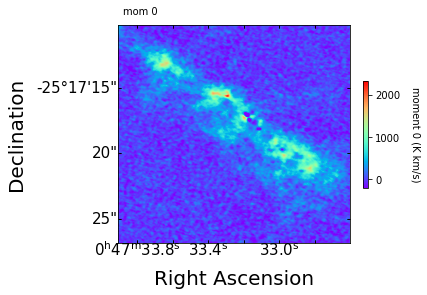

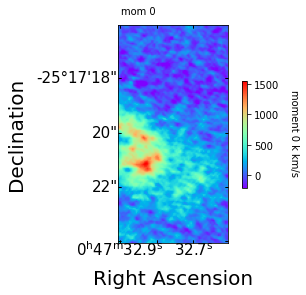


0.1839043346733 arcsec 0.250526942496108 arcsec
18.429196270990186 pix2


In [ ]:
#HCO+_J1-0

Num=0
Overlaps=0#4
Ram_Limiter=1#What percent of the cube my ram can handle
Name = "HCOp-J1_Dend_Abs"
name ="HCOp_J1_0_Countours_CM_DS_10_Abs.jpeg"


NameS = (Name+"Sigmas")
NameR = (Name+"Radii")
RNames[Num] = NameR
SNames[Num] = NameS
np.save("RNames",RNames)
np.save("SNames",SNames)
print(NameS)
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
path = paths[Num]
#path='HCOp_J1-0.cube.fits'
print(path)
Confidences = np.load('Confidence_data.npy')

Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True

Q = Qp.to(u.K).spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)

sc = Q.unmasked_copy()
#scQ = Q
scW = sc.wcs[:][:][0]
print(Confidences[0],Confidences.shape,sc.hdu.data.shape,Q[0][0][0])
BP = np.where(Confidences<Overlaps)#Overlaps)
del Confidences
sc.hdu.data[BP]=np.nan
print(sc.hdu.data[BP])
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc))
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
#scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

scW = scn.wcs[:][:][0]
#scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]


#Cubes with little dense gas and abs
AbpRAD1 = SkyCoord('00h47m32.9s', '-25d17m24.0s', frame='icrs')
AbpRAD2 = SkyCoord('00h47m32.6s', '-25d17m16.0s', frame='icrs')


Abp1 = [int(scW.world_to_pixel(AbpRAD1)[0]),int(scW.world_to_pixel(AbpRAD1)[1])]
Abp2 = [int(scW.world_to_pixel(AbpRAD2)[0]),int(scW.world_to_pixel(AbpRAD2)[1])]


SCNA = scn[5:np.shape(scn)[0]-5,Abp1[1]:Abp2[1],Abp1[0]:Abp2[0]]
datna = SCNA.hdu.data 
print(np.shape(SCNA))
scWCS = scF.wcs[:][:][0]
scWCSNA = SCNA.wcs[:][:][0]
moment_0_subNA  = SCNA.moment(order=0,how='slice')            # Calculate the Moment 0 map 
moment_0_sub  = scF.moment(order=0,how='slice')            # Calculate the Moment 0 map 
######Moment 0 for both
ax3 = pylab.subplot(1,1,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,vmin=-200,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=1)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.016,pad=0.04)                                     
cb.set_label(label='moment 0 (K km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='mom 0',fontsize=10,xy=(0.02,1.05),xycoords="axes fraction")  

pylab.show()


ax4 = pylab.subplot(1,1,1,projection=scWCSNA) 
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4 = pylab.imshow(moment_0_subNA.hdu.data,vmin=-200,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=1)
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.016,pad=0.04)                                     
cb.set_label(label='moment 0 k km/s ',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='mom 0',fontsize=10,xy=(0.02,1.05),xycoords="axes fraction")  

pylab.show()




#Unload all the unimportant vars

del BP
del paths


header = scF.hdu.header
print()
#make metadata for the dendrogram
metadata = {}
try:
    metadata['wavelength'] = header["RESTFREQ"]*u.Hz#
except:
    metadata['wavelength'] = header["RESTFRQ"]*u.Hz#
metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix_y'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['arc_per_pix_x'] =  abs(header["CDELT2"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x'] 
area_res = abs(header["CDELT1"])*abs(header["CDELT2"])*(np.pi/180*3.5)**2#mpc^2/pix^2


print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc
metadata["vaxis"]=0

d = astrodendro.Dendrogram.compute(datn,min_delta=m*3,min_value=m*5,min_npix=50) #The main culprit
dNA = astrodendro.Dendrogram.compute(datna,min_value=m*5,min_delta=m*3,min_npix=50) #The main culprit



##Analyze dendograms
print(np.shape(d),np.shape(dNA))

v = d.viewer()
v.show()
p=d.plotter()

v = dNA.viewer()
v.show()
p=dNA.plotter()

fig = plt.figure(1,figsize=(30,30))


pc_per_pixel = abs(header["CDELT1"])/180*np.pi*metadata['distance']/u.Mpc

sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
radsL=np.array([])
radsB=np.array([])
sigmasL=np.array([])
sigmasB=np.array([])

for t in d.all_structures: 
    
    I = t.indices()
    Cont = True
    try:
        #print(str(t.descendants[0]).find("branch"))
        #print(str(t.descendants[0]))
        if(str(t.descendants[0]).find("branch") != -1):
            Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
    except:
        lop=12
    
    if(Cont):
        s = PPVStatistic(t,metadata=metadata)
        nproj_pix=len(set(zip(*tuple(I[i] for i in [1,2]))))
        vel,RA,Dec = scF.world[:,0,0]
        v_IWM = np.nansum(datn[I]*vel[I[0]]/u.km*u.s)/np.nansum(datn[I])
        sig_Sh = np.sqrt(np.nansum(datn[I]*(vel[I[0]]/u.km*u.s-v_IWM)**2)/np.nansum(datn[I])) 
        
        
        #if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>np.sqrt(NBars[0])*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 4):
        #if(s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3):
        #print(((np.sqrt(nproj_pix/np.pi))),np.sqrt(NBars[0]))
        #print(((np.sqrt(nproj_pix*(pc_per_pixel)**2/np.pi)))*10**6*u.pix)
        if(sig_Sh>metadata["velocity_scale"]*u.s/u.km and ((np.sqrt(nproj_pix/np.pi)))>np.sqrt(beam_area_ratio)/u.pix and ((np.sqrt(nproj_pix*area_res/np.pi)))*10**6 <24):
            s = PPVStatistic(t,metadata=metadata)



            '''
            if(t.is_leaf):
                radsL=np.append(radsL,(float(s.radius*pc_per_pixel/u.pix))) #convert pixel to pc (then make it dimensionless)
                sigmasL=np.append(sigmasL,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)
            if(t.is_branch	):
                radsB=np.append(radsB,(float(s.radius*pc_per_pixel/u.pix))) #convert pixel to pc (then make it dimensionless)
                sigmasB=np.append(sigmasB,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)

            '''

            if(t.is_leaf):
                radsL=np.append(radsL,(float(np.sqrt(nproj_pix*(area_res)/np.pi)))) #define size as shetty does
                sigmasL=np.append(sigmasL,(float(sig_Sh)))#
                
            if(t.is_branch	):
                radsB=np.append(radsB,(float(np.sqrt(nproj_pix*(area_res)/np.pi))))
                sigmasB=np.append(sigmasB,(float(sig_Sh)))#
            

radsLNA=np.array([])
radsBNA=np.array([])
sigmasLNA=np.array([])
sigmasBNA=np.array([])

for t in dNA.all_structures: 
    
    I = t.indices()
    Cont = True
    try:
        #print(str(t.descendants[0]).find("branch"))
        #print(str(t.descendants[0]))
        if(str(t.descendants[0]).find("branch") != -1):
            Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
    except:
        lop=12
    
    if(Cont):
        s = PPVStatistic(t,metadata=metadata)
        nproj_pix=len(set(zip(*tuple(I[i] for i in [1,2]))))
        vel,RA,Dec = SCNA.world[:,0,0]
        v_IWM = np.nansum(datna[I]*vel[I[0]]/u.km*u.s)/np.nansum(datna[I])
        sig_Sh = np.sqrt(np.nansum(datna[I]*(vel[I[0]]/u.km*u.s-v_IWM)**2)/np.nansum(datna[I])) 
        
        
        #if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>np.sqrt(NBars[0])*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 4):
        #if(s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3):
        #print(((np.sqrt(nproj_pix/np.pi))),np.sqrt(NBars[0]))
        #print(((np.sqrt(nproj_pix*(pc_per_pixel)**2/np.pi)))*10**6*u.pix)
        if(sig_Sh>metadata["velocity_scale"]*u.s/u.km and ((np.sqrt(nproj_pix/np.pi)))>np.sqrt(beam_area_ratio)/u.pix and ((np.sqrt(nproj_pix*area_res/np.pi)))*10**6 <24):
            s = PPVStatistic(t,metadata=metadata)



            '''
            if(t.is_leaf):
                radsL=np.append(radsL,(float(s.radius*pc_per_pixel/u.pix))) #convert pixel to pc (then make it dimensionless)
                sigmasL=np.append(sigmasL,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)
            if(t.is_branch	):
                radsB=np.append(radsB,(float(s.radius*pc_per_pixel/u.pix))) #convert pixel to pc (then make it dimensionless)
                sigmasB=np.append(sigmasB,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)

            '''

            if(t.is_leaf):
                radsLNA=np.append(radsLNA,(float(np.sqrt(nproj_pix*(area_res)/np.pi)))) #define size as shetty does
                sigmasLNA=np.append(sigmasLNA,(float(sig_Sh)))#
                
            if(t.is_branch	):
                radsBNA=np.append(radsBNA,(float(np.sqrt(nproj_pix*(area_res)/np.pi))))
                sigmasBNA=np.append(sigmasBNA,(float(sig_Sh)))#
            

            
            

from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, radsL*10**6, sigmasL)
except:
    popt, pcov = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
try:
    poptB, pcovB = curve_fit(func, radsB*10**6, sigmasB)
except:
    poptB, pcovB = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]


    
    
    
    
Rcon = np.concatenate((radsL,radsB))
Scon = np.concatenate((sigmasL,sigmasB))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)


RconNA = np.concatenate((radsLNA,radsBNA))
SconNA = np.concatenate((sigmasLNA,sigmasBNA))
print(np.shape(RconNA))
poptConNA, pcovConNA = curve_fit(func, RconNA*10**6, SconNA)


print(popt,pcov,"leaves:")
print("a = ",popt[0],"+-",np.sqrt(pcov[0][0]))
print("b = ",popt[1],"+-",np.sqrt(pcov[1][1]))
print(poptB,pcovB,"branches:")
print("a = ",poptB[0],"+-",np.sqrt(pcovB[0][0]))
print("b = ",poptB[1],"+-",np.sqrt(pcovB[1][1]))
print(poptCon,pcovCon,"All_structures:")
print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))

fig = plt.figure()
xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])

xsNA = np.linspace(np.nanmin(RconNA*10**6),np.nanmax(RconNA*10**6),50)
ysNA = func(xsNA,poptConNA[0],poptConNA[1])


ax2 = pylab.subplot(2, 1, 2)
xpL,xpB,xpcon = ax2.scatter(radsL*10**6,sigmasL),ax2.scatter(radsB*10**6,sigmasB),ax2.scatter(Rcon*10**6,Scon,label="All_structures")
p,p2,p3 = ax2.plot(xs,ysL),ax2.plot(xs,ysB),ax2.plot(xs,ysCon)

pNA = ax2.plot(xsNA,ysNA)
xpNA = ax2.scatter(RconNA*10**6,SconNA,label="All_structures No abs")

ax2.set_yscale('log')
ax2.set_xscale('log')
plt.xlabel("Size (pc)")
plt.ylabel("Sigma (km/s)")
pylab.show()

NameSL = (NameS+"_Leaves")
NameSB = (NameS+"_Branches")
NameRL = (NameR+"_Leaves")
NameRB = (NameR+"_Branches")

np.save(NameSL,sigmasL)
np.save(NameSB,sigmasB)
np.save(NameRL,radsL)
np.save(NameRB,radsB)

['HCOp-J1_Dend_AbsRadii' 'HCN-J1_Dend_AbsRadii' 'H13CN-J1_AbsRadii'
 'CO 3-2_AbsRadii' '5' 'H13COp_1_0_AbsRadii' '7' '8' '9' '10' '11'] ['HCOp-J1_Dend_AbsSigmas' 'HCN-J1_Dend_AbsSigmas' 'H13CN-J1_AbsSigmas'
 'CO 3-2_AbsSigmas' '5' 'H13COp_1_0_AbsSigmas' '7' '8' '9' '10' '11'] H13CN-J1_AbsRadii H13CN-J1_AbsSigmas
H13CN-J1_AbsSigmas
NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits
[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]] (252, 400, 488) (252, 400, 488)
[nan nan nan ... nan nan nan]
(252, 400, 488) (252, 400, 488)
0.193741553900124 arcsec 0.2583761863464 arcsec
20.02328153341261 pix2
(4,)


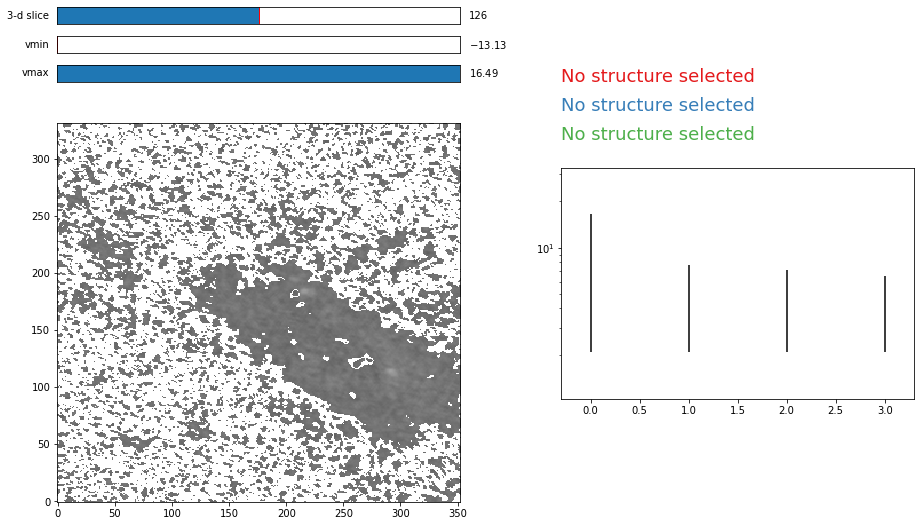

(4,)
[7.3989789  0.54916272] [[ 9.04030247 -0.68937719]
 [-0.68937719  0.05578613]] leaves:
a =  7.398978902883814 +- 3.006709574813196
b =  0.5491627186995954 +- 0.23619088519906775
[nan, nan] [[nan, nan], [nan, nan]] branches:
a =  nan +- nan
b =  nan +- nan
[7.3989789  0.54916272] [[ 9.04030247 -0.68937719]
 [-0.68937719  0.05578613]] All_structures:
a =  7.398978902883814 +- 3.006709574813196
b =  0.5491627186995954 +- 0.23619088519906775


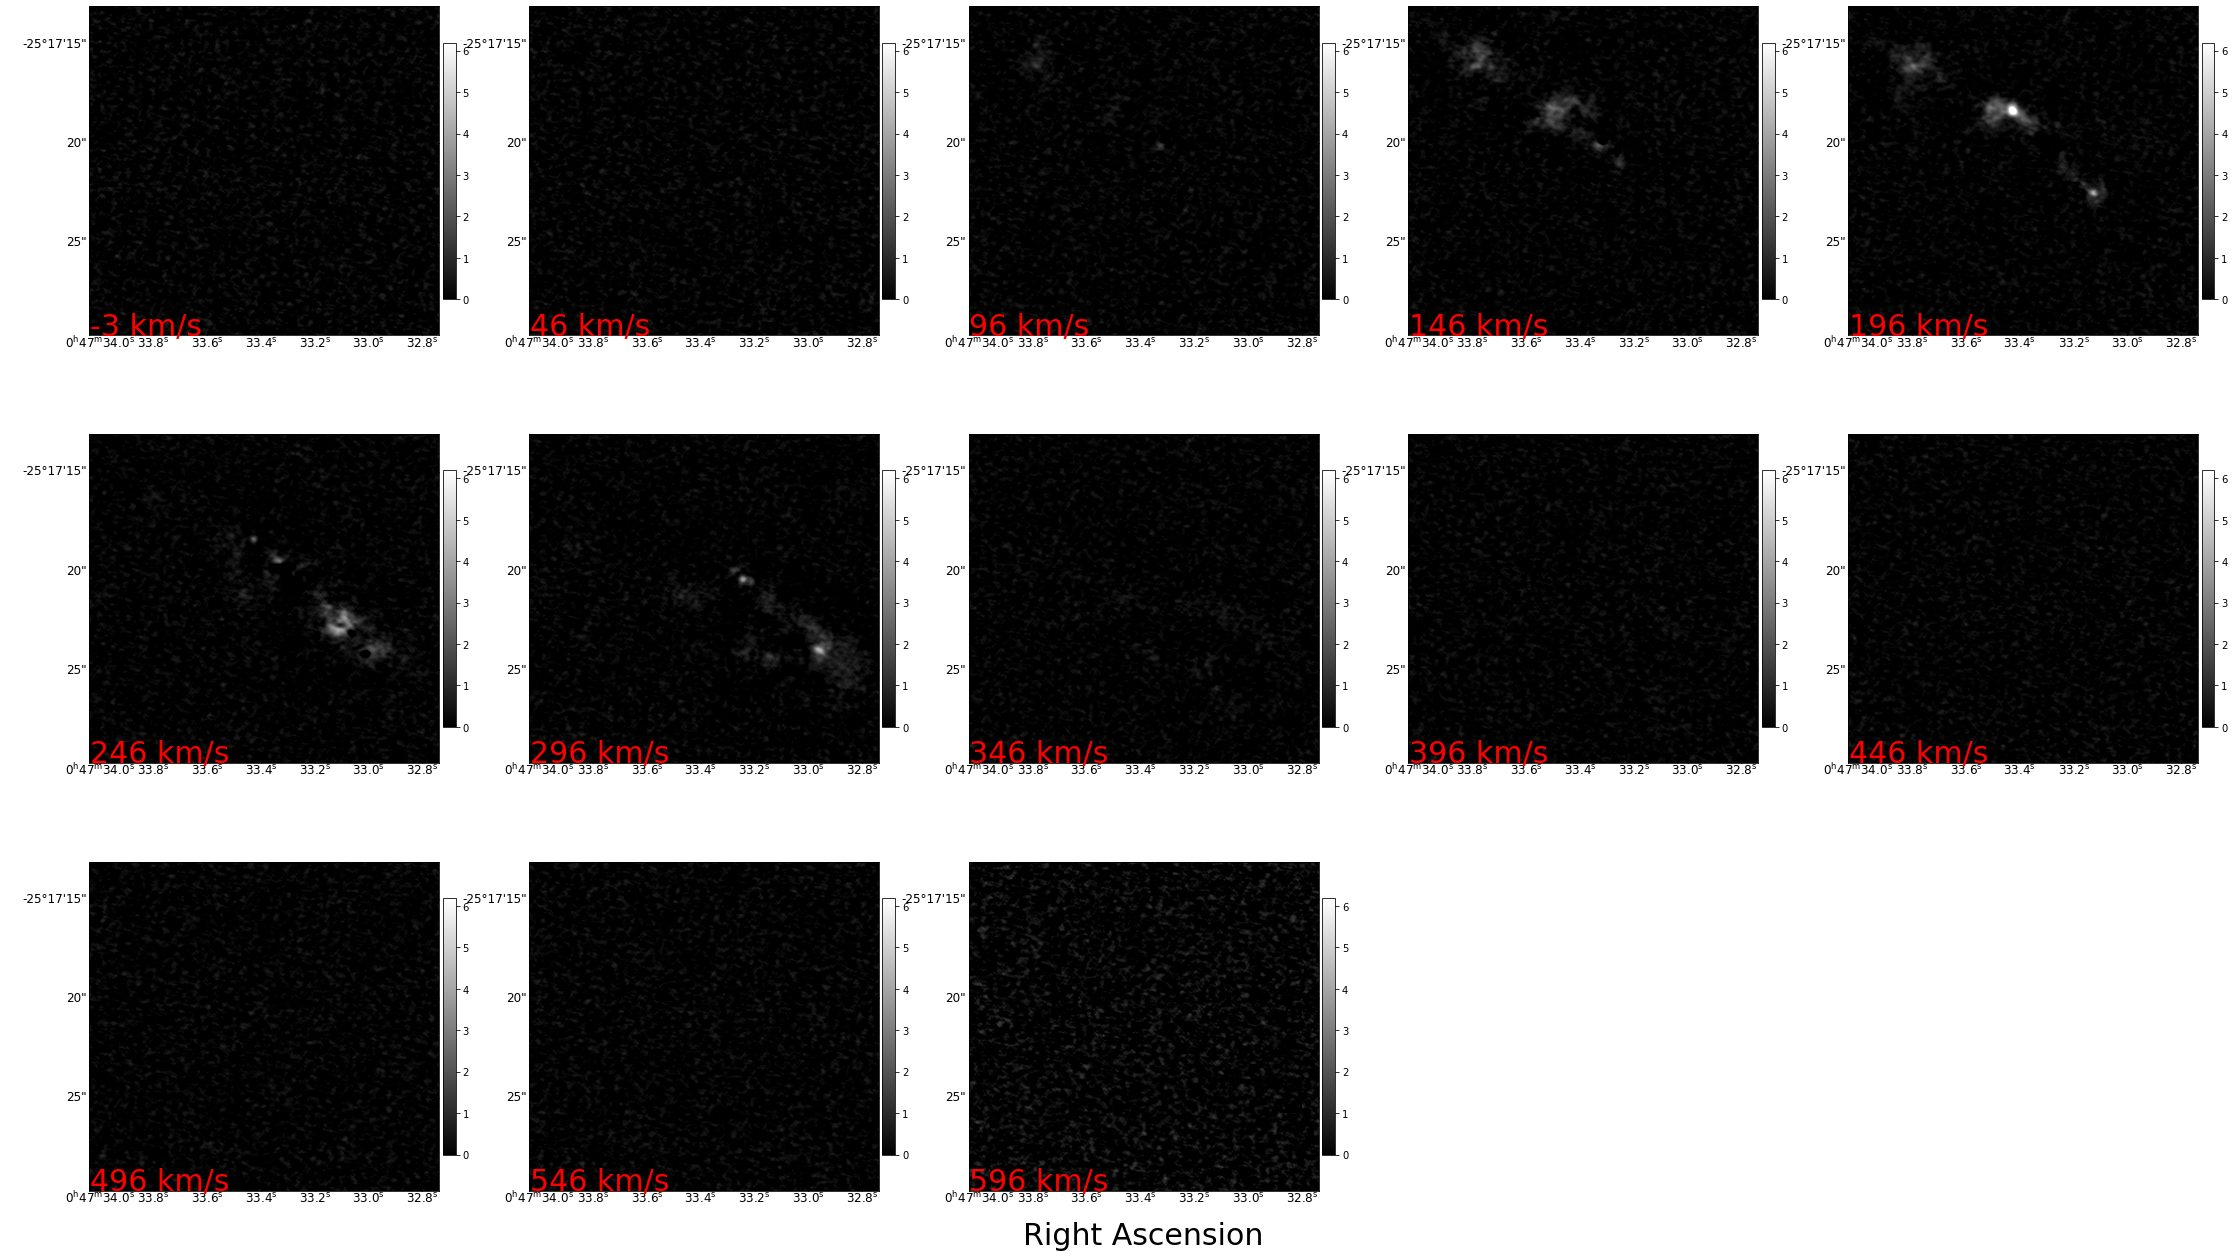

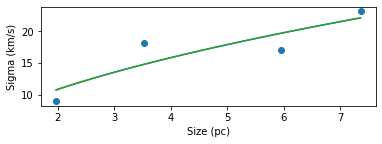

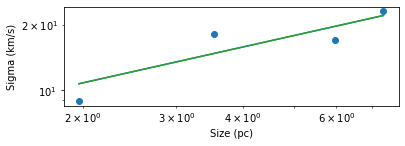

In [100]:
##### H13CN_J1-0

Num=2
Overlaps=1#4
Ram_Limiter=1#What percent of the cube my ram can handle
Name = "H13CN-J1_Abs"
name ="H13CN_J1_0_Countours_CM_Abs.jpeg"
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")
RNames=np.load('RNames.npy')
SNames=np.load('SNames.npy')

RNames[Num] = NameR
SNames[Num] = NameS
print(RNames,SNames,NameR,NameS)
np.save("RNames",RNames)
np.save("SNames",SNames)

print(NameS)
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
path = paths[Num]
print(path)
Confidences = np.load('Confidence_data.npy')
H13CN_MASK = np.load('H13CN_MASK_NGC.npy')
Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True

Q = Qp.to(u.K).spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)

sc = Q.unmasked_copy()
scQ = Q
scW = sc.wcs[:][:][0]
print(Confidences[0],Confidences.shape,sc.hdu.data.shape)
#BP = np.where(Confidences<Overlaps)#Overlaps)
BP = np.where(H13CN_MASK<1) #Mask where HCN is not found >1 sigma
del Confidences
sc.hdu.data[BP]=np.nan
print(sc.hdu.data[BP])
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc))
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

#cen_p1 = SkyCoord('00h47m33.6s', '-25d17m16.8s', frame='icrs')
#cen_p2 = SkyCoord('00h47m33.3s', '-25d17m14.2s', frame='icrs')

scW = scn.wcs[:][:][0]
scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
raQDP1 = [int(scQW.world_to_pixel(cen_p1)[0]),int(scQW.world_to_pixel(cen_p1)[1])]
raQDP2 = [int(scQW.world_to_pixel(cen_p2)[0]),int(scQW.world_to_pixel(cen_p2)[1])]
scQF = scQn[:,raQDP1[1]:raQDP2[1],raQDP1[0]:raQDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]
wcs = scF.wcs[:][:][0]
wcsQ = scQF.wcs[:][:][0]

#Unload all the unimportant vars

del BP
del paths
#make metadata for the dendrogram
header = fits.getheader(path)
metadata = {}
try:
    metadata['wavelength'] = header["RESTFREQ"]*u.Hz#
except:
    metadata['wavelength'] = header["RESTFRQ"]*u.Hz#
metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc
metadata["vaxis"]=0

d = astrodendro.Dendrogram.compute(datn,min_delta=m*5,min_value=m*4,min_npix=5*2) #The main culprit




##Analyze dendograms
print(np.shape(d))

v = d.viewer()
v.show()
p=d.plotter()
fig = plt.figure(1,figsize=(30,30))

scU = SpectralCube.read(path)  
scWU = scU.wcs[:][:][0]
raDP1U = [int(scWU.world_to_pixel(cen_p1)[0]),int(scWU.world_to_pixel(cen_p1)[1])]
raDP2U = [int(scWU.world_to_pixel(cen_p2)[0]),int(scWU.world_to_pixel(cen_p2)[1])]
scNU = scU[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),raDP1U[1]:raDP2U[1],raDP1U[0]:raDP2U[0]] # Make a subcube based on position
scWU = scNU.wcs[:][:][0]
#####
SC_KMSU = scNU.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMSU.allow_huge_operations=True
SC_K_KMSU = SC_KMSU.to(u.K)
SC_K_KMS_slabU = SC_K_KMSU.spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)  # Extract a subset of the velocities
ds=20
SC_CM = SC_K_KMS_slabU.downsample_axis(ds,axis=0) # Here we use downsampling to bin (average)the data # into coarse bins (broad channels) with width ~ 11 km/s    
vel, dec, ra = SC_CM.world[:,0,0]           # For plotting purposes, I want to know the average velocity

wcsU = SC_CM.wcs[:][:][0]
#Done making unmasked CM

noplot=False #produce plot of channel maps and contours? y/n

for n in np.arange(0,len(SC_CM.hdu.data)):   
    if(noplot):
        break
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(5,5,n+1,projection=sc.wcs[:][:][0]) # We plot them in a grid    
    im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*12)
    #print(np.shape(datn),np.shape(np.nanmean(datn[n:n+9],axis=0)))
    #im = pylab.imshow(np.nanmean(datn[n*ds:ds*n+ds-1],axis=0),cmap='gray',vmin=0,vmax=m*8)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(0,0,s="%i km/s"%(vel.value[n]),fontsize=30,c="Red") # Print the velocity of each averaged channel
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if n==len(SC_CM.hdu.data)-1:
        pylab.xlabel("Right Ascension",fontsize=30)
        pylab.ylabel("Declination",labelpad=-13,fontsize=30,rotation=90)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=6,h_pad=-0)
    
    for t in d.all_structures:
        
        I = t.indices()
        Cont = True
        try:
            #print(str(t.descendants[0]).find("branch"))
            #print(str(t.descendants[0]))
            if(str(t.descendants[0]).find("branch") != -1):
                Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
        except:
            lop=12

        if(Cont):
            s = PPVStatistic(t,metadata=metadata)
            #if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>np.sqrt(NBars[1])*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 4):
            if((True)):
                for lmn in range(np.nanmax(I[0])-np.nanmin(I[0])):
                    p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1,slice = lmn)
                #p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1)
                #print(n)
                #ellipse = s.to_mpl_ellipse(edgecolor='pink', facecolor='pink',alpha=.1)
                #ax.add_patch(ellipse)
                #print(t.indices())
                #break
if (noplot==False):
    fig.savefig(bbox_inches='tight',fname=name)

pc_per_pixel = metadata['arc_per_pix']/3600/180*np.pi/u.arcsec*metadata['distance']/u.Mpc

sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
radsL=np.array([])
radsB=np.array([])
sigmasL=np.array([])
sigmasB=np.array([])

for t in d.all_structures: 
    
    I = t.indices()
    Cont = True
    try:
        #print(str(t.descendants[0]).find("branch"))
        #print(str(t.descendants[0]))
        if(str(t.descendants[0]).find("branch") != -1):
            Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
    except:
        lop=12
    
    if(Cont):
        s = PPVStatistic(t,metadata=metadata)
        #if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>np.sqrt(NBars[2])*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 4):
        if(True):
        #if(s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3):







            if(t.is_leaf):
                radsL=np.append(radsL,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
                sigmasL=np.append(sigmasL,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)
            if(t.is_branch	):
                radsB=np.append(radsB,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
                sigmasB=np.append(sigmasB,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)



from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, radsL*10**6, sigmasL)
except:
    popt, pcov = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
try:
    poptB, pcovB = curve_fit(func, radsB*10**6, sigmasB)
except:
    poptB, pcovB = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]

Rcon = np.concatenate((radsL,radsB))
Scon = np.concatenate((sigmasL,sigmasB))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)
try:
    print(popt,pcov,"leaves:")
    print("a = ",popt[0],"+-",np.sqrt(pcov[0][0]))
    print("b = ",popt[1],"+-",np.sqrt(pcov[1][1]))
    print(poptB,pcovB,"branches:")
    print("a = ",poptB[0],"+-",np.sqrt(pcovB[0][0]))
    print("b = ",poptB[1],"+-",np.sqrt(pcovB[1][1]))
    print(poptCon,pcovCon,"All_structures:")
    print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
    print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))

    fig = plt.figure()
    ax = pylab.subplot(2, 1, 1)
    xpL,xpB = ax.scatter(radsL*10**6,sigmasL),ax.scatter(radsB*10**6,sigmasB)
    xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
    ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])
    xpa1,xpa2,xpaTot = ax.plot(xs,ysL),ax.plot(xs,ysB),ax.plot(xs,ysCon)
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()
    ax2 = pylab.subplot(2, 1, 2)
    xpL,xpB = ax2.scatter(radsL*10**6,sigmasL),ax2.scatter(radsB*10**6,sigmasB)
    p,p2,p3 = ax2.plot(xs,ysL),ax2.plot(xs,ysB),ax2.plot(xs,ysCon)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()

except:
    
    print("Not Enough Well-Defined Structures")
NameSL = (NameS+"_Leaves")
NameSB = (NameS+"_Branches")
NameRL = (NameR+"_Leaves")
NameRB = (NameR+"_Branches")

np.save(NameSL,sigmasL)
np.save(NameSB,sigmasB)
np.save(NameRL,radsL)
np.save(NameRB,radsB)

['HCOp-J1_Dend_AbsRadii' 'HCN-J1_Dend_AbsRadii' 'H13CN-J1_AbsRadii'
 'CO 3-2_AbsRadii' '5' 'H13COp_1_0_AbsRadii' '7' '8' '9' '10' '11'] ['HCOp-J1_Dend_AbsSigmas' 'HCN-J1_Dend_AbsSigmas' 'H13CN-J1_AbsSigmas'
 'CO 3-2_AbsSigmas' '5' 'H13COp_1_0_AbsSigmas' '7' '8' '9' '10' '11'] HCN-J1_Dend_AbsRadii HCN-J1_Dend_AbsSigmas
HCN-J1_Dend_AbsSigmas
NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits
[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]] (252, 400, 488) (252, 400, 488)
[]
(252, 400, 488) (252, 400, 488)
0.18478998038289599 arcsec 0.25165309832820004 arcsec
18.601188441342256 pix2
(63,)


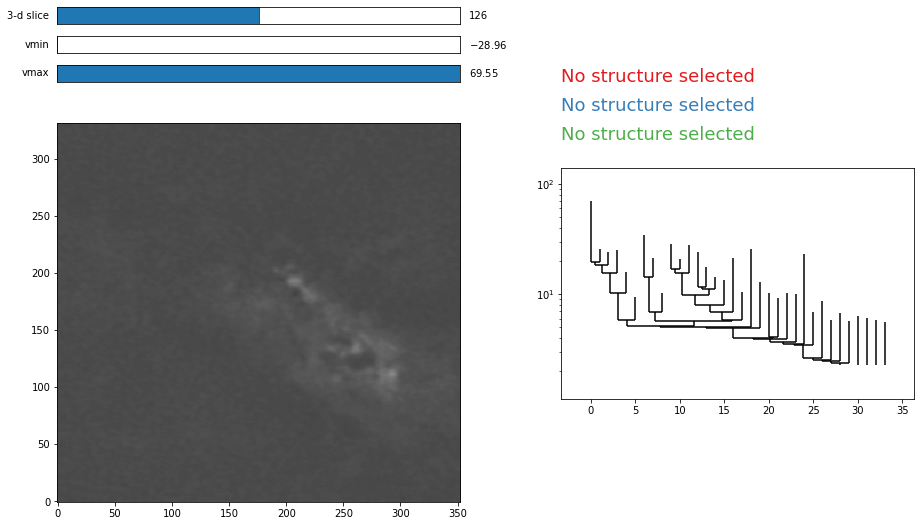

(48,)
[6.9569825  0.56227647] [[ 1.20945794 -0.10686313]
 [-0.10686313  0.01132625]] leaves:
a =  6.956982501661022 +- 1.0997535816851602
b =  0.5622764680023693 +- 0.10642484322596296
[6.73365592 0.63683275] [[ 0.72999614 -0.03448496]
 [-0.03448496  0.00170292]] branches:
a =  6.733655923008397 +- 0.8543981128080717
b =  0.6368327505159203 +- 0.041266455880555226
[6.32884195 0.65351561] [[ 0.30269419 -0.01624661]
 [-0.01624661  0.00098586]] All_structures:
a =  6.328841947493668 +- 0.5501765048194177
b =  0.6535156107323997 +- 0.03139834061396956


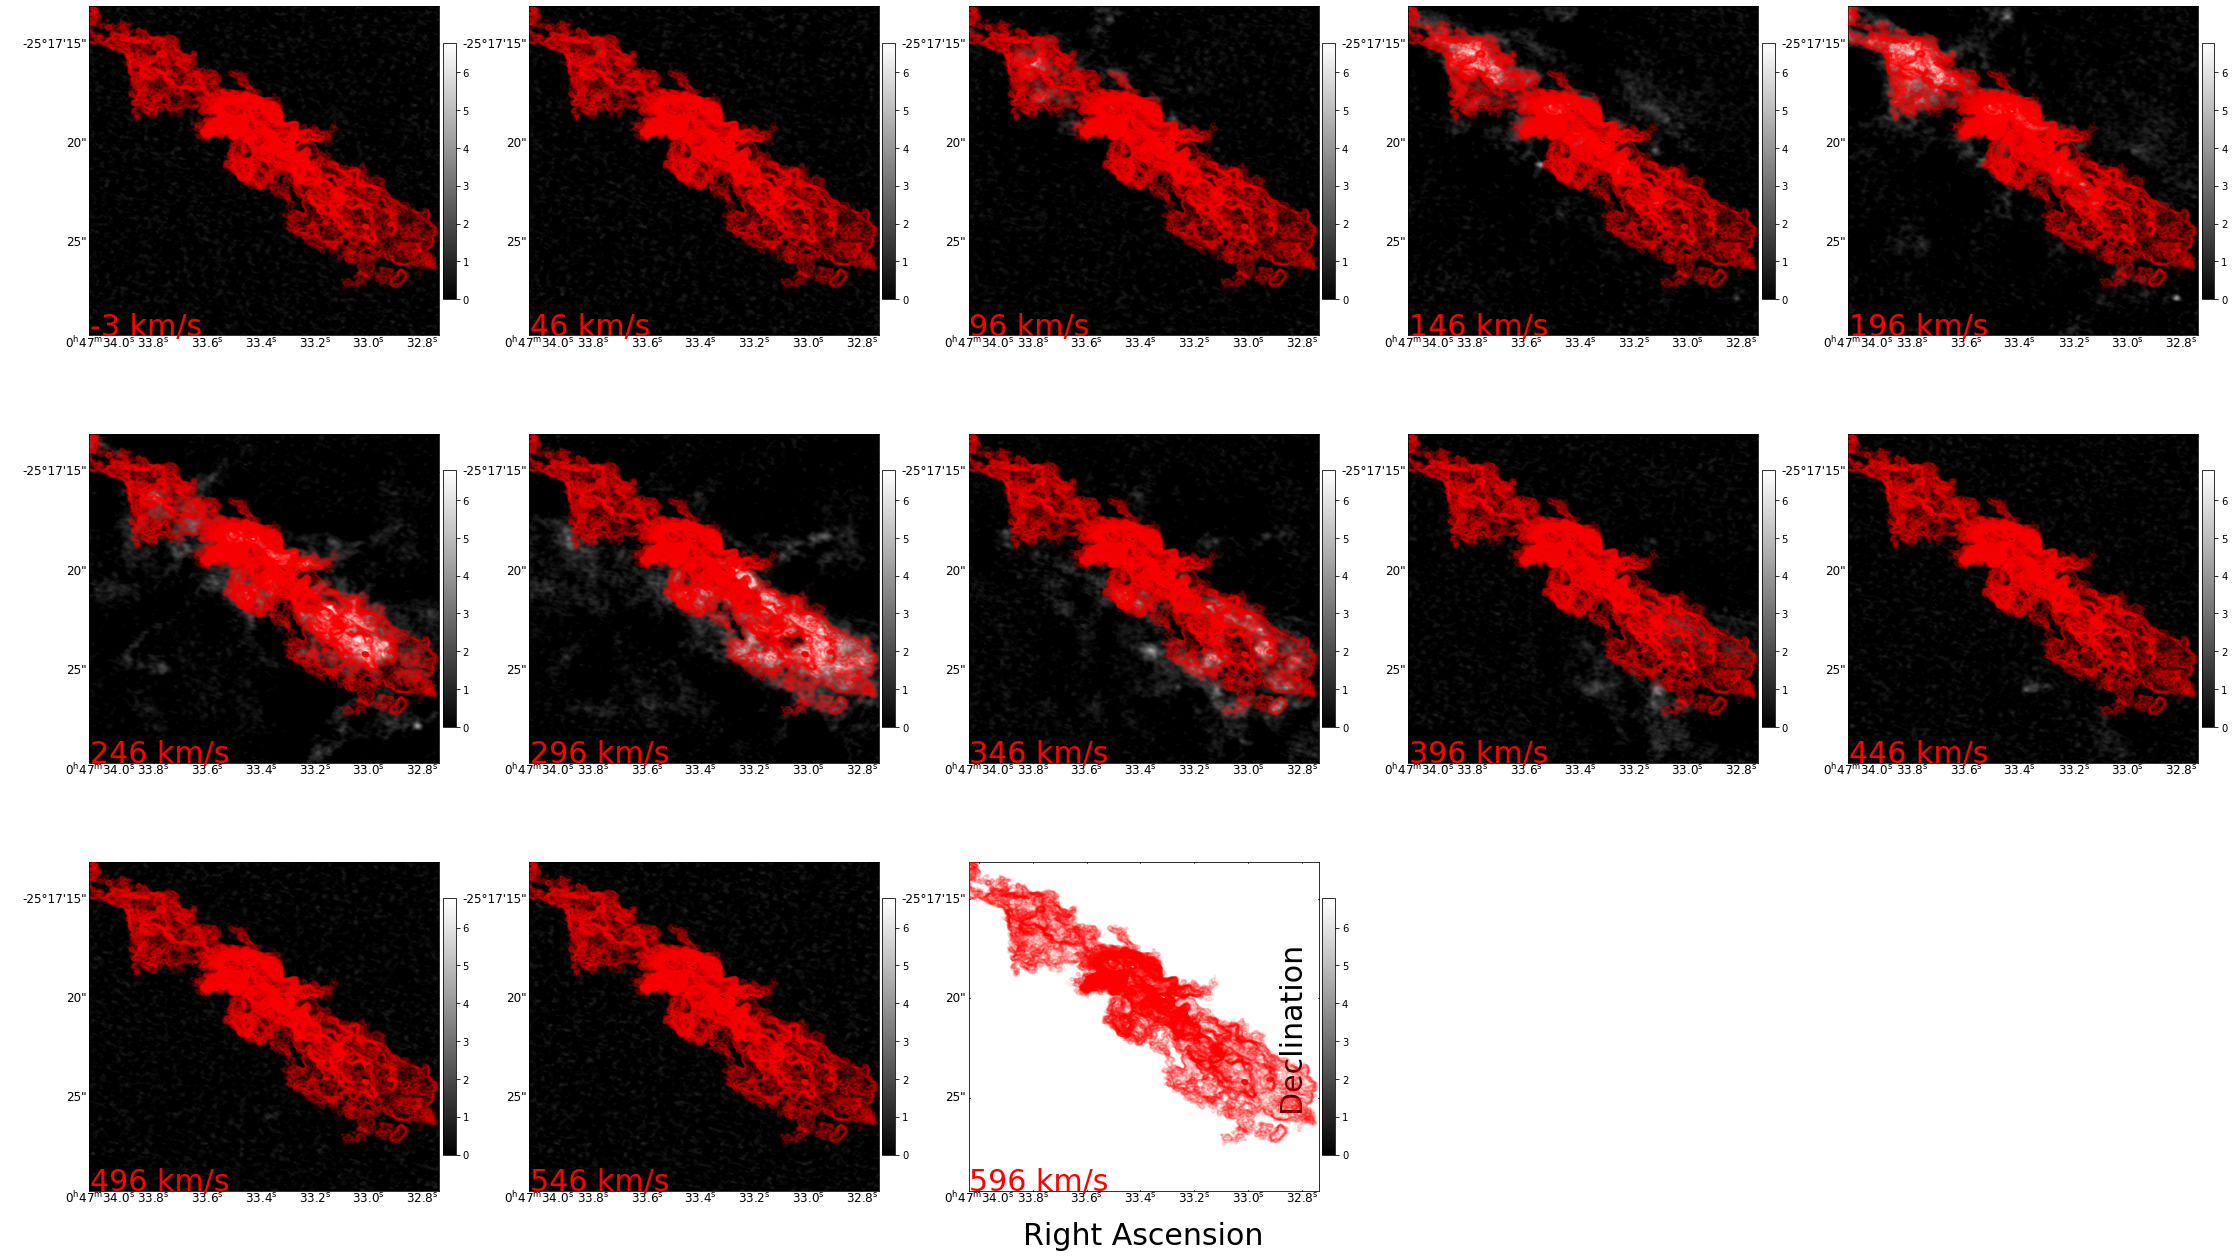

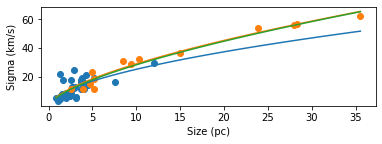

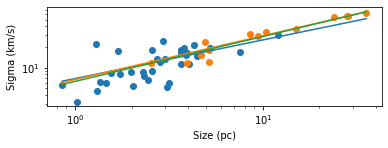

In [101]:
##### HCN_J1-0

Num=1
Overlaps=0#4
Ram_Limiter=1#What percent of the cube my ram can handle
Name = "HCN-J1_Dend_Abs"
name ="HCN_J1_0_Countours_CM_Abs.jpeg"
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")
RNames=np.load('RNames.npy')
SNames=np.load('SNames.npy')

RNames[Num] = NameR
SNames[Num] = NameS
print(RNames,SNames,NameR,NameS)
np.save("RNames",RNames)
np.save("SNames",SNames)

print(NameS)
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
path = paths[Num]
print(path)
Confidences = np.load('Confidence_data.npy')
H13CN_MASK = np.load('H13CN_MASK_NGC.npy')
Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True

Q = Qp.to(u.K).spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)
 
sc = Q.unmasked_copy()
scQ = Q
scW = sc.wcs[:][:][0]
print(Confidences[0],Confidences.shape,sc.hdu.data.shape)
BP = np.where(Confidences<Overlaps)#Overlaps)
del Confidences
sc.hdu.data[BP]=np.nan
print(sc.hdu.data[BP])
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc))
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

#cen_p1 = SkyCoord('00h47m33.6s', '-25d17m16.8s', frame='icrs')
#cen_p2 = SkyCoord('00h47m33.3s', '-25d17m14.2s', frame='icrs')

scW = scn.wcs[:][:][0]
scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
raQDP1 = [int(scQW.world_to_pixel(cen_p1)[0]),int(scQW.world_to_pixel(cen_p1)[1])]
raQDP2 = [int(scQW.world_to_pixel(cen_p2)[0]),int(scQW.world_to_pixel(cen_p2)[1])]
scQF = scQn[:,raQDP1[1]:raQDP2[1],raQDP1[0]:raQDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]
wcs = scF.wcs[:][:][0]
wcsQ = scQF.wcs[:][:][0]

#Unload all the unimportant vars

del BP
del paths
#make metadata for the dendrogram
header = fits.getheader(path)
metadata = {}
try:
    metadata['wavelength'] = header["RESTFREQ"]*u.Hz#
except:
    metadata['wavelength'] = header["RESTFRQ"]*u.Hz#
metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc
metadata["vaxis"]=0

d = astrodendro.Dendrogram.compute(datn,min_delta=m*5,min_value=m*4,min_npix=5*2) #The main culprit




##Analyze dendograms
print(np.shape(d))

v = d.viewer()
v.show()
p=d.plotter()
fig = plt.figure(1,figsize=(30,30))

scU = SpectralCube.read(path)  
scWU = scU.wcs[:][:][0]
raDP1U = [int(scWU.world_to_pixel(cen_p1)[0]),int(scWU.world_to_pixel(cen_p1)[1])]
raDP2U = [int(scWU.world_to_pixel(cen_p2)[0]),int(scWU.world_to_pixel(cen_p2)[1])]
scNU = scU[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),raDP1U[1]:raDP2U[1],raDP1U[0]:raDP2U[0]] # Make a subcube based on position
scWU = scNU.wcs[:][:][0]
#####
SC_KMSU = scNU.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMSU.allow_huge_operations=True
SC_K_KMSU = SC_KMSU.to(u.K)
SC_K_KMS_slabU = SC_K_KMSU.spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)  # Extract a subset of the velocities
ds=20
SC_CM = SC_K_KMS_slabU.downsample_axis(ds,axis=0) # Here we use downsampling to bin (average)the data # into coarse bins (broad channels) with width ~ 11 km/s    
vel, dec, ra = SC_CM.world[:,0,0]           # For plotting purposes, I want to know the average velocity

wcsU = SC_CM.wcs[:][:][0]
#Done making unmasked CM

noplot=False #produce plot of channel maps and contours? y/n

for n in np.arange(0,len(SC_CM.hdu.data)):   
    if(noplot):
        break
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(5,5,n+1,projection=sc.wcs[:][:][0]) # We plot them in a grid    
    im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*12)
    #print(np.shape(datn),np.shape(np.nanmean(datn[n:n+9],axis=0)))
    #im = pylab.imshow(np.nanmean(datn[n*ds:ds*n+ds-1],axis=0),cmap='gray',vmin=0,vmax=m*8)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(0,0,s="%i km/s"%(vel.value[n]),fontsize=30,c="Red") # Print the velocity of each averaged channel
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if n==len(SC_CM.hdu.data)-1:
        pylab.xlabel("Right Ascension",fontsize=30)
        pylab.ylabel("Declination",labelpad=-13,fontsize=30,rotation=90)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=6,h_pad=-0)
    
    for t in d.all_structures:
        
        I = t.indices()
        Cont = True
        try:
            #print(str(t.descendants[0]).find("branch"))
            #print(str(t.descendants[0]))
            if(str(t.descendants[0]).find("branch") != -1):
                Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
        except:
            lop=12

        if(Cont):
            s = PPVStatistic(t,metadata=metadata)
            #if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>np.sqrt(NBars[1])*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 4):
            if((True)):
                for lmn in range(np.nanmax(I[0])-np.nanmin(I[0])):
                    p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1,slice = lmn)
                #p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1)
                #print(n)
                #ellipse = s.to_mpl_ellipse(edgecolor='pink', facecolor='pink',alpha=.1)
                #ax.add_patch(ellipse)
                #print(t.indices())
                #break
if (noplot==False):
    fig.savefig(bbox_inches='tight',fname=name)

pc_per_pixel = metadata['arc_per_pix']/3600/180*np.pi/u.arcsec*metadata['distance']/u.Mpc

sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
radsL=np.array([])
radsB=np.array([])
sigmasL=np.array([])
sigmasB=np.array([])

for t in d.all_structures: 
    
    I = t.indices()
    Cont = True
    try:
        #print(str(t.descendants[0]).find("branch"))
        #print(str(t.descendants[0]))
        if(str(t.descendants[0]).find("branch") != -1):
            Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
    except:
        lop=12
    
    if(Cont):
        s = PPVStatistic(t,metadata=metadata)
        #if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>4.8*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 4):
        if(True):
        #if(s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3):







            if(t.is_leaf):
                radsL=np.append(radsL,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
                sigmasL=np.append(sigmasL,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)
            if(t.is_branch	):
                radsB=np.append(radsB,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
                sigmasB=np.append(sigmasB,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)



from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, radsL*10**6, sigmasL)
except:
    popt, pcov = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
try:
    poptB, pcovB = curve_fit(func, radsB*10**6, sigmasB)
except:
    poptB, pcovB = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]

Rcon = np.concatenate((radsL,radsB))
Scon = np.concatenate((sigmasL,sigmasB))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)
try:
    print(popt,pcov,"leaves:")
    print("a = ",popt[0],"+-",np.sqrt(pcov[0][0]))
    print("b = ",popt[1],"+-",np.sqrt(pcov[1][1]))
    print(poptB,pcovB,"branches:")
    print("a = ",poptB[0],"+-",np.sqrt(pcovB[0][0]))
    print("b = ",poptB[1],"+-",np.sqrt(pcovB[1][1]))
    print(poptCon,pcovCon,"All_structures:")
    print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
    print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))

    fig = plt.figure()
    ax = pylab.subplot(2, 1, 1)
    xpL,xpB = ax.scatter(radsL*10**6,sigmasL),ax.scatter(radsB*10**6,sigmasB)
    xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
    ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])
    xpa1,xpa2,xpaTot = ax.plot(xs,ysL),ax.plot(xs,ysB),ax.plot(xs,ysCon)
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()
    ax2 = pylab.subplot(2, 1, 2)
    xpL,xpB = ax2.scatter(radsL*10**6,sigmasL),ax2.scatter(radsB*10**6,sigmasB)
    p,p2,p3 = ax2.plot(xs,ysL),ax2.plot(xs,ysB),ax2.plot(xs,ysCon)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()

except:
    
    print("Not Enough Well-Defined Structures")
NameSL = (NameS+"_Leaves")
NameSB = (NameS+"_Branches")
NameRL = (NameR+"_Leaves")
NameRB = (NameR+"_Branches")

np.save(NameSL,sigmasL)
np.save(NameSB,sigmasB)
np.save(NameRL,radsL)
np.save(NameRB,radsB)

In [ ]:
#SiO_J2-1


Num=4
Overlaps=1#4
Ram_Limiter=1#What percent of the cube my ram can handle
Name = "SiO_J2-1_Abs"
name = "SiO_J2_1_CM_Contours_DS_10_Abs.jpeg"
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")
RNames[Num] = NameR
SNames[Num] = NameS
np.save("RNames",RNames)
np.save("SNames",SNames)
print(NameS)
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
path = paths[Num]
print(path)
Confidences = np.load('Confidence_data.npy')

Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
#Make subcube
Q = SpectralCube.read(path)  
sc = Q.unmasked_copy()
scQ = Q
scW = sc.wcs[:][:][0]
print(Confidences[0],Confidences.shape,sc.hdu.data.shape)
BP = np.where(Confidences<Overlaps)#Overlaps)
del Confidences
sc.hdu.data[BP]=np.nan
print(sc.hdu.data[BP])
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc))
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

#cen_p1 = SkyCoord('00h47m33.6s', '-25d17m16.8s', frame='icrs')
#cen_p2 = SkyCoord('00h47m33.3s', '-25d17m14.2s', frame='icrs')

scW = scn.wcs[:][:][0]
scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
raQDP1 = [int(scQW.world_to_pixel(cen_p1)[0]),int(scQW.world_to_pixel(cen_p1)[1])]
raQDP2 = [int(scQW.world_to_pixel(cen_p2)[0]),int(scQW.world_to_pixel(cen_p2)[1])]
scQF = scQn[:,raQDP1[1]:raQDP2[1],raQDP1[0]:raQDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]
wcs = scF.wcs[:][:][0]
wcsQ = scQF.wcs[:][:][0]

#Unload all the unimportant vars

del BP
del paths


header = fits.getheader(path)

#make metadata for the dendrogram
metadata = {}
metadata['wavelength'] = header["RESTFRQ"]*u.Hz#
metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc


d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*5,min_npix=50) #The main culprit




vel,NA,na = sc.world[:,0,0]

##Analyze dendograms
print(np.shape(d))

v = d.viewer()
v.show()
p=d.plotter()
fig = plt.figure(1,figsize=(30,30))

scU = SpectralCube.read(path)  
scWU = scU.wcs[:][:][0]
raDP1U = [int(scWU.world_to_pixel(cen_p1)[0]),int(scWU.world_to_pixel(cen_p1)[1])]
raDP2U = [int(scWU.world_to_pixel(cen_p2)[0]),int(scWU.world_to_pixel(cen_p2)[1])]
scNU = scU[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),raDP1U[1]:raDP2U[1],raDP1U[0]:raDP2U[0]] # Make a subcube based on position
scWU = scNU.wcs[:][:][0]
#####
SC_KMSU = scNU.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMSU.allow_huge_operations=True
SC_K_KMSU = SC_KMSU.to(u.K)
SC_K_KMS_slabU = SC_K_KMSU.spectral_slab(-888. *u.km / u.s, 888. *u.km / u.s)  # Extract a subset of the velocities
ds=20
SC_CM = SC_K_KMS_slabU.downsample_axis(ds,axis=0) # Here we use downsampling to bin (average)the data # into coarse bins (broad channels) with width ~ 11 km/s    
vel, dec, ra = SC_CM.world[:,0,0]           # For plotting purposes, I want to know the average velocity
wcsU = SC_CM.wcs[:][:][0]
#Done making unmasked CM

noplot=True #produce plot of channel maps and contours? y/n

for n in np.arange(0,len(SC_CM.hdu.data)):   
    if(noplot):
        break
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(5,5,n+1,projection=sc.wcs[:][:][0]) # We plot them in a grid    
    im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*8)
    #print(np.shape(datn),np.shape(np.nanmean(datn[n:n+9],axis=0)))
    #im = pylab.imshow(np.nanmean(datn[n*ds:ds*n+ds-1],axis=0),cmap='gray',vmin=0,vmax=m*8)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(0,0,s="%i km/s"%(vel.value[n]),fontsize=30,c="Red") # Print the velocity of each averaged channel
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if n==len(SC_CM.hdu.data)-1:
        pylab.xlabel("Right Ascension",fontsize=30)
        pylab.ylabel("Declination",labelpad=-13,fontsize=30,rotation=90)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=6,h_pad=-0)
    
    for t in d.all_structures:
        
        I = t.indices()
        s = PPVStatistic(t,metadata=metadata)
        if(s.v_rms>1*u.pix and s.radius>1*u.pix and  s.radius<24*2*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
            k=0
            for ll in range(len(I[0])):
                if(I[0][ll] - int((n+.5)*ds) ==0):
                    k=int((n+.5)*ds)
                    break
            for ll in range(len(I[0])):
                if(k==int((n+.5)*ds)  and n!= 0):
                    break
                miN=3
                if(abs(I[0][ll] - int((n+.5)*ds)) <miN):
                    k=I[0][ll]
                    break
            if(k!=0):
                p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1,slice = k)
                ellipse = s.to_mpl_ellipse(edgecolor='pink', facecolor='pink',alpha=.1)
                ax.add_patch(ellipse)
            #print(t.indices())
            #break
if (noplot==False):
    fig.savefig(bbox_inches='tight',fname=name)


rads=np.array([])
sigmas=np.array([])

pc_per_pixel = metadata['arc_per_pix']/3600/180*np.pi/u.arcsec*metadata['distance']/u.Mpc
sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
for t in d.all_structures: 
    
    I = t.indices()
    s = PPVStatistic(t,metadata=metadata)
        
    if(s.v_rms>1*u.pix and s.radius>1*u.pix and  s.radius<24*2*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
        rads=np.append(rads,(s.radius*pc_per_pixel)) #convert pixel to pc (then make it dimensionless)
        sigmas=np.append(sigmas,(s.v_rms*sig_per_pixel))#Convert pixel to velocity (then make it dimensionless)


from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)
popt, pcov = curve_fit(func, rads*10**6, sigmas)
print(popt,pcov)
print("a = ",popt[0],"+-",np.sqrt(pcov[0][0]))
print("b = ",popt[1],"+-",np.sqrt(pcov[1][1]))
fig = plt.figure()
ax = pylab.subplot(2, 1, 1)
xp1 = ax.scatter(rads*10**6,sigmas)
xs=np.linspace(np.nanmin(rads*10**6),np.nanmax(rads*10**6),50)
ys=func(xs,popt[0],popt[1])
xpa1 = ax.scatter(xs,ys)
plt.xlabel("Size (pc)")
plt.ylabel("Sigma (km/s)")
pylab.show()
ax2 = pylab.subplot(2, 1, 2)
xp = ax2.scatter(rads*10**6,sigmas)
p = ax2.plot(xs,ys,c='red')
ax2.set_yscale('log')
ax2.set_xscale('log')
plt.xlabel("Size (pc)")
plt.ylabel("Sigma (km/s)")
pylab.show()

np.save(NameS,sigmas)
np.save(NameR,rads)



['HCOp-J1_Dend_AbsRadii' '2' '3' 'CO 3-2_AbsRadii' '5' '6' '7' '8' '9'
 '10' '11'] ['HCOp-J1_Dend_AbsSigmas' '2' '3' 'CO 3-2_AbsSigmas' '5' '6' '7' '8' '9'
 '10' '11'] CO 3-2_AbsRadii CO 3-2_AbsSigmas
CO 3-2_AbsSigmas
ngc253_co32_hires_common.fits
[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]] (252, 400, 488) (81, 1536, 1800) 9.063807777998229e-09 K
[]
(81, 1536, 1800) (81, 1536, 1800)
0.174999999999996 arcsec 0.174999999999996 arcsec
26.492214532873252 pix2
(631,)


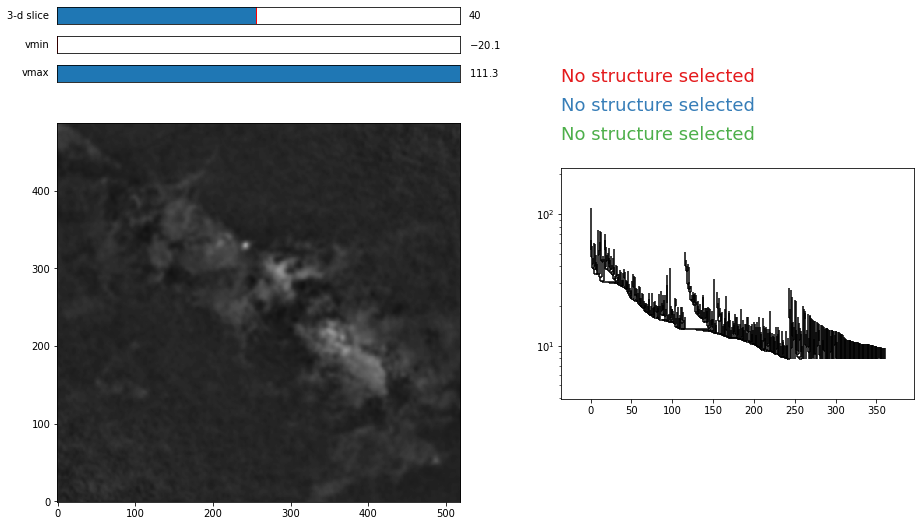

(303,)
[2.33217198 0.84427677] [[ 0.06868597 -0.01936731]
 [-0.01936731  0.00575992]] leaves:
a =  2.3321719783281383 +- 0.2620800861102125
b =  0.8442767664301899 +- 0.07589416503062477
[3.38018509 0.66759604] [[ 0.30222131 -0.03698275]
 [-0.03698275  0.00476656]] branches:
a =  3.380185094724366 +- 0.5497465854312215
b =  0.6675960354410573 +- 0.06904029162315505
[2.69076824 0.7580965 ] [[ 0.02932423 -0.00510365]
 [-0.00510365  0.00098847]] All_structures:
a =  2.6907682430427102 +- 0.17124320290494685
b =  0.7580965043747131 +- 0.03143986718312571


<Figure size 2160x2160 with 0 Axes>

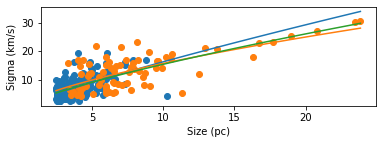

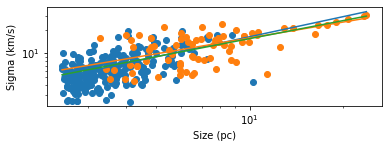

In [16]:
#CO 


Num=3
Overlaps=0#4
Ram_Limiter=1#What percent of the cube my ram can handle
Name = "CO 3-2_Abs"
name = "CO_3_2_CM_Contours_DS_10_Abs.jpeg"
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")
RNames=np.load('RNames.npy')
SNames=np.load('SNames.npy')

RNames[Num] = NameR
SNames[Num] = NameS
print(RNames,SNames,NameR,NameS)
np.save("RNames",RNames)
np.save("SNames",SNames)

print(NameS)
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
#path = paths[Num]
path = 'ngc253_co32_hires_common.fits'
print(path)
Confidences = np.load('Confidence_data.npy')
H13CN_MASK = np.load('H13CN_MASK_NGC.npy')
Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True

Q = Qp.to(u.K).spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)

sc = Q.unmasked_copy()
scQ = Q
scW = sc.wcs[:][:][0]
print(Confidences[0],Confidences.shape,sc.hdu.data.shape,Q[0][0][0])
BP = np.where(Confidences<Overlaps)#Overlaps)
del Confidences
sc.hdu.data[BP]=np.nan
print(sc.hdu.data[BP])
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc))
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

#cen_p1 = SkyCoord('00h47m33.6s', '-25d17m16.8s', frame='icrs')
#cen_p2 = SkyCoord('00h47m33.3s', '-25d17m14.2s', frame='icrs')

scW = scn.wcs[:][:][0]
scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
raQDP1 = [int(scQW.world_to_pixel(cen_p1)[0]),int(scQW.world_to_pixel(cen_p1)[1])]
raQDP2 = [int(scQW.world_to_pixel(cen_p2)[0]),int(scQW.world_to_pixel(cen_p2)[1])]
scQF = scQn[:,raQDP1[1]:raQDP2[1],raQDP1[0]:raQDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]
wcs = scF.wcs[:][:][0]
wcsQ = scQF.wcs[:][:][0]

#Unload all the unimportant vars

del BP
del paths


header = scQ.hdu.header

#make metadata for the dendrogram
metadata = {}
try:
    metadata['wavelength'] = header["RESTFREQ"]*u.Hz#
except:
    metadata['wavelength'] = header["RESTFRQ"]*u.Hz#
metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc
metadata["vaxis"]=0

d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*5,min_npix=50) #The main culprit




##Analyze dendograms
print(np.shape(d))

v = d.viewer()
v.show()
p=d.plotter()
fig = plt.figure(1,figsize=(30,30))

scU = SpectralCube.read(path)  
scWU = scU.wcs[:][:][0]
raDP1U = [int(scWU.world_to_pixel(cen_p1)[0]),int(scWU.world_to_pixel(cen_p1)[1])]
raDP2U = [int(scWU.world_to_pixel(cen_p2)[0]),int(scWU.world_to_pixel(cen_p2)[1])]
scNU = scU[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),raDP1U[1]:raDP2U[1],raDP1U[0]:raDP2U[0]] # Make a subcube based on position
scWU = scNU.wcs[:][:][0]
#####
SC_KMSU = scNU.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMSU.allow_huge_operations=True
SC_K_KMSU = SC_KMSU.to(u.K)
SC_K_KMS_slabU = SC_K_KMSU.spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)  # Extract a subset of the velocities
ds=20
SC_CM = SC_K_KMS_slabU.downsample_axis(ds,axis=0) # Here we use downsampling to bin (average)the data # into coarse bins (broad channels) with width ~ 11 km/s    
vel, dec, ra = SC_CM.world[:,0,0]           # For plotting purposes, I want to know the average velocity

wcsU = SC_CM.wcs[:][:][0]
#Done making unmasked CM

noplot=True #produce plot of channel maps and contours? y/n

for n in np.arange(0,len(SC_CM.hdu.data)):   
    if(noplot):
        break
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(5,5,n+1,projection=sc.wcs[:][:][0]) # We plot them in a grid    
    im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*12)
    #print(np.shape(datn),np.shape(np.nanmean(datn[n:n+9],axis=0)))
    #im = pylab.imshow(np.nanmean(datn[n*ds:ds*n+ds-1],axis=0),cmap='gray',vmin=0,vmax=m*8)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(0,0,s="%i km/s"%(vel.value[n]),fontsize=30,c="Red") # Print the velocity of each averaged channel
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if n==len(SC_CM.hdu.data)-1:
        pylab.xlabel("Right Ascension",fontsize=30)
        pylab.ylabel("Declination",labelpad=-13,fontsize=30,rotation=90)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=6,h_pad=-0)
    
    for t in d.all_structures:
        
        I = t.indices()
        Cont = True
        try:
            #print(str(t.descendants[0]).find("branch"))
            #print(str(t.descendants[0]))
            if(str(t.descendants[0]).find("branch") != -1):
                Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
        except:
            lop=12

        if(Cont):
            s = PPVStatistic(t,metadata=metadata)
            #if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>np.sqrt(NBars[1])*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 4):
            if((True)):
                for lmn in range(np.nanmax(I[0])-np.nanmin(I[0])):
                    p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1,slice = lmn)
                #p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1)
                #print(n)
                #ellipse = s.to_mpl_ellipse(edgecolor='pink', facecolor='pink',alpha=.1)
                #ax.add_patch(ellipse)
                #print(t.indices())
                #break
if (noplot==False):
    fig.savefig(bbox_inches='tight',fname=name)

pc_per_pixel = metadata['arc_per_pix']/3600/180*np.pi/u.arcsec*metadata['distance']/u.Mpc

sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
radsL=np.array([])
radsB=np.array([])
sigmasL=np.array([])
sigmasB=np.array([])

for t in d.all_structures: 
    
    I = t.indices()
    Cont = True
    try:
        #print(str(t.descendants[0]).find("branch"))
        #print(str(t.descendants[0]))
        if(str(t.descendants[0]).find("branch") != -1):
            Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
    except:
        lop=12
    
    if(Cont):
        s = PPVStatistic(t,metadata=metadata)
        nproj_pix=len(set(zip(*tuple(I[i] for i in [1,2]))))
        vel,RA,Dec = scF.world[:,0,0]
        v_IWM = np.nansum(datn[I]*vel[I[0]]/u.km*u.s)/np.nansum(datn[I])
        sig_Sh = np.sqrt(np.nansum(datn[I]*(vel[I[0]]/u.km*u.s-v_IWM)**2)/np.nansum(datn[I])) 
        
        
        #if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>np.sqrt(NBars[0])*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 4):
        #if(s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3):
        #print(((np.sqrt(nproj_pix/np.pi))),np.sqrt(NBars[0]))
        #print(((np.sqrt(nproj_pix*(pc_per_pixel)**2/np.pi)))*10**6*u.pix)
        if(sig_Sh>2 and ((np.sqrt(nproj_pix/np.pi)))>np.sqrt(NBars[0]) and ((np.sqrt(nproj_pix*(pc_per_pixel)**2/np.pi)))*10**6*u.pix <24):
            s = PPVStatistic(t,metadata=metadata)



         




            if(t.is_leaf):
                radsL=np.append(radsL,(float(np.sqrt(nproj_pix*(pc_per_pixel)**2/np.pi)*u.pix))) #define size as shetty does
                sigmasL=np.append(sigmasL,(float(sig_Sh)))#
                
            if(t.is_branch	):
                radsB=np.append(radsB,(float(np.sqrt(nproj_pix*(pc_per_pixel)**2/np.pi)*u.pix)))
                sigmasB=np.append(sigmasB,(float(sig_Sh)))#



from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, radsL*10**6, sigmasL)
except:
    popt, pcov = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
try:
    poptB, pcovB = curve_fit(func, radsB*10**6, sigmasB)
except:
    poptB, pcovB = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]

Rcon = np.concatenate((radsL,radsB))
Scon = np.concatenate((sigmasL,sigmasB))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)
try:
    print(popt,pcov,"leaves:")
    print("a = ",popt[0],"+-",np.sqrt(pcov[0][0]))
    print("b = ",popt[1],"+-",np.sqrt(pcov[1][1]))
    print(poptB,pcovB,"branches:")
    print("a = ",poptB[0],"+-",np.sqrt(pcovB[0][0]))
    print("b = ",poptB[1],"+-",np.sqrt(pcovB[1][1]))
    print(poptCon,pcovCon,"All_structures:")
    print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
    print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))

    fig = plt.figure()
    ax = pylab.subplot(2, 1, 1)
    xpL,xpB = ax.scatter(radsL*10**6,sigmasL),ax.scatter(radsB*10**6,sigmasB)
    xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
    ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])
    xpa1,xpa2,xpaTot = ax.plot(xs,ysL),ax.plot(xs,ysB),ax.plot(xs,ysCon)
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()
    ax2 = pylab.subplot(2, 1, 2)
    xpL,xpB = ax2.scatter(radsL*10**6,sigmasL),ax2.scatter(radsB*10**6,sigmasB)
    p,p2,p3 = ax2.plot(xs,ysL),ax2.plot(xs,ysB),ax2.plot(xs,ysCon)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()

except:
    
    print("Not Enough Well-Defined Structures")
NameSL = (NameS+"_Leaves")
NameSB = (NameS+"_Branches")
NameRL = (NameR+"_Leaves")
NameRB = (NameR+"_Branches")

np.save(NameSL,sigmasL)
np.save(NameSB,sigmasB)
np.save(NameRL,radsL)
np.save(NameRB,radsB)

['HCOp-J1_Dend_AbsRadii' 'HCN-J1_Dend_AbsRadii' 'H13CN-J1_AbsRadii'
 'CO 3-2_AbsRadii' '5' 'H13COp_1_0_AbsRadii' '7' '8' '9' '10' '11'] ['HCOp-J1_Dend_AbsSigmas' 'HCN-J1_Dend_AbsSigmas' 'H13CN-J1_AbsSigmas'
 'CO 3-2_AbsSigmas' '5' 'H13COp_1_0_AbsSigmas' '7' '8' '9' '10' '11'] CO 3-2_AbsRadii CO 3-2_AbsSigmas
CO 3-2_AbsSigmas
ngc253_co32_hires_common.fits
(81, 1536, 1800) (81, 1536, 1800) 9.063807777998229e-09 K
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                 1800                                                  NAXIS2  =                 1536                                                  NAXIS3  =                   81                                                  BMAJ    =   4.861111111111E-05                                                  BMIN    =   4.86111111111

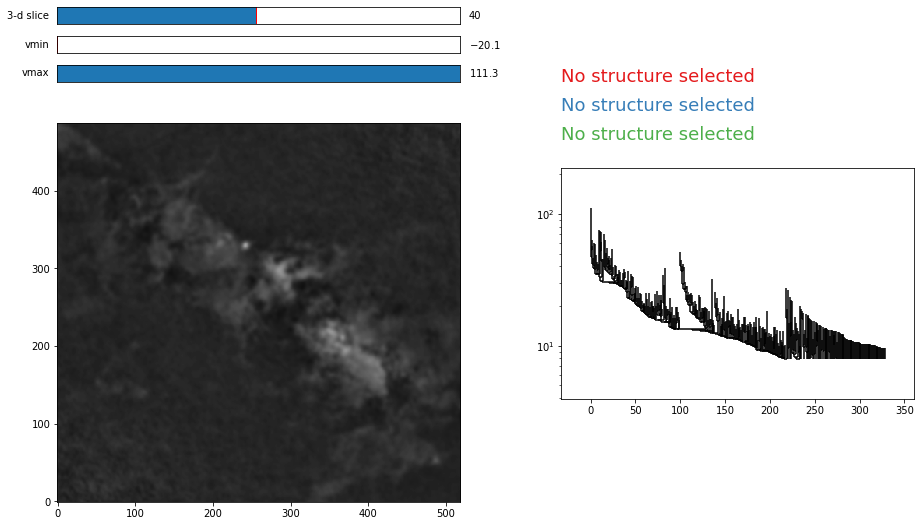

(107,)
[5.63500895 0.72400517] [[ 0.11841703 -0.00629858]
 [-0.00629858  0.00034329]] All_structures:
a =  5.6350089513119626 +- 0.3441177552352828
b =  0.7240051730985723 +- 0.01852809489076452


<Figure size 2160x2160 with 0 Axes>

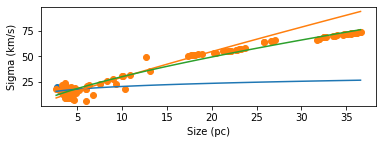

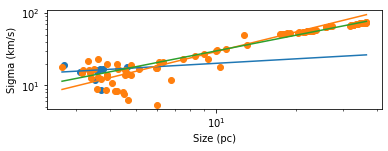

In [3]:
#size definitions from fwhm to 90% to gaussian (1sigma) 

#CO 


Num=3
Overlaps=0#4
Ram_Limiter=1#What percent of the cube my ram can handle
Name = "CO 3-2_Abs"
name = "CO_3_2_CM_Contours_DS_10_Abs.jpeg"
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")
RNames=np.load('RNames.npy')
SNames=np.load('SNames.npy')

RNames[Num] = NameR
SNames[Num] = NameS
print(RNames,SNames,NameR,NameS)
np.save("RNames",RNames)
np.save("SNames",SNames)

print(NameS)
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
#path = paths[Num]
path = 'ngc253_co32_hires_common.fits'
print(path)
Confidences = np.load('Confidence_data.npy')
H13CN_MASK = np.load('H13CN_MASK_NGC.npy')
Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True

Q = Qp.to(u.K).spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)

sc = Q.unmasked_copy()
scQ = Q
scW = sc.wcs[:][:][0]
#BP = np.where(Confidences<Overlaps)#Overlaps)
del Confidences
#sc.hdu.data[BP]=np.nan
#print(sc.hdu.data[BP])
#del BP
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc),sc[0][0][0])
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

#cen_p1 = SkyCoord('00h47m33.6s', '-25d17m16.8s', frame='icrs')
#cen_p2 = SkyCoord('00h47m33.3s', '-25d17m14.2s', frame='icrs')

scW = scn.wcs[:][:][0]
scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
raQDP1 = [int(scQW.world_to_pixel(cen_p1)[0]),int(scQW.world_to_pixel(cen_p1)[1])]
raQDP2 = [int(scQW.world_to_pixel(cen_p2)[0]),int(scQW.world_to_pixel(cen_p2)[1])]
scQF = scQn[:,raQDP1[1]:raQDP2[1],raQDP1[0]:raQDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]
wcs = scF.wcs[:][:][0]
wcsQ = scQF.wcs[:][:][0]

#Unload all the unimportant vars


del paths
vel, dec, ra = Q.world[:,0,0]           # For plotting purposes, I want to know the average velocity
#print(vel)
header = Q.hdu.header
print(header)
#print(header)
#make metadata for the dendrogram
metadata = {}
try:
    metadata['wavelength'] = header["RESTFREQ"]*u.Hz#
except:
    metadata['wavelength'] = header["RESTFRQ"]*u.Hz#
metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc
metadata["vaxis"]=0

d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*5,min_npix=int(4.8**2*1*3)) #The main culprit




##Analyze dendograms
print(np.shape(d))

v = d.viewer()
v.show()
p=d.plotter()
fig = plt.figure(1,figsize=(30,30))

scU = SpectralCube.read(path)  
scWU = scU.wcs[:][:][0]
raDP1U = [int(scWU.world_to_pixel(cen_p1)[0]),int(scWU.world_to_pixel(cen_p1)[1])]
raDP2U = [int(scWU.world_to_pixel(cen_p2)[0]),int(scWU.world_to_pixel(cen_p2)[1])]
scNU = scU[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),raDP1U[1]:raDP2U[1],raDP1U[0]:raDP2U[0]] # Make a subcube based on position
scWU = scNU.wcs[:][:][0]
#####
SC_KMSU = scNU.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMSU.allow_huge_operations=True
SC_K_KMSU = SC_KMSU.to(u.K)
SC_K_KMS_slabU = SC_K_KMSU.spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)  # Extract a subset of the velocities
ds=30
SC_CM = SC_K_KMS_slabU.downsample_axis(ds,axis=0) # Here we use downsampling to bin (average)the data # into coarse bins (broad channels) with width ~ 11 km/s    
vel, dec, ra = SC_CM.world[:,0,0]           # For plotting purposes, I want to know the average velocity

wcsU = SC_CM.wcs[:][:][0]
#Done making unmasked CM

noplot=True #produce plot of channel maps and contours? y/n

for n in np.arange(0,len(SC_CM.hdu.data)):   
    if(noplot):
        break
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(5,5,n+1,projection=sc.wcs[:][:][0]) # We plot them in a grid    
    im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*12)
    #print(np.shape(datn),np.shape(np.nanmean(datn[n:n+9],axis=0)))
    #im = pylab.imshow(np.nanmean(datn[n*ds:ds*n+ds-1],axis=0),cmap='gray',vmin=0,vmax=m*8)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(0,0,s="%i km/s"%(vel.value[n]),fontsize=30,c="Red") # Print the velocity of each averaged channel
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if n==len(SC_CM.hdu.data)-1:
        pylab.xlabel("Right Ascension",fontsize=30)
        pylab.ylabel("Declination",labelpad=-13,fontsize=30,rotation=90)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=6,h_pad=-0)
    
    for t in d.all_structures:
        
        I = t.indices()
        Cont = True
        try:
            #print(str(t.descendants[0]).find("branch"))
            #print(str(t.descendants[0]))
            if(str(t.descendants[0]).find("branch") != -1):
                Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
        except:
            lop=12

        if(Cont):
            s = PPVStatistic(t,metadata=metadata)
            #if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>4.8*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 4):
            if((True)):
                for lmn in range(np.nanmax(I[0])-np.nanmin(I[0])):
                    p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1,slice = lmn)
                #p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1)
                #print(n)
                #ellipse = s.to_mpl_ellipse(edgecolor='pink', facecolor='pink',alpha=.1)
                #ax.add_patch(ellipse)
                #print(t.indices())
                #break
if (noplot==False):
    fig.savefig(bbox_inches='tight',fname=name)

pc_per_pixel = metadata['arc_per_pix']/3600/180*np.pi/u.arcsec*metadata['distance']/u.Mpc

sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
radsL=np.array([])
radsB=np.array([])
sigmasL=np.array([])
sigmasB=np.array([])

for t in d.all_structures: 
    
    I = t.indices()
    Cont = True
    try:
        #print(str(t.descendants[0]).find("branch"))
        #print(str(t.descendants[0]))
        if(str(t.descendants[0]).find("branch") != -1):
            Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
    except:
        lop=12
    
    if(Cont):
        s = PPVStatistic(t,metadata=metadata)
        #if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>4.8**2*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>4.8*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 4):
        if(s.v_rms*s.radius**2>4.8**2*metadata["velocity_scale"]*u.pix**2*3):







            if(t.is_leaf):
                radsL=np.append(radsL,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
                sigmasL=np.append(sigmasL,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)
            if(t.is_branch	):
                radsB=np.append(radsB,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
                sigmasB=np.append(sigmasB,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)



from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)

Rcon = np.concatenate((radsL,radsB))
Scon = np.concatenate((sigmasL,sigmasB))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)

print(poptCon,pcovCon,"All_structures:")
print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))

fig = plt.figure()
ax = pylab.subplot(2, 1, 1)
xpL,xpB = ax.scatter(radsL*10**6,sigmasL),ax.scatter(radsB*10**6,sigmasB)
xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])
xpa1,xpa2,xpaTot = ax.plot(xs,ysL),ax.plot(xs,ysB),ax.plot(xs,ysCon)
plt.xlabel("Size (pc)")
plt.ylabel("Sigma (km/s)")
pylab.show()
ax2 = pylab.subplot(2, 1, 2)
xpL,xpB = ax2.scatter(radsL*10**6,sigmasL),ax2.scatter(radsB*10**6,sigmasB)
p,p2,p3 = ax2.plot(xs,ysL),ax2.plot(xs,ysB),ax2.plot(xs,ysCon)
ax2.set_yscale('log')
ax2.set_xscale('log')
plt.xlabel("Size (pc)")
plt.ylabel("Sigma (km/s)")
pylab.show()



In [ ]:
#Finding the manual contours

#CO


path = 'ngc253_co32_hires_common.fits'

Noises = np.load('Noises_K.npy')
#Noises = Ns
Num=3
m = Noises[Num]
#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True

Q = Qp.to(u.K).spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)

sc = Q.unmasked_copy()
scQ = Q
scW = sc.wcs[:][:][0]
#BP = np.where(Confidences<Overlaps)#Overlaps)
del Confidences
#sc.hdu.data[BP]=np.nan
#print(sc.hdu.data[BP])
#del BP
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc),sc[0][0][0])
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

#cen_p1 = SkyCoord('00h47m33.6s', '-25d17m16.8s', frame='icrs')
#cen_p2 = SkyCoord('00h47m33.3s', '-25d17m14.2s', frame='icrs')

scW = scn.wcs[:][:][0]
scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube




scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
raQDP1 = [int(scQW.world_to_pixel(cen_p1)[0]),int(scQW.world_to_pixel(cen_p1)[1])]
raQDP2 = [int(scQW.world_to_pixel(cen_p2)[0]),int(scQW.world_to_pixel(cen_p2)[1])]
scQF = scQn[:,raQDP1[1]:raQDP2[1],raQDP1[0]:raQDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]
wcs = scF.wcs[:][:][0]
wcsQ = scQF.wcs[:][:][0]

#Unload all the unimportant vars


AP = np.load('Abs_Pix_NGC.npy')

BP = np.where(AP>0)

dat_No_Abs=np.copy(dat)
dat_No_Abs[BP]=np.nan
datn_NA = dat_No_Abs[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]]

del paths
vel, dec, ra = Q.world[:,0,0]           # For plotting purposes, I want to know the average velocity
#print(vel)
header = Q.hdu.header
print(header)
#print(header)
#make metadata for the dendrogram
metadata = {}
try:
    metadata['wavelength'] = header["RESTFREQ"]*u.Hz#
except:
    metadata['wavelength'] = header["RESTFRQ"]*u.Hz#
metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc
metadata["vaxis"]=0

d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*5,min_npix=int(4.8**2*1*3)) #The main culprit
d_no_abs = astrodendro.Dendrogram.compute(datn_NA,min_delta = m,min_value = m*5, min_npix=50,wcs = scQF.wcs) #The main culprit



##Analyze dendograms
print(np.shape(d))

v = d.viewer()
v.show()
p=d.plotter()
fig = plt.figure(1,figsize=(30,30))

scU = SpectralCube.read(path)  
scWU = scU.wcs[:][:][0]
raDP1U = [int(scWU.world_to_pixel(cen_p1)[0]),int(scWU.world_to_pixel(cen_p1)[1])]
raDP2U = [int(scWU.world_to_pixel(cen_p2)[0]),int(scWU.world_to_pixel(cen_p2)[1])]
scNU = scU[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),raDP1U[1]:raDP2U[1],raDP1U[0]:raDP2U[0]] # Make a subcube based on position
scWU = scNU.wcs[:][:][0]
#####
SC_KMSU = scNU.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMSU.allow_huge_operations=True
SC_K_KMSU = SC_KMSU.to(u.K)
SC_K_KMS_slabU = SC_K_KMSU.spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)  # Extract a subset of the velocities
ds=20
SC_CM = SC_K_KMS_slabU.downsample_axis(ds,axis=0) # Here we use downsampling to bin (average)the data # into coarse bins (broad channels) with width ~ 11 km/s    
vel, dec, ra = SC_CM.world[:,0,0]           # For plotting purposes, I want to know the average velocity

wcsU = SC_CM.wcs[:][:][0]
#Done making unmasked CM

noplot=True #produce plot of channel maps and contours? y/n

for n in np.arange(0,len(SC_CM.hdu.data)):   
    if(noplot):
        break
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(5,5,n+1,projection=sc.wcs[:][:][0]) # We plot them in a grid    
    im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*12)
    #print(np.shape(datn),np.shape(np.nanmean(datn[n:n+9],axis=0)))
    #im = pylab.imshow(np.nanmean(datn[n*ds:ds*n+ds-1],axis=0),cmap='gray',vmin=0,vmax=m*8)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(0,0,s="%i km/s"%(vel.value[n]),fontsize=30,c="Red") # Print the velocity of each averaged channel
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if n==len(SC_CM.hdu.data)-1:
        pylab.xlabel("Right Ascension",fontsize=30)
        pylab.ylabel("Declination",labelpad=-13,fontsize=30,rotation=90)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=6,h_pad=-0)
    
    for t in d.all_structures:
        
        I = t.indices()
        Cont = True
        try:
            #print(str(t.descendants[0]).find("branch"))
            #print(str(t.descendants[0]))
            if(str(t.descendants[0]).find("branch") != -1):
                Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
        except:
            lop=12

        if(Cont):
            s = PPVStatistic(t,metadata=metadata)
            #if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>4.8*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 4):
            if((True)):
                for lmn in range(np.nanmax(I[0])-np.nanmin(I[0])):
                    p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1,slice = lmn)
                #p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1)
                #print(n)
                #ellipse = s.to_mpl_ellipse(edgecolor='pink', facecolor='pink',alpha=.1)
                #ax.add_patch(ellipse)
                #print(t.indices())
                #break
if (noplot==False):
    fig.savefig(bbox_inches='tight',fname=name)

pc_per_pixel = metadata['arc_per_pix']/3600/180*np.pi/u.arcsec*metadata['distance']/u.Mpc

sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
radsL=np.array([])
radsB=np.array([])
sigmasL=np.array([])
sigmasB=np.array([])

for t in d.all_structures: 
    
    I = t.indices()
    Cont = True
    try:
        #print(str(t.descendants[0]).find("branch"))
        #print(str(t.descendants[0]))
        if(str(t.descendants[0]).find("branch") != -1):
            Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
    except:
        lop=12
    
    if(Cont):
        s = PPVStatistic(t,metadata=metadata)
        #if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>4.8**2*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>4.8*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 4):
        if(s.v_rms*s.radius**2>4.8**2*metadata["velocity_scale"]*u.pix**2*3):







            if(t.is_leaf):
                radsL=np.append(radsL,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
                sigmasL=np.append(sigmasL,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)
            if(t.is_branch	):
                radsB=np.append(radsB,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
                sigmasB=np.append(sigmasB,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)



from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, radsL*10**6, sigmasL)
except:
    popt, pcov = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
try:
    poptB, pcovB = curve_fit(func, radsB*10**6, sigmasB)
except:
    poptB, pcovB = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]

Rcon = np.concatenate((radsL,radsB))
Scon = np.concatenate((sigmasL,sigmasB))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)
try:
    print(popt,pcov,"leaves:")
    print("a = ",popt[0],"+-",np.sqrt(pcov[0][0]))
    print("b = ",popt[1],"+-",np.sqrt(pcov[1][1]))
    print(poptB,pcovB,"branches:")
    print("a = ",poptB[0],"+-",np.sqrt(pcovB[0][0]))
    print("b = ",poptB[1],"+-",np.sqrt(pcovB[1][1]))
    print(poptCon,pcovCon,"All_structures:")
    print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
    print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))

    fig = plt.figure()
    ax = pylab.subplot(2, 1, 1)
    xpL,xpB = ax.scatter(radsL*10**6,sigmasL),ax.scatter(radsB*10**6,sigmasB)
    xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
    ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])
    xpa1,xpa2,xpaTot = ax.plot(xs,ysL),ax.plot(xs,ysB),ax.plot(xs,ysCon)
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()
    ax2 = pylab.subplot(2, 1, 2)
    xpL,xpB = ax2.scatter(radsL*10**6,sigmasL),ax2.scatter(radsB*10**6,sigmasB)
    p,p2,p3 = ax2.plot(xs,ysL),ax2.plot(xs,ysB),ax2.plot(xs,ysCon)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()

except:
    
    print("Not Enough Well-Defined Structures")
NameSL = (NameS+"_Leaves")
NameSB = (NameS+"_Branches")
NameRL = (NameR+"_Leaves")
NameRB = (NameR+"_Branches")

np.save(NameSL,sigmasL)
np.save(NameSB,sigmasB)
np.save(NameRL,radsL)
np.save(NameRB,radsB)

In [ ]:
#CCH

Num = 6
Overlaps=1#4
Ram_Limiter = 1
Name = "CCH_Abs"
name = "CCH_CM_Contours_DS_10_Abs.jpeg"
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")
RNames[Num] = NameR
SNames[Num] = NameS
np.save("RNames",RNames)
np.save("SNames",SNames)
print(NameS)
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
path = paths[Num]
print(path)
Confidences = np.load('Confidence_data.npy')

Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
#Make subcube
Q = SpectralCube.read(path)  
sc = Q.unmasked_copy()
scQ = Q
scW = sc.wcs[:][:][0]
print(Confidences[0],Confidences.shape,sc.hdu.data.shape)
BP = np.where(Confidences<Overlaps)#Overlaps)
del Confidences
sc.hdu.data[BP]=np.nan
print(sc.hdu.data[BP])
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc))
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

#cen_p1 = SkyCoord('00h47m33.6s', '-25d17m16.8s', frame='icrs')
#cen_p2 = SkyCoord('00h47m33.3s', '-25d17m14.2s', frame='icrs')

scW = scn.wcs[:][:][0]
scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
raQDP1 = [int(scQW.world_to_pixel(cen_p1)[0]),int(scQW.world_to_pixel(cen_p1)[1])]
raQDP2 = [int(scQW.world_to_pixel(cen_p2)[0]),int(scQW.world_to_pixel(cen_p2)[1])]
scQF = scQn[:,raQDP1[1]:raQDP2[1],raQDP1[0]:raQDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]
wcs = scF.wcs[:][:][0]
wcsQ = scQF.wcs[:][:][0]

#Unload all the unimportant vars

del BP
del paths


header = fits.getheader(path)

#make metadata for the dendrogram
metadata = {}
metadata['wavelength'] = header["RESTFRQ"]*u.Hz#
metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc

d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*5,min_npix=50) #The main culprit




vel,NA,na = sc.world[:,0,0]

##Analyze dendograms
print(np.shape(d))

v = d.viewer()
v.show()
p=d.plotter()
fig = plt.figure(1,figsize=(30,30))

scU = SpectralCube.read(path)  
scWU = scU.wcs[:][:][0]
raDP1U = [int(scWU.world_to_pixel(cen_p1)[0]),int(scWU.world_to_pixel(cen_p1)[1])]
raDP2U = [int(scWU.world_to_pixel(cen_p2)[0]),int(scWU.world_to_pixel(cen_p2)[1])]
scNU = scU[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),raDP1U[1]:raDP2U[1],raDP1U[0]:raDP2U[0]] # Make a subcube based on position
scWU = scNU.wcs[:][:][0]
#####
SC_KMSU = scNU.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMSU.allow_huge_operations=True
SC_K_KMSU = SC_KMSU.to(u.K)
SC_K_KMS_slabU = SC_K_KMSU.spectral_slab(-888. *u.km / u.s, 888. *u.km / u.s)  # Extract a subset of the velocities
ds=20
SC_CM = SC_K_KMS_slabU.downsample_axis(ds,axis=0) # Here we use downsampling to bin (average)the data # into coarse bins (broad channels) with width ~ 11 km/s    
vel, dec, ra = SC_CM.world[:,0,0]           # For plotting purposes, I want to know the average velocity
wcsU = SC_CM.wcs[:][:][0]
#Done making unmasked CM

noplot=True #produce plot of channel maps and contours? y/n

for n in np.arange(0,len(SC_CM.hdu.data)):   
    if(noplot):
        break
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(5,5,n+1,projection=sc.wcs[:][:][0]) # We plot them in a grid    
    im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*8)
    #print(np.shape(datn),np.shape(np.nanmean(datn[n:n+9],axis=0)))
    #im = pylab.imshow(np.nanmean(datn[n*ds:ds*n+ds-1],axis=0),cmap='gray',vmin=0,vmax=m*8)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(0,0,s="%i km/s"%(vel.value[n]),fontsize=30,c="Red") # Print the velocity of each averaged channel
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if n==len(SC_CM.hdu.data)-1:
        pylab.xlabel("Right Ascension",fontsize=30)
        pylab.ylabel("Declination",labelpad=-13,fontsize=30,rotation=90)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=6,h_pad=-0)
    
    for t in d.all_structures:
        
        I = t.indices()
        s = PPVStatistic(t,metadata=metadata)
        if(s.v_rms>1*u.pix and s.radius>1*u.pix and  s.radius<24*2*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
            k=0
            for ll in range(len(I[0])):
                if(I[0][ll] - int((n+.5)*ds) ==0):
                    k=int((n+.5)*ds)
                    break
            for ll in range(len(I[0])):
                if(k==int((n+.5)*ds)  and n!= 0):
                    break
                miN=3
                if(abs(I[0][ll] - int((n+.5)*ds)) <miN):
                    k=I[0][ll]
                    break
            if(k!=0):
                p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1,slice = k)
                ellipse = s.to_mpl_ellipse(edgecolor='pink', facecolor='pink',alpha=.1)
                ax.add_patch(ellipse)
            #print(t.indices())
            #break
if (noplot==False):
    fig.savefig(bbox_inches='tight',fname=name)


rads=np.array([])
sigmas=np.array([])

pc_per_pixel = metadata['arc_per_pix']/3600/180*np.pi/u.arcsec*metadata['distance']/u.Mpc
sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
for t in d.all_structures: 
    
    I = t.indices()
    s = PPVStatistic(t,metadata=metadata)
        
    if(s.v_rms>1*u.pix and s.radius>1*u.pix and  s.radius<24*2*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
        rads=np.append(rads,(s.radius*pc_per_pixel)) #convert pixel to pc (then make it dimensionless)
        sigmas=np.append(sigmas,(s.v_rms*sig_per_pixel))#Convert pixel to velocity (then make it dimensionless)


from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)
popt, pcov = curve_fit(func, rads*10**6, sigmas)
print(popt,pcov)
print("a = ",popt[0],"+-",np.sqrt(pcov[0][0]))
print("b = ",popt[1],"+-",np.sqrt(pcov[1][1]))
fig = plt.figure()
ax = pylab.subplot(2, 1, 1)
xp1 = ax.scatter(rads*10**6,sigmas)
xs=np.linspace(np.nanmin(rads*10**6),np.nanmax(rads*10**6),50)
ys=func(xs,popt[0],popt[1])
xpa1 = ax.scatter(xs,ys)
plt.xlabel("Size (pc)")
plt.ylabel("Sigma (km/s)")
pylab.show()
ax2 = pylab.subplot(2, 1, 2)
xp = ax2.scatter(rads*10**6,sigmas)
p = ax2.plot(xs,ys,c='red')
ax2.set_yscale('log')
ax2.set_xscale('log')
plt.xlabel("Size (pc)")
plt.ylabel("Sigma (km/s)")
pylab.show()

np.save(NameS,sigmas)
np.save(NameR,rads)



In [ ]:
#HC3N
Num = 7
Overlaps=1#4
Ram_Limiter = 1
Name = "HC3N_Abs"
name = "HC3N_CM_Contours_DS_10_Abs.jpeg"
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")
RNames[Num] = NameR
SNames[Num] = NameS
np.save("RNames",RNames)
np.save("SNames",SNames)
print(NameS)
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
path = paths[Num]
print(path)
Confidences = np.load('Confidence_data.npy')

Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
#Make subcube
Q = SpectralCube.read(path)  
sc = Q.unmasked_copy()
scQ = Q
scW = sc.wcs[:][:][0]
print(Confidences[0],Confidences.shape,sc.hdu.data.shape)
BP = np.where(Confidences<Overlaps)#Overlaps)
del Confidences
sc.hdu.data[BP]=np.nan
print(sc.hdu.data[BP])
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc))
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

#cen_p1 = SkyCoord('00h47m33.6s', '-25d17m16.8s', frame='icrs')
#cen_p2 = SkyCoord('00h47m33.3s', '-25d17m14.2s', frame='icrs')

scW = scn.wcs[:][:][0]
scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
raQDP1 = [int(scQW.world_to_pixel(cen_p1)[0]),int(scQW.world_to_pixel(cen_p1)[1])]
raQDP2 = [int(scQW.world_to_pixel(cen_p2)[0]),int(scQW.world_to_pixel(cen_p2)[1])]
scQF = scQn[:,raQDP1[1]:raQDP2[1],raQDP1[0]:raQDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]
wcs = scF.wcs[:][:][0]
wcsQ = scQF.wcs[:][:][0]

#Unload all the unimportant vars

del BP
del paths

header = fits.getheader(path)

#make metadata for the dendrogram
metadata = {}
metadata['wavelength'] = header["RESTFRQ"]*u.Hz#
metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc

d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*5,min_npix=50) #The main culprit





vel,NA,na = sc.world[:,0,0]

##Analyze dendograms
print(np.shape(d))

v = d.viewer()
v.show()
p=d.plotter()
fig = plt.figure(1,figsize=(30,30))

scU = SpectralCube.read(path)  
scWU = scU.wcs[:][:][0]
raDP1U = [int(scWU.world_to_pixel(cen_p1)[0]),int(scWU.world_to_pixel(cen_p1)[1])]
raDP2U = [int(scWU.world_to_pixel(cen_p2)[0]),int(scWU.world_to_pixel(cen_p2)[1])]
scNU = scU[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),raDP1U[1]:raDP2U[1],raDP1U[0]:raDP2U[0]] # Make a subcube based on position
scWU = scNU.wcs[:][:][0]
#####
SC_KMSU = scNU.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMSU.allow_huge_operations=True
SC_K_KMSU = SC_KMSU.to(u.K)
SC_K_KMS_slabU = SC_K_KMSU.spectral_slab(-888. *u.km / u.s, 888. *u.km / u.s)  # Extract a subset of the velocities
ds=20
SC_CM = SC_K_KMS_slabU.downsample_axis(ds,axis=0) # Here we use downsampling to bin (average)the data # into coarse bins (broad channels) with width ~ 11 km/s    
vel, dec, ra = SC_CM.world[:,0,0]           # For plotting purposes, I want to know the average velocity
wcsU = SC_CM.wcs[:][:][0]
#Done making unmasked CM

noplot=True #produce plot of channel maps and contours? y/n

for n in np.arange(0,len(SC_CM.hdu.data)):   
    if(noplot):
        break
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(5,5,n+1,projection=sc.wcs[:][:][0]) # We plot them in a grid    
    im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*8)
    #print(np.shape(datn),np.shape(np.nanmean(datn[n:n+9],axis=0)))
    #im = pylab.imshow(np.nanmean(datn[n*ds:ds*n+ds-1],axis=0),cmap='gray',vmin=0,vmax=m*8)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(0,0,s="%i km/s"%(vel.value[n]),fontsize=30,c="Red") # Print the velocity of each averaged channel
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if n==len(SC_CM.hdu.data)-1:
        pylab.xlabel("Right Ascension",fontsize=30)
        pylab.ylabel("Declination",labelpad=-13,fontsize=30,rotation=90)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=6,h_pad=-0)
    
    for t in d.all_structures:
        
        I = t.indices()
        s = PPVStatistic(t,metadata=metadata)
        if(s.v_rms>1*u.pix and s.radius>1*u.pix and  s.radius<24*2*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
            k=0
            for ll in range(len(I[0])):
                if(I[0][ll] - int((n+.5)*ds) ==0):
                    k=int((n+.5)*ds)
                    break
            for ll in range(len(I[0])):
                if(k==int((n+.5)*ds)  and n!= 0):
                    break
                miN=3
                if(abs(I[0][ll] - int((n+.5)*ds)) <miN):
                    k=I[0][ll]
                    break
            if(k!=0):
                p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1,slice = k)
                ellipse = s.to_mpl_ellipse(edgecolor='pink', facecolor='pink',alpha=.1)
                ax.add_patch(ellipse)
            #print(t.indices())
            #break
if (noplot==False):
    fig.savefig(bbox_inches='tight',fname=name)


rads=np.array([])
sigmas=np.array([])

pc_per_pixel = metadata['arc_per_pix']/3600/180*np.pi/u.arcsec*metadata['distance']/u.Mpc
sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
for t in d.all_structures: 
    
    I = t.indices()
    s = PPVStatistic(t,metadata=metadata)
        
    if(s.v_rms>1*u.pix and s.radius>1*u.pix and  s.radius<24*2*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
        rads=np.append(rads,(s.radius*pc_per_pixel)) #convert pixel to pc (then make it dimensionless)
        sigmas=np.append(sigmas,(s.v_rms*sig_per_pixel))#Convert pixel to velocity (then make it dimensionless)


from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)
popt, pcov = curve_fit(func, rads*10**6, sigmas)
print(popt,pcov)
print("a = ",popt[0],"+-",np.sqrt(pcov[0][0]))
print("b = ",popt[1],"+-",np.sqrt(pcov[1][1]))
fig = plt.figure()
ax = pylab.subplot(2, 1, 1)
xp1 = ax.scatter(rads*10**6,sigmas)
xs=np.linspace(np.nanmin(rads*10**6),np.nanmax(rads*10**6),50)
ys=func(xs,popt[0],popt[1])
xpa1 = ax.scatter(xs,ys)
plt.xlabel("Size (pc)")
plt.ylabel("Sigma (km/s)")
pylab.show()
ax2 = pylab.subplot(2, 1, 2)
xp = ax2.scatter(rads*10**6,sigmas)
p = ax2.plot(xs,ys,c='red')
ax2.set_yscale('log')
ax2.set_xscale('log')
plt.xlabel("Size (pc)")
plt.ylabel("Sigma (km/s)")
pylab.show()

np.save(NameS,sigmas)
np.save(NameR,rads)



In [ ]:
#H13CoP_J1_0
Num = 5
Overlaps=1#4
Ram_Limiter = 1
Name = "H13CoP_J1_0_Abs"
name = "H13CoP_J1_0_CM_Contours_DS_10_Abs.jpeg"
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")
RNames = np.load("RNames.npy")
SNames = np.load("SNames.npy")
RNames[Num] = NameR
SNames[Num] = NameS
np.save("RNames",RNames)
np.save("SNames",SNames)
print(NameS)
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
path = paths[Num]
print(path)
Confidences = np.load('Confidence_data.npy')

Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
#Make subcube
Q = SpectralCube.read(path)  
sc = Q.unmasked_copy()
scQ = Q
scW = sc.wcs[:][:][0]
print(Confidences[0],Confidences.shape,sc.hdu.data.shape)
BP = np.where(Confidences<Overlaps)#Overlaps)
del Confidences
sc.hdu.data[BP]=np.nan
print(sc.hdu.data[BP])
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc))
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

#cen_p1 = SkyCoord('00h47m33.6s', '-25d17m16.8s', frame='icrs')
#cen_p2 = SkyCoord('00h47m33.3s', '-25d17m14.2s', frame='icrs')

scW = scn.wcs[:][:][0]
scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
raQDP1 = [int(scQW.world_to_pixel(cen_p1)[0]),int(scQW.world_to_pixel(cen_p1)[1])]
raQDP2 = [int(scQW.world_to_pixel(cen_p2)[0]),int(scQW.world_to_pixel(cen_p2)[1])]
scQF = scQn[:,raQDP1[1]:raQDP2[1],raQDP1[0]:raQDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]
wcs = scF.wcs[:][:][0]
wcsQ = scQF.wcs[:][:][0]

#Unload all the unimportant vars

del BP
del paths

header = fits.getheader(path)

#make metadata for the dendrogram
metadata = {}
metadata['wavelength'] = header["RESTFRQ"]*u.Hz#
metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc

d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*5,min_npix=50) #The main culprit



header = fits.getheader(path)

#make metadata for the dendrogram
metadata = {}
metadata['wavelength'] = header["RESTFRQ"]*u.Hz#
metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc
vel,NA,na = sc.world[:,0,0]

##Analyze dendograms
print(np.shape(d))

v = d.viewer()
v.show()
p=d.plotter()
fig = plt.figure(1,figsize=(30,30))

scU = SpectralCube.read(path)  
scWU = scU.wcs[:][:][0]
raDP1U = [int(scWU.world_to_pixel(cen_p1)[0]),int(scWU.world_to_pixel(cen_p1)[1])]
raDP2U = [int(scWU.world_to_pixel(cen_p2)[0]),int(scWU.world_to_pixel(cen_p2)[1])]
scNU = scU[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),raDP1U[1]:raDP2U[1],raDP1U[0]:raDP2U[0]] # Make a subcube based on position
scWU = scNU.wcs[:][:][0]
#####
SC_KMSU = scNU.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMSU.allow_huge_operations=True
SC_K_KMSU = SC_KMSU.to(u.K)
SC_K_KMS_slabU = SC_K_KMSU.spectral_slab(-888. *u.km / u.s, 888. *u.km / u.s)  # Extract a subset of the velocities
ds=20
SC_CM = SC_K_KMS_slabU.downsample_axis(ds,axis=0) # Here we use downsampling to bin (average)the data # into coarse bins (broad channels) with width ~ 11 km/s    
vel, dec, ra = SC_CM.world[:,0,0]           # For plotting purposes, I want to know the average velocity
wcsU = SC_CM.wcs[:][:][0]
#Done making unmasked CM

noplot=True #produce plot of channel maps and contours? y/n

for n in np.arange(0,len(SC_CM.hdu.data)):   
    if(noplot):
        break
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(5,5,n+1,projection=sc.wcs[:][:][0]) # We plot them in a grid    
    im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*8)
    #print(np.shape(datn),np.shape(np.nanmean(datn[n:n+9],axis=0)))
    #im = pylab.imshow(np.nanmean(datn[n*ds:ds*n+ds-1],axis=0),cmap='gray',vmin=0,vmax=m*8)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(0,0,s="%i km/s"%(vel.value[n]),fontsize=30,c="Red") # Print the velocity of each averaged channel
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if n==len(SC_CM.hdu.data)-1:
        pylab.xlabel("Right Ascension",fontsize=30)
        pylab.ylabel("Declination",labelpad=-13,fontsize=30,rotation=90)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=6,h_pad=-0)
    
    for t in d.all_structures:
        
        I = t.indices()
        s = PPVStatistic(t,metadata=metadata)
        if(s.v_rms>1*u.pix and s.radius>1*u.pix and  s.radius<24*2*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
            k=0
            for ll in range(len(I[0])):
                if(I[0][ll] - int((n+.5)*ds) ==0):
                    k=int((n+.5)*ds)
                    break
            for ll in range(len(I[0])):
                if(k==int((n+.5)*ds)  and n!= 0):
                    break
                miN=3
                if(abs(I[0][ll] - int((n+.5)*ds)) <miN):
                    k=I[0][ll]
                    break
            if(k!=0):
                p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1,slice = k)
                ellipse = s.to_mpl_ellipse(edgecolor='pink', facecolor='pink',alpha=.1)
                ax.add_patch(ellipse)
            #print(t.indices())
            #break
if (noplot==False):
    fig.savefig(bbox_inches='tight',fname=name)


rads=np.array([])
sigmas=np.array([])

pc_per_pixel = metadata['arc_per_pix']/3600/180*np.pi/u.arcsec*metadata['distance']/u.Mpc
sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
for t in d.all_structures: 
    
    I = t.indices()
    s = PPVStatistic(t,metadata=metadata)
        
    if(s.v_rms>1*u.pix and s.radius>1*u.pix and  s.radius<24*2*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
        rads=np.append(rads,(s.radius*pc_per_pixel)) #convert pixel to pc (then make it dimensionless)
        sigmas=np.append(sigmas,(s.v_rms*sig_per_pixel))#Convert pixel to velocity (then make it dimensionless)


from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)
popt, pcov = curve_fit(func, rads*10**6, sigmas)
print(popt,pcov)
print("a = ",popt[0],"+-",np.sqrt(pcov[0][0]))
print("b = ",popt[1],"+-",np.sqrt(pcov[1][1]))
fig = plt.figure()
ax = pylab.subplot(2, 1, 1)
xp1 = ax.scatter(rads*10**6,sigmas)
xs=np.linspace(np.nanmin(rads*10**6),np.nanmax(rads*10**6),50)
ys=func(xs,popt[0],popt[1])
xpa1 = ax.scatter(xs,ys)
plt.xlabel("Size (pc)")
plt.ylabel("Sigma (km/s)")
pylab.show()
ax2 = pylab.subplot(2, 1, 2)
xp = ax2.scatter(rads*10**6,sigmas)
p = ax2.plot(xs,ys,c='red')
ax2.set_yscale('log')
ax2.set_xscale('log')
plt.xlabel("Size (pc)")
plt.ylabel("Sigma (km/s)")
pylab.show()

np.save(NameS,sigmas)
np.save(NameR,rads)



In [ ]:
RNames = np.load("RNames.npy")
SNames = np.load("SNames.npy")
#for i in range(len(RNames)):
fig = plt.figure(1,figsize=(30,30))
for i in range(11):
    rname=RNames[i]+".npy"
    sname=SNames[i]+".npy"
    
    rads = np.load(rname)*10**6#pc
    sigs = np.load(sname)
    
    from scipy.optimize import curve_fit
    
    def func(R,a,b):
        return a*R**(b)
    #print(Bin_Rads,Bin_Sigs)
    popt, pcov = curve_fit(func, rads, sigs)
    print(popt,pcov)
    
    ax = pylab.subplot(4, 4, i+1)
    xp1 = ax.scatter(rads, sigs)
    xs=np.linspace(np.nanmin(rads),np.nanmax(rads),50)
    ys=func(xs,popt[0],popt[1])
    xpa1 = ax.plot(xs,ys)
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    ax.set_yscale('log')
    ax.set_xscale('log')
    pylab.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=12,xy=(0.3,0.1),xycoords="axes fraction")  
    st= ("a = "+str(round(popt[0],5))+" +- " + str(round(np.sqrt(pcov[0][0]),5)) +", b = "+str(round(popt[1],5))+" +- " + str(round(np.sqrt(pcov[1][1]),5)) )
    pylab.annotate(s=st,fontsize=12,xy=(0.1,0.02),xycoords="axes fraction")  
    #pylab.show()
    ax.title.set_text(((sname[0:len(sname)-14])+" Velocity Dispersion as a function of Radius"))
    '''
    bw = .5#pc
    
    cp=0
    Bin_Sigs=[]
    Bin_Rads=[]
    while(True):
        Sbin=[]
        if(cp>max(rads)):
            break
        for k in range(len(rads)):
            if(rads[k]>cp and rads[k]<cp+bw):
                Sbin.append(sigs[k])
        if(str(np.mean(Sbin))!=str(np.nan) and str(np.mean(Sbin))!= str(np.inf)):
            Bin_Sigs.append(np.mean(Sbin))
            Bin_Rads.append(cp+bw/2)
        cp+=bw
    from scipy.optimize import curve_fit
    
    def func(R,a,b):
        return a*R**(b)
    #print(Bin_Rads,Bin_Sigs)
    popt, pcov = curve_fit(func, Bin_Rads, Bin_Sigs)
    print(popt,pcov)
    #print("a = ",popt[0],"+-",np.sqrt(pcov[0][0]))
    #print("b = ",popt[1],"+-",np.sqrt(pcov[1][1]))
    
    ax = pylab.subplot(4, 4, i+1)
    xp1 = ax.scatter(Bin_Rads, Bin_Sigs)
    xs=np.linspace(np.nanmin(Bin_Rads),np.nanmax(Bin_Rads),50)
    ys=func(xs,popt[0],popt[1])
    xpa1 = ax.plot(xs,ys)
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    ax.set_yscale('log')
    ax.set_xscale('log')
    pylab.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=12,xy=(0.3,0.1),xycoords="axes fraction")  
    st= ("a = "+str(round(popt[0],5))+" +- " + str(round(np.sqrt(pcov[0][0]),5)) +", b = "+str(round(popt[1],5))+" +- " + str(round(np.sqrt(pcov[1][1]),5)) )
    pylab.annotate(s=st,fontsize=12,xy=(0.1,0.02),xycoords="axes fraction")  
    #pylab.show()
    ax.title.set_text(((sname[0:len(sname)-14])+" Velocity Dispersion as a function of Radius, binned at .5 pc"))
    '''
    